<a href="https://colab.research.google.com/github/AlirezaPNouri/BERTEmbedding/blob/main/FourthOfOct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Author: ALireza P. Nouri
Supervisor: Prof. M. Shahriar Hossain
link to the dataset
https://raw.githubusercontent.com/AlirezaPNouri/BERTEmbedding/main/5KArticles.csv
The last version which is written on 4th of Oct 2021

In [31]:
# to check if the GPU is ready to use
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

# to tell pytorch that we are going to use GPU
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [32]:
#install needed packages
!pip install transformers
!pip install wget

In [33]:
# download the dataset as a zip file
import wget
import os
import requests
print('Downloading dataset...')

# The URL for the dataset zip file.
url = 'https://raw.githubusercontent.com/AlirezaPNouri/BERTEmbedding/main/5KArticles.csv'
res = requests.get(url, allow_redirects=True)
with open('small_dataset_NYT.csv','wb') as file:
    file.write(res.content)
print('Download is done!')

Download is done!


In [34]:
import pandas as pd
MAX_DATA = 1000
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/small_dataset_NYT.csv", header= None, skiprows=1,  )
df = df.dropna(how='any', axis=0)

df = df[0:MAX_DATA][[1, 2]]
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))
# Display 10 random rows from the data.
print(df.columns)
df.sample(10)
# new_df = df[[1, 2]]
df.columns = ['id', 'content']
# df.head()
print('The dimension of the dataset is {}'.format(df.shape))
print(df.sample)

Number of training sentences: 1,000

Int64Index([1, 2], dtype='int64')
The dimension of the dataset is (1000, 2)
<bound method NDFrame.sample of                    id                                            content
0    19900101_0000000  HURRYING through the tunnel at Veterans Stadiu...
1    19900101_0000001  FOR six years, American corporations have been...
2    19900101_0000002  Alcide Chaisson, who is 69 years old and lives...
3    19900101_0000003  Gary Anderson is the third-most accurate kicke...
4    19900101_0000004  The National Bank of Poland is devaluing the P...
..                ...                                                ...
995  19900111_0000997  The greeting card giant Hallmark Cards Inc. sa...
996  19900111_0000998  The police detained 15,000 people today in a s...
997  19900111_0000999  The American retailing operations of the Campe...
998  19900111_0001000  The Ralston Purina Company said it would estab...
999  19900111_0001001  Barry Lyons and the Mets agre

In [35]:
import numpy as np
sentences = df.content.values
labels = df.id.values
# print(labels)
labels = [int(d[7]) for d in labels]
# print(labels)
#function to get unique values
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return len(unique_list)

class_num = unique(labels)
print('The numeber of classes is {}'.format(class_num))
print('length of data is {} and length of labels is {}'.format(len(sentences), len(labels)))
print('labels are : ', labels)

The numeber of classes is 10
length of data is 1000 and length of labels is 1000
labels are :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

In [36]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [37]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
max_length = 256
# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_length,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  HURRYING through the tunnel at Veterans Stadium, the Los Angeles Rams' left guard, Tom Newberry, yelled, ''Warm-weather California sissies, huh?'' With a grin he disappeared into the locker room to calmly celebrate a 21-7 wild-card victory over the Philadelphia Eagles in a cold raw rain, which qualified the Rams to go against the Giants next Sunday at Giants Stadium in the Super Bowl XXIV tournament. But until yesterday, the Rams had always played like warm-weather California sissies in cold-weather playoff games. Until yesterday, the Rams were 0-9 in cold-weather playoff games since the franchise moved to Los Angeles from Cleveland more than four decades ago. In that time, Ram teams lost three outdoor playoff games in Minnesota (plus one in the warmth of the Metrodome a year ago), two in Washington, and one each in Cleveland, Detroit, Green Bay and Chicago. ''I'm tired of being a weatherman; if I get fired, I'm going right to the news,'' John Robinson, the Rams' coach, joke

In [38]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or

In [39]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [40]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = class_num, # The number of output labels--2 for binary classification. # here temp is the size of the dataset
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = True, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [41]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [42]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [43]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 20

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [44]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [45]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [46]:
#Check the variables size in the memory
import sys

local_vars = list(locals().items())
for var, obj in local_vars:
  temp = sys.getsizeof(obj)
  if temp >100000:
    print(var, temp)

df 3949116


In [47]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    embedding_layers = []
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        print(batch[2].shape)
        print(batch[1].shape)
        print(batch[0].shape)
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        # print(len(outputs))
        # print(outputs[0]) the loss
        # print(len(outputs[1])) the batches
        # print(len(outputs[2])) the embedding layers
        # import numpy as np
        # print(np.shape(outputs[2]))--->(13,)
        # print(np.shape(outputs[2][1])) --->torch.Size([32, 64, 768]) the embedding in the layer one
        # print(np.shape(outputs[2][2]))--->torch.Size([32, 64, 768]) the embedding in the layer two
        # print(len(outputs[2][3]))
        loss = outputs[0]
        
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))


======== Epoch 1 / 20 ========
Training...
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
to

In [48]:
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print(  "")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()
    #count = 0 # added by Ali
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        
        logits = outputs[0]
        # print(len(outputs))
        # print(np.shape(outputs[1])) # all embedding layers data
        # print(outputs[1][12]) # access to embedding vectors in layer 13
        #count +=1 added by Ali

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    #print(count)
print("")
print("Training complete!")


Running Validation...
  Accuracy: 0.15
  Validation took: 0:00:01

Training complete!


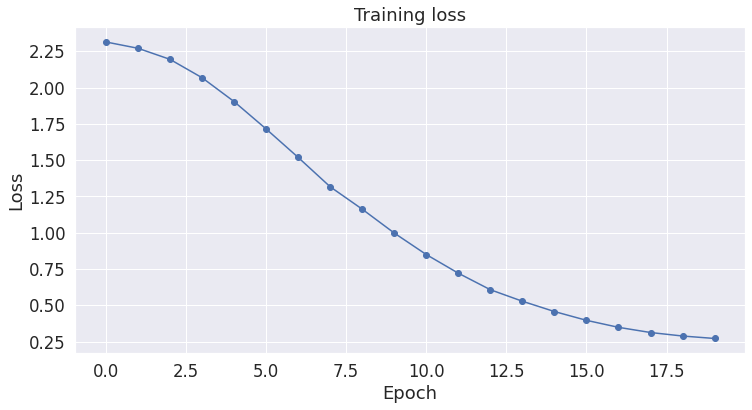

In [49]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [50]:
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
#the same as the maxlen we used in the encoder_plus function
MAX_LEN = max([len(sen) for sen in input_ids])
# Load the dataset into a pandas dataframe.
# df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
df = df[0:100]
sentences = sentences[0:100]
labels = labels[0:100]
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
# sentences = new_df.text.values
# labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 100  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Token indices sequence length is longer than the specified maximum sequence length for this model (1281 > 512). Running this sequence through the model will result in indexing errors


Number of test sentences: 100



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [51]:
print(MAX_LEN)
print(df.shape)
print(len(sentences))
print(input_ids.shape)
print(len(labels))

256
(100, 2)
100
(100, 256)
100


In [52]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  print('np.shape(outputs[0]) ', np.shape(outputs[0]))
  print('np.shape(outputs[1][0]) ', np.shape(outputs[1][0]))
  print('np.shape(outputs[1][1]) ', np.shape(outputs[1][1]))
  print('np.shape(outputs[1][12]) ', np.shape(outputs[1][12]))

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 100 test sentences...
np.shape(outputs[0])  torch.Size([100, 10])
np.shape(outputs[1][0])  torch.Size([100, 256, 768])
np.shape(outputs[1][1])  torch.Size([100, 256, 768])
np.shape(outputs[1][12])  torch.Size([100, 256, 768])
    DONE.


In [53]:
from sklearn.metrics.pairwise import cosine_similarity
last_layer = outputs[1][12]
# print out all the sentences
c = 0
for doc in sentences:
  print('doc {} :'.format(c), doc)
  c += 1

doc 0 : HURRYING through the tunnel at Veterans Stadium, the Los Angeles Rams' left guard, Tom Newberry, yelled, ''Warm-weather California sissies, huh?'' With a grin he disappeared into the locker room to calmly celebrate a 21-7 wild-card victory over the Philadelphia Eagles in a cold raw rain, which qualified the Rams to go against the Giants next Sunday at Giants Stadium in the Super Bowl XXIV tournament. But until yesterday, the Rams had always played like warm-weather California sissies in cold-weather playoff games. Until yesterday, the Rams were 0-9 in cold-weather playoff games since the franchise moved to Los Angeles from Cleveland more than four decades ago. In that time, Ram teams lost three outdoor playoff games in Minnesota (plus one in the warmth of the Metrodome a year ago), two in Washington, and one each in Cleveland, Detroit, Green Bay and Chicago. ''I'm tired of being a weatherman; if I get fired, I'm going right to the news,'' John Robinson, the Rams' coach, joked. 

In [54]:
def find_similar(embedding_layers, word_index, original_sentence):
  score_dic = dict()
  print(len(original_sentence))
  for j in range(1, min(256, len(original_sentence))):
    score_dic[original_sentence[j -1]] =  cosine_similarity([embedding_layers[word_index].to('cpu').numpy()], [embedding_layers[j].to('cpu').numpy()])[0][0]
    # print('word is {}, score is {}'.format(original_sentence[j -1], cosine_similarity([embedding_layers[word_index].to('cpu').numpy()], [embedding_layers[j].to('cpu').numpy()])[0][0]))
  return score_dic

# show th t-SNE for the tokens
from sklearn.manifold import TSNE
def tsne_plot(sentences, output):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word, embed in zip(sentences, output):
        tokens.append(embed)
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [55]:
# import pickle
# pickle.dump(outputs, open("outputs.p", "wb"))
# pickle.dump(sentences, open("sentences.p", "wb"))
# pickle.dump(labels, open("labels.p", "wb"))



tokens in  doc 8 are ['confronted', 'by', 'growing', 'demands', 'that', 'the', 'communist', 'party', 'dissolve', 'itself', ',', 'top', 'officials', 'of', 'this', 'country', "'", 's', 'old', 'order', 'say', 'they', 'will', 'call', 'a', 'special', 'congress', 'to', 'di', '##sman', '##tle', 'the', 'disgrace', '##d', 'party', 'even', 'before', 'free', 'elections', 'are', 'held', 'in', 'april', '.', 'late', 'saturday', 'night', ',', 'a', 'group', 'of', 'party', 'officials', ',', 'many', 'of', 'whom', 'quickly', 'severed', 'their', 'relationship', 'with', 'the', 'ce', '##aus', '##escu', 'dictatorship', 'as', 'a', 'popular', 'uprising', 'swept', 'it', 'out', 'of', 'power', ',', 'went', 'on', 'the', 'national', 'television', 'to', 'announce', 'the', 'special', 'congress', '.', 'their', 'message', 'was', 'repeated', 'today', 'in', 'the', 'rum', '##anian', 'newspapers', ',', 'which', 'like', 'the', 'television', 'are', 'now', 'controlled', 'by', 'the', 'country', "'", 's', 'new', ',', 'non', '-'

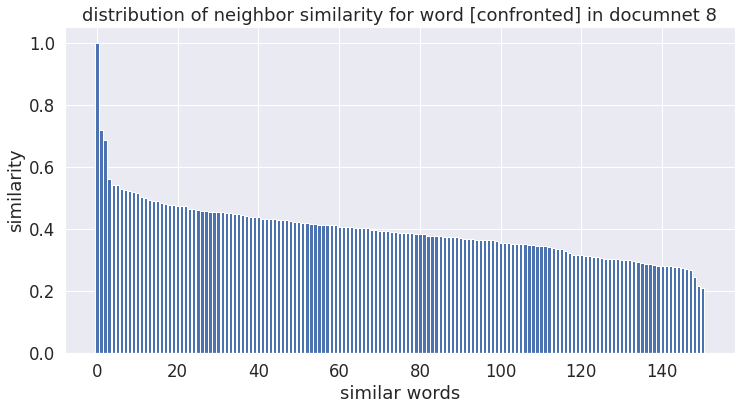

3   -->  growing
1690
[1.0, 0.7744324, 0.71809256, 0.6177815, 0.61097413, 0.5654434, 0.5633329, 0.55779445, 0.53814405, 0.5376381, 0.5296309, 0.5224381, 0.51851535, 0.51499915, 0.51178455, 0.5113993, 0.5093516, 0.5037929, 0.50348365, 0.49807388, 0.49224338, 0.49097008, 0.48887947, 0.48653007, 0.48610288, 0.48365018, 0.4780337, 0.47688186, 0.47577015, 0.4753505, 0.47049448, 0.46976823, 0.46933007, 0.46912122, 0.46764597, 0.45995033, 0.45838103, 0.45693085, 0.45675045, 0.45661524, 0.45615882, 0.45582837, 0.45344862, 0.45257676, 0.4520106, 0.44804892, 0.4480402, 0.44765237, 0.44736248, 0.44716135, 0.4465328, 0.44586277, 0.44583982, 0.44485742, 0.44466388, 0.44421083, 0.44269687, 0.4422559, 0.44203806, 0.43914008, 0.43703687, 0.4358132, 0.4350093, 0.43445098, 0.43068796, 0.42975265, 0.42954814, 0.42632204, 0.4262981, 0.4256232, 0.42468765, 0.42303765, 0.422059, 0.42179045, 0.4210729, 0.4208224, 0.41887778, 0.4183118, 0.41777277, 0.4168418, 0.4163015, 0.4158641, 0.41274238, 0.41250345, 0.41

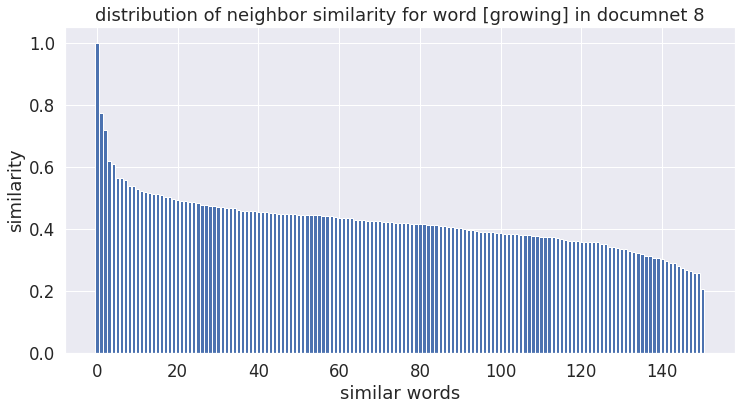

4   -->  demands
1690
[0.99999976, 0.7744324, 0.6872687, 0.5950488, 0.5784106, 0.5648055, 0.5540211, 0.55277133, 0.5473001, 0.5409186, 0.5363801, 0.52722096, 0.52067035, 0.5206247, 0.5113745, 0.5108384, 0.51015085, 0.50864047, 0.5085366, 0.50272083, 0.5008893, 0.50003076, 0.4978151, 0.4952885, 0.49223167, 0.49025095, 0.4892866, 0.4879183, 0.4870035, 0.4857952, 0.4845885, 0.48361883, 0.48349318, 0.48240966, 0.4811293, 0.4786235, 0.47797486, 0.47794628, 0.4765304, 0.47553048, 0.47442257, 0.47371572, 0.4735514, 0.473358, 0.47194213, 0.47146243, 0.46860713, 0.46527815, 0.4635179, 0.46264654, 0.46070468, 0.45656714, 0.45383385, 0.4535564, 0.45292336, 0.44758934, 0.44703382, 0.44568685, 0.44424647, 0.4433089, 0.4428935, 0.44176078, 0.4414742, 0.44130063, 0.44079775, 0.43941194, 0.43939084, 0.4386682, 0.4384067, 0.43821386, 0.43755084, 0.4354611, 0.43444768, 0.43185377, 0.43010446, 0.4281855, 0.42804465, 0.42800534, 0.42288092, 0.42018417, 0.4192401, 0.4187022, 0.41860557, 0.41753703, 0.41734

7   -->  communist
1690
[0.725461, 0.66518164, 0.6587928, 0.6446059, 0.6267712, 0.62154007, 0.6202253, 0.6122478, 0.6040337, 0.5989662, 0.59853923, 0.59685636, 0.59541637, 0.58806396, 0.58386403, 0.5812727, 0.58039284, 0.57826406, 0.5633373, 0.5613565, 0.5598923, 0.54798204, 0.54294556, 0.5388666, 0.5353613, 0.5306879, 0.52856386, 0.52589023, 0.5258312, 0.5174315, 0.5153744, 0.5106171, 0.509984, 0.5096492, 0.5047581, 0.49704042, 0.48134562, 0.48006666, 0.48004803, 0.47736308, 0.4758109, 0.47442305, 0.4734489, 0.4727512, 0.47026604, 0.46898088, 0.46624285, 0.4618891, 0.45889324, 0.45259166, 0.4421894, 0.4378234, 0.4364094, 0.42810518, 0.42629138, 0.4257334, 0.42482737, 0.4227826, 0.41508615, 0.41295817, 0.41036326, 0.40740868, 0.40493017, 0.40437943, 0.39684945, 0.39517325, 0.39349306, 0.39324796, 0.3904664, 0.3862098, 0.38466707, 0.3795767, 0.37916514, 0.37654847, 0.37316892, 0.37005383, 0.36939704, 0.36883914, 0.36523986, 0.36469924, 0.36184734, 0.3584687, 0.35812065, 0.35683227, 0.35

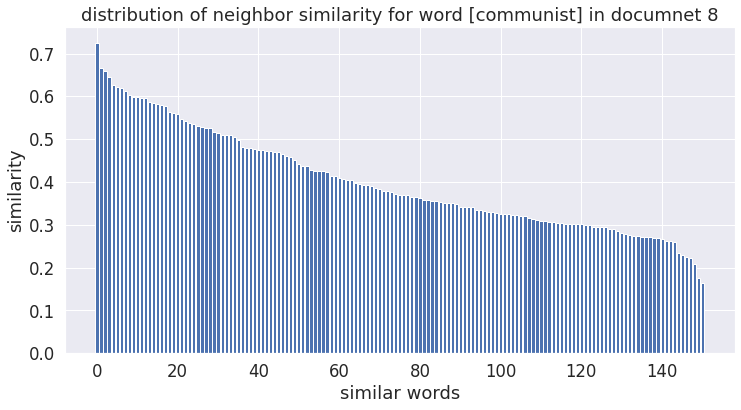

8   -->  party
1690
[0.7287805, 0.6708555, 0.66060555, 0.6496451, 0.64034986, 0.63812244, 0.6340946, 0.6272359, 0.61669654, 0.60717356, 0.59155595, 0.59046733, 0.58689713, 0.5852338, 0.57764524, 0.57669675, 0.5684482, 0.5656097, 0.5607043, 0.5598438, 0.5594599, 0.55727303, 0.55405074, 0.55302894, 0.5522362, 0.55200213, 0.5478103, 0.5441624, 0.5421304, 0.54122925, 0.53827035, 0.53774524, 0.5355092, 0.532104, 0.52979875, 0.526042, 0.5247233, 0.52255976, 0.5172488, 0.5086305, 0.5057416, 0.50253147, 0.49262163, 0.49025074, 0.48957723, 0.48579794, 0.48405066, 0.48397374, 0.48247662, 0.47692508, 0.47683275, 0.46669278, 0.45780668, 0.4559096, 0.45232633, 0.44944334, 0.4465726, 0.44215757, 0.44078434, 0.43298545, 0.43247032, 0.43069944, 0.4293818, 0.42678994, 0.42639303, 0.42544124, 0.42187345, 0.41639346, 0.41419253, 0.41304713, 0.41007107, 0.40888408, 0.4084164, 0.40603077, 0.4033091, 0.40159264, 0.40059894, 0.39733806, 0.3943351, 0.39254102, 0.3925262, 0.39142948, 0.38936815, 0.3886693, 0.3

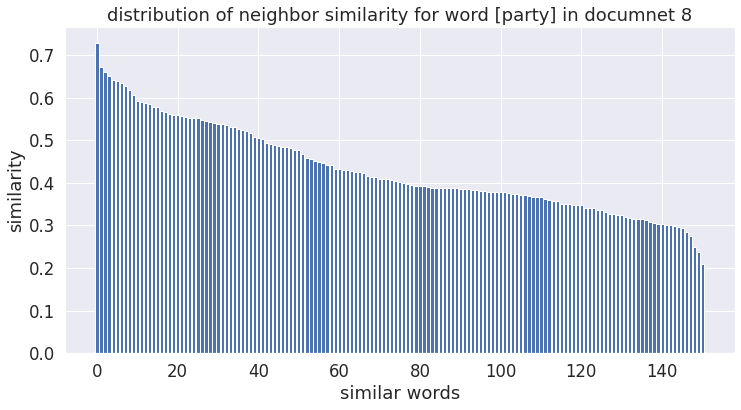

9   -->  dissolve
1690
[1.0000002, 0.8154119, 0.7936712, 0.70921874, 0.63015085, 0.6194506, 0.614596, 0.61140317, 0.58359957, 0.56620264, 0.5476847, 0.53193676, 0.5300338, 0.5249612, 0.52420807, 0.52222157, 0.52125126, 0.5186907, 0.5183961, 0.51747954, 0.51001513, 0.5097332, 0.50877696, 0.50365394, 0.50301754, 0.49790537, 0.49632826, 0.48985308, 0.4819211, 0.47797486, 0.47269487, 0.47161, 0.47019, 0.46895748, 0.46321425, 0.4612068, 0.4589433, 0.45517677, 0.4518387, 0.4511909, 0.4504435, 0.44853538, 0.44330138, 0.4405643, 0.4405557, 0.43985894, 0.4358552, 0.4352842, 0.4333783, 0.43151137, 0.42749166, 0.4263056, 0.42546275, 0.42531002, 0.4234283, 0.42269355, 0.42209953, 0.4205482, 0.42027572, 0.41868284, 0.4117558, 0.41067013, 0.40568092, 0.4048531, 0.40446246, 0.40200567, 0.40116525, 0.39888704, 0.39516076, 0.3919346, 0.38896862, 0.38630807, 0.38536233, 0.38441005, 0.3834394, 0.3780024, 0.37738362, 0.37429467, 0.37421995, 0.3736887, 0.37364382, 0.37334713, 0.3730783, 0.37069595, 0.36698

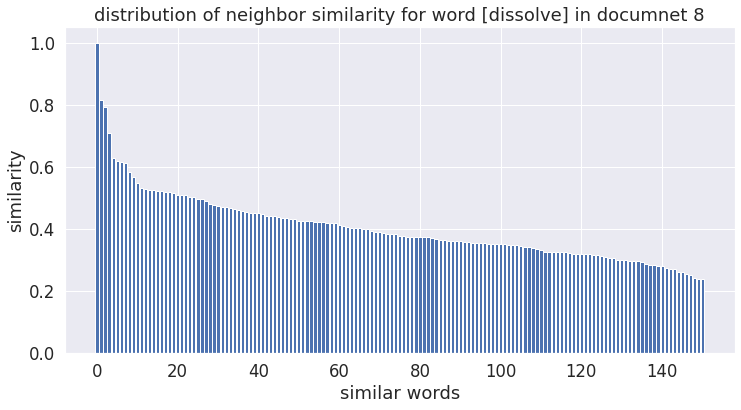

12   -->  top
1690
[0.9999999, 0.72288513, 0.6894331, 0.6572793, 0.61097413, 0.6109388, 0.5943066, 0.58967245, 0.58248717, 0.5784106, 0.57674754, 0.5415156, 0.5354004, 0.52690244, 0.52209985, 0.52101755, 0.5198047, 0.51126945, 0.5099064, 0.5093156, 0.50740516, 0.5064688, 0.50355834, 0.5028606, 0.4965173, 0.494593, 0.49167326, 0.49033135, 0.48876178, 0.48869073, 0.4859421, 0.48466742, 0.48236492, 0.48124117, 0.47809446, 0.47766078, 0.47100705, 0.47058252, 0.46524346, 0.46385396, 0.45969397, 0.45849213, 0.4547427, 0.45437375, 0.4514326, 0.4486755, 0.4467442, 0.44259438, 0.44155452, 0.43532273, 0.4327278, 0.4320789, 0.4304319, 0.42631796, 0.4251359, 0.4250298, 0.42366534, 0.42207682, 0.42085078, 0.4205482, 0.41963744, 0.419375, 0.41888666, 0.41830975, 0.41758904, 0.41683728, 0.41682047, 0.41567695, 0.41300696, 0.41294673, 0.41144633, 0.4109303, 0.40911692, 0.40584645, 0.40463164, 0.40444177, 0.40212634, 0.40157712, 0.39998794, 0.39921623, 0.3959207, 0.39371377, 0.39365008, 0.39283836, 0.3

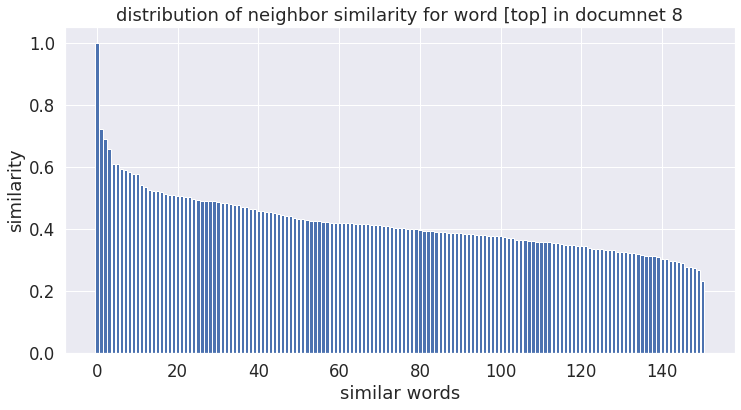

13   -->  officials
1690
[0.77819407, 0.6655568, 0.6359416, 0.6181673, 0.61695087, 0.60656565, 0.60422903, 0.6021913, 0.5998506, 0.5796405, 0.551226, 0.5278006, 0.52493876, 0.5063848, 0.50507414, 0.48874366, 0.4850338, 0.4829681, 0.47908273, 0.47645497, 0.47461802, 0.4682699, 0.4657836, 0.4586714, 0.45760384, 0.4566148, 0.45648783, 0.45543784, 0.45386896, 0.45130524, 0.4505643, 0.44792277, 0.4476581, 0.44596064, 0.44503504, 0.44475156, 0.4444379, 0.43912506, 0.4384675, 0.43694362, 0.4366703, 0.4343058, 0.43326747, 0.4305685, 0.43042004, 0.42960387, 0.4279359, 0.42665792, 0.42518917, 0.4218837, 0.42125982, 0.42006853, 0.41902134, 0.4186097, 0.41747695, 0.41732055, 0.41108787, 0.40983266, 0.40647736, 0.40613943, 0.40594172, 0.4056307, 0.40502793, 0.4036019, 0.40167898, 0.40143502, 0.40043765, 0.39991605, 0.39611062, 0.39287525, 0.39279547, 0.39204013, 0.39147687, 0.39116615, 0.39088595, 0.39021373, 0.38974676, 0.38861573, 0.38722953, 0.38638756, 0.3856998, 0.38494352, 0.38339204, 0.38244

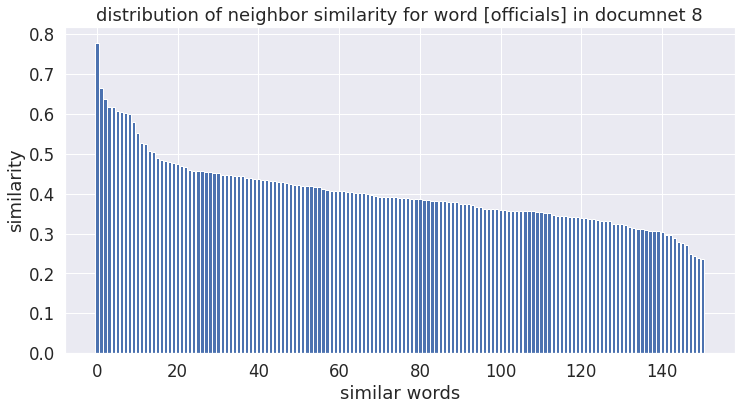

16   -->  country
1690
[0.6144241, 0.59916127, 0.5977769, 0.5858923, 0.56623864, 0.5550395, 0.5539256, 0.5525461, 0.5504744, 0.55022955, 0.53977424, 0.5334457, 0.52727425, 0.5250322, 0.5250193, 0.5213587, 0.51730716, 0.5148457, 0.51075, 0.5107372, 0.50683045, 0.49900204, 0.49041066, 0.4870005, 0.48281953, 0.48115087, 0.47487345, 0.47349426, 0.47149193, 0.46845144, 0.4670865, 0.46482933, 0.4557243, 0.45386368, 0.45385838, 0.45276058, 0.45022106, 0.44915488, 0.44903252, 0.44819728, 0.44567633, 0.44343764, 0.4414286, 0.44057214, 0.4379645, 0.43696564, 0.43263972, 0.42800385, 0.42542678, 0.42232656, 0.42017215, 0.419851, 0.41786242, 0.417832, 0.4157871, 0.41497236, 0.41238537, 0.408715, 0.40549743, 0.40548116, 0.4040435, 0.40317947, 0.39946407, 0.39647824, 0.39563853, 0.3922953, 0.3918276, 0.39105177, 0.39085186, 0.39012027, 0.39011806, 0.3895823, 0.38566333, 0.3852867, 0.38164517, 0.3760137, 0.3745886, 0.37393713, 0.3719193, 0.37190488, 0.37046388, 0.3702731, 0.36933342, 0.36855, 0.366331

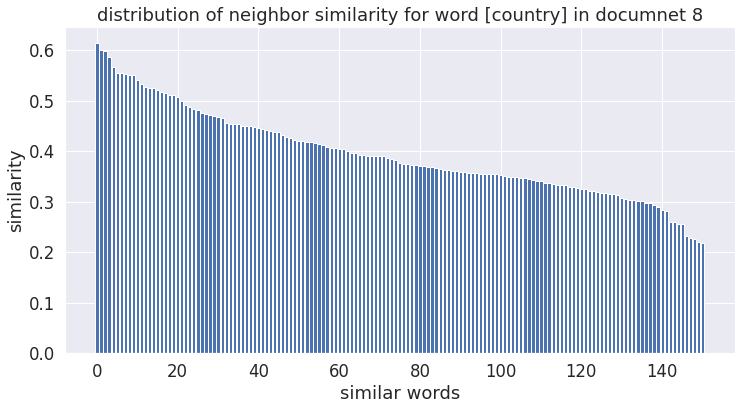

19   -->  old
1690
[0.6696249, 0.623828, 0.61078966, 0.5841576, 0.57661885, 0.57183576, 0.5677768, 0.5618049, 0.5583407, 0.5541214, 0.54685414, 0.54510224, 0.5428276, 0.5410862, 0.5347741, 0.5304487, 0.52993256, 0.5256872, 0.523684, 0.52366626, 0.518425, 0.5159863, 0.5149378, 0.51097465, 0.510534, 0.50898695, 0.50801486, 0.5041166, 0.50010157, 0.49980095, 0.4992658, 0.49825528, 0.49751386, 0.49630547, 0.494994, 0.49352556, 0.49331337, 0.49128085, 0.49114552, 0.48845595, 0.48543736, 0.48531485, 0.4830049, 0.48123348, 0.4754696, 0.46960145, 0.4690671, 0.46787077, 0.46768183, 0.46680903, 0.46502343, 0.46485555, 0.46437865, 0.46225673, 0.4582092, 0.45666796, 0.4555626, 0.4539859, 0.45384294, 0.45344752, 0.44679075, 0.44506887, 0.4393956, 0.4387815, 0.4386865, 0.43816376, 0.4368737, 0.4354018, 0.434513, 0.43211412, 0.4317096, 0.43158615, 0.4264522, 0.4262879, 0.42521995, 0.4187857, 0.41846275, 0.41644377, 0.41517827, 0.41445923, 0.41260937, 0.41258174, 0.41234645, 0.4123342, 0.41151714, 0.4

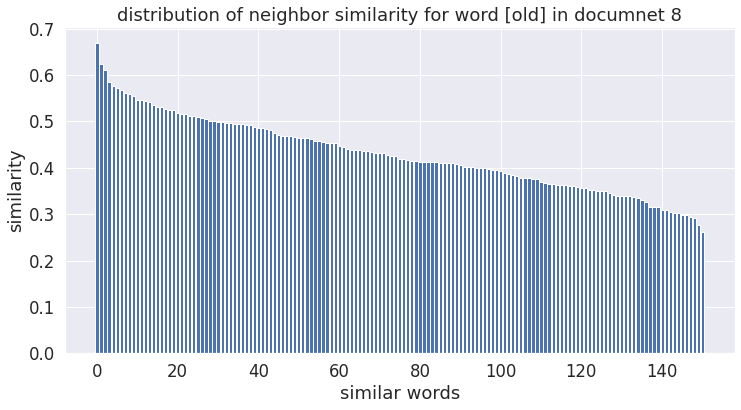

20   -->  order
1690
[0.99999994, 0.57674754, 0.57241654, 0.5409186, 0.5224381, 0.51912045, 0.5144613, 0.5088793, 0.50868, 0.49161482, 0.48782828, 0.4862951, 0.48612356, 0.47964495, 0.4688728, 0.4622782, 0.46195608, 0.46131504, 0.46091503, 0.4565643, 0.44974175, 0.44967157, 0.4486602, 0.44725853, 0.4452564, 0.44407022, 0.44250873, 0.44170994, 0.43288332, 0.42687047, 0.42562747, 0.42130387, 0.41963854, 0.41950965, 0.41737548, 0.4146781, 0.41467366, 0.41233975, 0.4114446, 0.4114438, 0.41089112, 0.4092938, 0.40404713, 0.40200567, 0.4003167, 0.3980137, 0.39739624, 0.3967334, 0.3955222, 0.39342523, 0.39299303, 0.39147514, 0.39045852, 0.38770774, 0.38683715, 0.38641024, 0.38507447, 0.38338888, 0.38338244, 0.38192135, 0.37851864, 0.37774748, 0.37393123, 0.37340373, 0.37334526, 0.37329888, 0.37247455, 0.370268, 0.36933333, 0.36898488, 0.3682523, 0.36642352, 0.35735822, 0.35731858, 0.3563698, 0.35618347, 0.3559752, 0.35523242, 0.3540249, 0.35359377, 0.35357177, 0.34998518, 0.3496577, 0.34935927

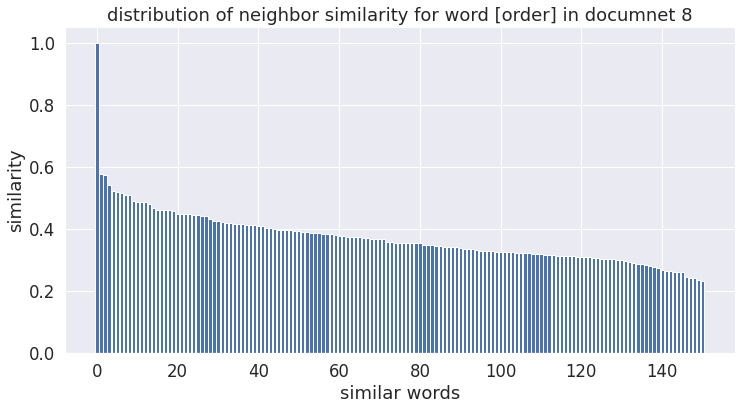

21   -->  say
1690
[1.0, 0.6723809, 0.64097786, 0.5950488, 0.5831529, 0.5771607, 0.5654434, 0.5626914, 0.5563234, 0.54432285, 0.5415156, 0.53796804, 0.5188047, 0.51274264, 0.5041141, 0.4927926, 0.4867052, 0.48612356, 0.46087307, 0.4577269, 0.45425603, 0.452642, 0.4518387, 0.45028543, 0.44232303, 0.44184357, 0.44001082, 0.43961868, 0.4356143, 0.43179932, 0.42797226, 0.42657006, 0.42146534, 0.42019612, 0.4195877, 0.41792083, 0.41781983, 0.41220236, 0.4115032, 0.41095388, 0.40859365, 0.40662593, 0.40531826, 0.4050222, 0.40489632, 0.40360934, 0.4034524, 0.39890262, 0.39869982, 0.39605406, 0.394514, 0.39368337, 0.391854, 0.39153913, 0.3912049, 0.38974363, 0.3893447, 0.38928232, 0.3879536, 0.38678193, 0.38654768, 0.38239884, 0.38177383, 0.3814562, 0.38054854, 0.37921304, 0.37872922, 0.37831563, 0.3775506, 0.3749646, 0.37062868, 0.37035108, 0.36991897, 0.36875087, 0.36642426, 0.3660026, 0.3622099, 0.36193466, 0.36023086, 0.35708532, 0.35524768, 0.35447648, 0.35165125, 0.34896803, 0.348723, 0.

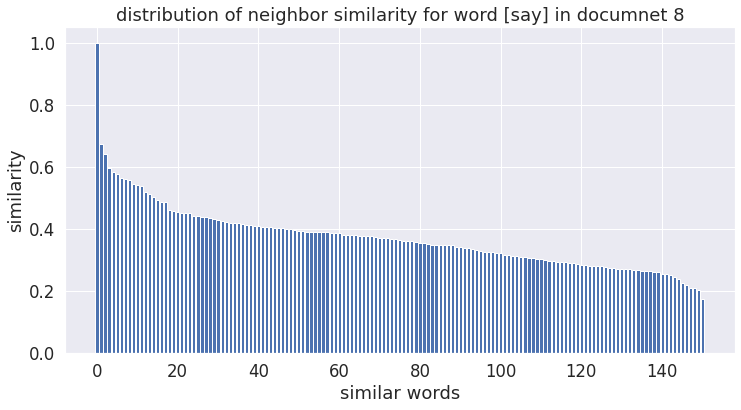

24   -->  call
1690
[0.9999998, 0.7027166, 0.5895231, 0.5831529, 0.58278316, 0.576229, 0.5689018, 0.56668293, 0.56620264, 0.56500363, 0.5549917, 0.5408081, 0.5360249, 0.53461826, 0.52319, 0.522743, 0.51514584, 0.51422024, 0.50422084, 0.5038076, 0.49227515, 0.48230934, 0.48177823, 0.473358, 0.471685, 0.46351165, 0.46343142, 0.45689917, 0.45191953, 0.4398983, 0.43864357, 0.4383104, 0.43822736, 0.42940438, 0.42759496, 0.4240683, 0.42311108, 0.4208224, 0.42016512, 0.41956592, 0.41796288, 0.41388738, 0.41187167, 0.41019967, 0.40990222, 0.40804955, 0.40748015, 0.40444177, 0.39576602, 0.3912314, 0.3904246, 0.38694733, 0.38474873, 0.38241857, 0.3814718, 0.38144332, 0.3791758, 0.37704337, 0.37677902, 0.37570977, 0.37459224, 0.37419587, 0.3724228, 0.36940596, 0.3676827, 0.36582422, 0.36530155, 0.36334932, 0.36233026, 0.362046, 0.35989448, 0.35693967, 0.35658312, 0.355966, 0.35400587, 0.35389775, 0.35380948, 0.35329312, 0.352598, 0.35014457, 0.34905723, 0.34755474, 0.3471483, 0.3467124, 0.342109,

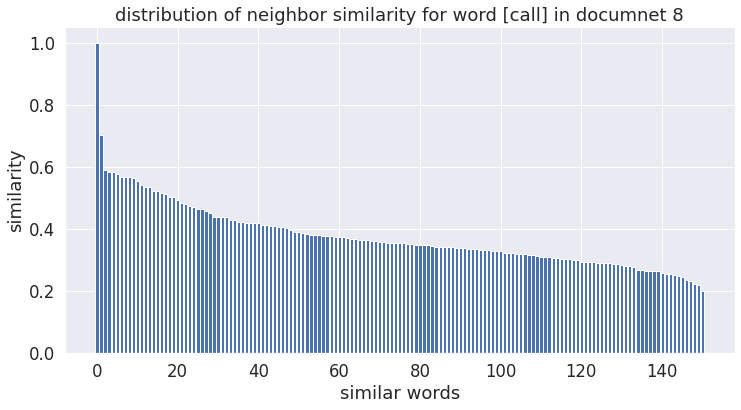

26   -->  special
1690
[0.7742063, 0.7137886, 0.71011245, 0.6830331, 0.62175477, 0.5963119, 0.5909039, 0.5904535, 0.5902062, 0.58076036, 0.580553, 0.56960934, 0.5695918, 0.5646643, 0.5646217, 0.5601115, 0.5580525, 0.5533633, 0.5470377, 0.54363376, 0.54335433, 0.5396892, 0.53657067, 0.53579366, 0.5349039, 0.52662164, 0.52614814, 0.5222151, 0.520442, 0.51695275, 0.5159806, 0.5066549, 0.50654954, 0.49978483, 0.49726832, 0.4916172, 0.4840731, 0.48338583, 0.48058683, 0.47963074, 0.47580037, 0.47356915, 0.47349414, 0.47221994, 0.47010815, 0.4665945, 0.46443772, 0.45734283, 0.45611537, 0.45352203, 0.45267463, 0.4514827, 0.4468822, 0.44577557, 0.4430839, 0.44254625, 0.43904248, 0.43825877, 0.43794423, 0.43685737, 0.435932, 0.43202406, 0.43176588, 0.429991, 0.42981407, 0.42962924, 0.42909664, 0.42841095, 0.42545405, 0.42434117, 0.4240763, 0.42332894, 0.41832256, 0.4183059, 0.41693643, 0.41688225, 0.41661686, 0.4155163, 0.41415882, 0.41382605, 0.41255313, 0.4120388, 0.40752554, 0.4057395, 0.4026

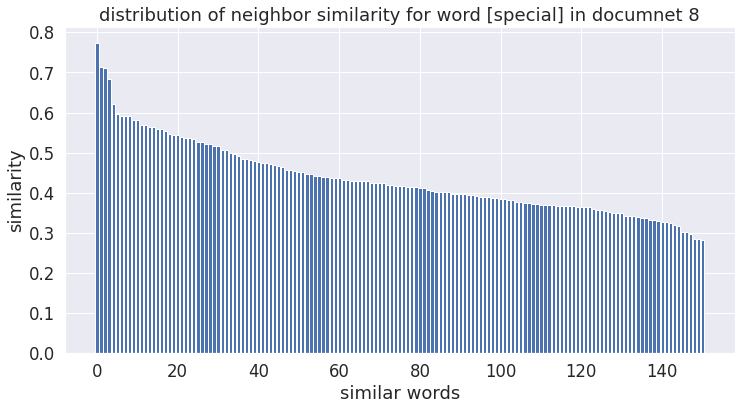

27   -->  congress
1690
[0.799783, 0.673452, 0.6227339, 0.62013865, 0.60768795, 0.5970785, 0.5969187, 0.59484875, 0.58977056, 0.5826872, 0.5797568, 0.5793927, 0.5754275, 0.57383406, 0.5685123, 0.56743854, 0.564453, 0.5615501, 0.551672, 0.54687065, 0.53574026, 0.5272811, 0.5235595, 0.5174111, 0.5079254, 0.50730443, 0.5061523, 0.5046841, 0.49976394, 0.49966633, 0.49873877, 0.4978317, 0.49734044, 0.49638546, 0.4952075, 0.4885037, 0.4873515, 0.48205012, 0.4749393, 0.4673782, 0.46590388, 0.46441227, 0.4623719, 0.45633522, 0.45462996, 0.45182422, 0.4516581, 0.45074338, 0.4500842, 0.4478769, 0.4469581, 0.4462752, 0.4432725, 0.44224727, 0.43771347, 0.43600816, 0.43184665, 0.42898318, 0.4288897, 0.42813545, 0.421, 0.4199003, 0.41784194, 0.41418684, 0.41072145, 0.4104946, 0.40873572, 0.40871724, 0.40809292, 0.40738744, 0.40734273, 0.40424109, 0.4033753, 0.40270907, 0.40113688, 0.39909083, 0.39897138, 0.39579135, 0.39193738, 0.39141977, 0.390631, 0.39039588, 0.38943347, 0.38623592, 0.38366365, 0.

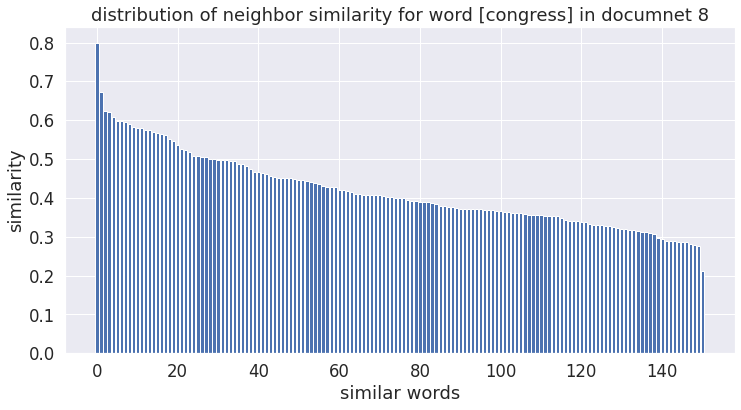

29   -->  di
1690
[0.9999998, 0.84251046, 0.8342446, 0.7071519, 0.6478813, 0.58359957, 0.5688688, 0.56710684, 0.5659751, 0.563357, 0.544737, 0.5298894, 0.5256107, 0.5196543, 0.5161504, 0.512281, 0.5102066, 0.5101589, 0.508956, 0.50852275, 0.4992674, 0.49745387, 0.49610567, 0.49174017, 0.48934263, 0.48797926, 0.48760486, 0.48350188, 0.48216623, 0.47560892, 0.4740533, 0.47193986, 0.47074437, 0.47066075, 0.4685837, 0.4682867, 0.46819925, 0.46817043, 0.46299148, 0.45988026, 0.4589541, 0.45883948, 0.45672148, 0.45128688, 0.44804448, 0.44445664, 0.44436926, 0.44319302, 0.44270617, 0.4404354, 0.4383104, 0.43714246, 0.43665302, 0.43581116, 0.43539014, 0.43394566, 0.4325927, 0.42768788, 0.42561942, 0.42432374, 0.41995114, 0.4194942, 0.4166202, 0.4164486, 0.4159283, 0.41437018, 0.4116031, 0.40887892, 0.4086353, 0.40763015, 0.40740448, 0.4046901, 0.4028396, 0.4021222, 0.4014416, 0.39923298, 0.39915678, 0.39846337, 0.3979246, 0.3950181, 0.39495552, 0.3945732, 0.394514, 0.3913669, 0.38999292, 0.387

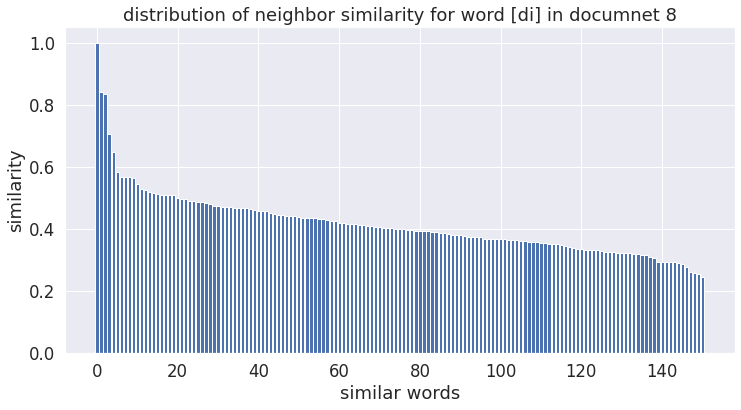

30   -->  ##sman
1690
[0.99999964, 0.84251046, 0.8388923, 0.7117926, 0.64175946, 0.638058, 0.6192249, 0.614596, 0.6096797, 0.5997239, 0.5938739, 0.5901303, 0.58814746, 0.5873785, 0.58577347, 0.5730847, 0.57047635, 0.5667665, 0.5646285, 0.5601356, 0.5592092, 0.55495316, 0.5542773, 0.5452393, 0.5417398, 0.54055274, 0.5392026, 0.5355822, 0.5347648, 0.53052425, 0.5287044, 0.5265192, 0.5215286, 0.52102757, 0.5155537, 0.51422024, 0.512334, 0.511305, 0.5093618, 0.50689197, 0.50485265, 0.504362, 0.5006561, 0.49905849, 0.49865568, 0.49690884, 0.49432373, 0.49397403, 0.49385214, 0.4929985, 0.4894957, 0.4858147, 0.4855981, 0.48306274, 0.48266476, 0.47838432, 0.47374275, 0.47246122, 0.46537018, 0.46452296, 0.459905, 0.4573415, 0.4555895, 0.44716734, 0.44694424, 0.44437546, 0.4386598, 0.4377752, 0.43692863, 0.43462753, 0.433219, 0.43264312, 0.42963955, 0.42774898, 0.42721644, 0.42701834, 0.42404908, 0.42311406, 0.42150766, 0.41927332, 0.41781983, 0.41548595, 0.41222382, 0.4119686, 0.41185576, 0.409

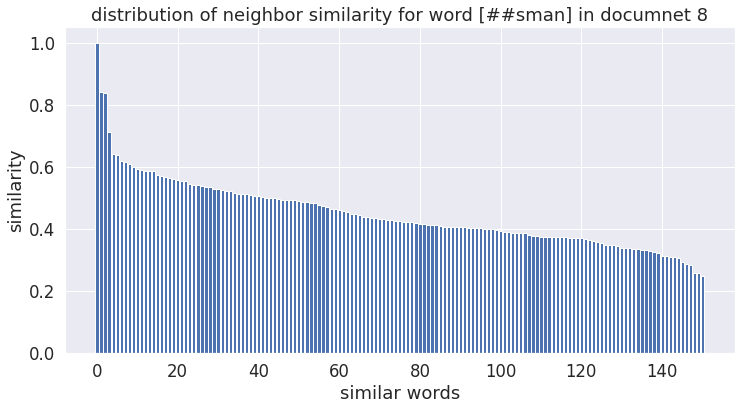

31   -->  ##tle
1690
[0.99999994, 0.8388923, 0.8342446, 0.70921874, 0.68480915, 0.6672748, 0.63688123, 0.6283711, 0.612272, 0.6087694, 0.5638852, 0.54814684, 0.5475534, 0.5409902, 0.5408081, 0.5370551, 0.53649646, 0.53013587, 0.52922046, 0.5210929, 0.5205509, 0.51750934, 0.5158377, 0.5157838, 0.5079343, 0.5052401, 0.50337887, 0.49873286, 0.49729985, 0.49582797, 0.49118853, 0.48889363, 0.48608565, 0.48495892, 0.48181295, 0.48031586, 0.48002094, 0.47891662, 0.4778877, 0.4775645, 0.4774087, 0.47126478, 0.47094688, 0.4696743, 0.46899706, 0.4687632, 0.4669367, 0.46379596, 0.4631114, 0.46311074, 0.46161807, 0.461271, 0.4576056, 0.4557739, 0.45432833, 0.45409754, 0.45393863, 0.4525345, 0.4523991, 0.45232612, 0.4520508, 0.4515462, 0.45132458, 0.45028543, 0.44992837, 0.4486755, 0.44834214, 0.4466555, 0.44654894, 0.44330063, 0.44044846, 0.43815777, 0.43759677, 0.4315774, 0.431552, 0.42617387, 0.42301172, 0.4212991, 0.417603, 0.41524595, 0.41510046, 0.41471314, 0.4144706, 0.41261426, 0.41236997, 

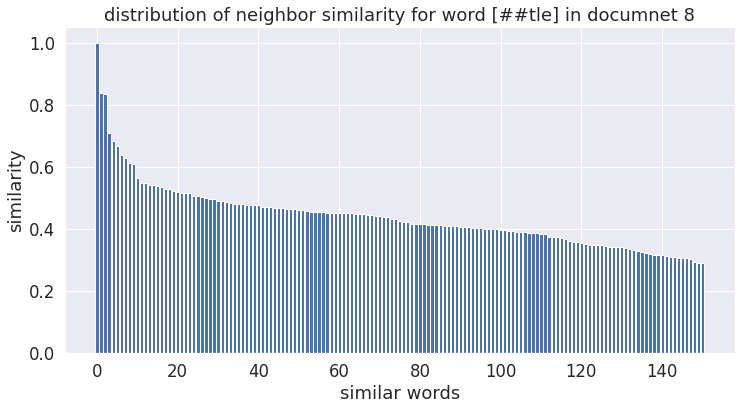

33   -->  disgrace
1690
[1.0000001, 0.76432663, 0.7117926, 0.7071519, 0.69192564, 0.68480915, 0.6580007, 0.65795195, 0.6503774, 0.63015085, 0.6261155, 0.62200916, 0.6218336, 0.6102489, 0.603915, 0.59947646, 0.5865592, 0.58401877, 0.5767095, 0.5756426, 0.5715492, 0.56883514, 0.5611348, 0.557991, 0.55796194, 0.55708164, 0.55678463, 0.55617905, 0.55567646, 0.5533403, 0.5503943, 0.54863775, 0.546672, 0.5458641, 0.5445594, 0.54105675, 0.5346838, 0.5323849, 0.5294946, 0.52616465, 0.5243747, 0.5228819, 0.52241844, 0.5132554, 0.5107785, 0.5099064, 0.50698066, 0.5054969, 0.50460505, 0.5036607, 0.5023322, 0.49937135, 0.49421993, 0.49057192, 0.4883815, 0.48713344, 0.4868314, 0.48317885, 0.48312753, 0.48205498, 0.47767496, 0.4737948, 0.47318646, 0.4714588, 0.46863222, 0.46834216, 0.46725237, 0.4661696, 0.46579522, 0.46561432, 0.46544188, 0.46493155, 0.46300334, 0.46281824, 0.46195608, 0.46094272, 0.45906544, 0.45213175, 0.44732898, 0.4467512, 0.44557726, 0.44452634, 0.44145542, 0.43984348, 0.43968

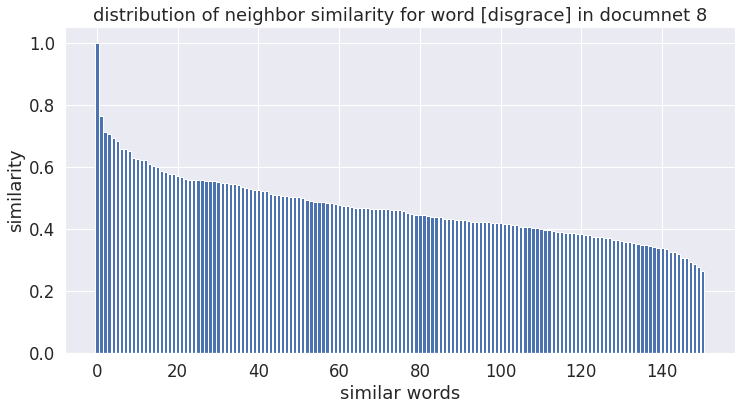

34   -->  ##d
1690
[1.0, 0.76432663, 0.6478813, 0.6087694, 0.5938739, 0.5780285, 0.5679839, 0.5638975, 0.5614924, 0.55197954, 0.5439782, 0.5397979, 0.53936446, 0.538697, 0.5354003, 0.52373034, 0.5226272, 0.5187967, 0.5149167, 0.5131577, 0.50682425, 0.50165683, 0.4996041, 0.49650952, 0.49628288, 0.495526, 0.49030817, 0.48928785, 0.4870165, 0.4844408, 0.4844149, 0.48085153, 0.47824076, 0.47804302, 0.47019, 0.4670247, 0.46531805, 0.4609853, 0.4609515, 0.4600429, 0.4596253, 0.45786017, 0.45659378, 0.4525897, 0.45256925, 0.451465, 0.4514405, 0.4504204, 0.44884145, 0.4444517, 0.4442853, 0.44415766, 0.44204587, 0.44028762, 0.4389101, 0.4374331, 0.4365846, 0.43425596, 0.43276525, 0.4304964, 0.4298219, 0.42621246, 0.42553496, 0.424324, 0.422588, 0.42236447, 0.4217835, 0.42141038, 0.4212071, 0.42085078, 0.42057312, 0.4204972, 0.42045447, 0.4204228, 0.41974914, 0.4178361, 0.4175827, 0.41744184, 0.41610247, 0.41468945, 0.41179746, 0.41029698, 0.4099367, 0.40958548, 0.3997172, 0.39928037, 0.3992774

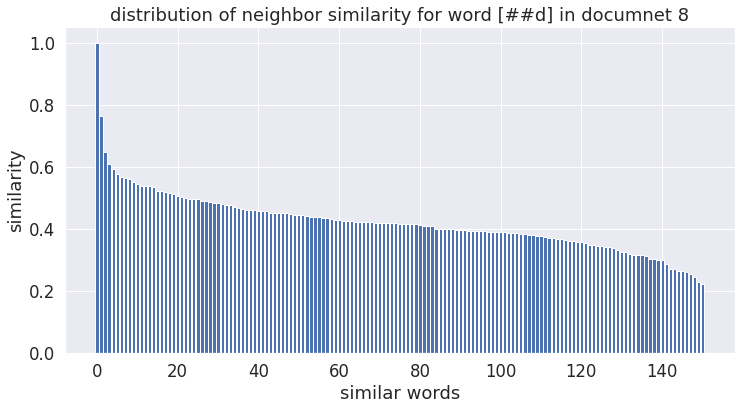

35   -->  party
1690
[0.7549875, 0.70034736, 0.67862505, 0.6363162, 0.6254326, 0.61502075, 0.61250925, 0.6069168, 0.5927691, 0.5883371, 0.5810479, 0.57076645, 0.56734073, 0.5673007, 0.5667212, 0.55810386, 0.5571214, 0.55119693, 0.5503082, 0.54765946, 0.5465417, 0.54477084, 0.5428328, 0.54169524, 0.540548, 0.5400707, 0.5395217, 0.53922796, 0.5376742, 0.53504086, 0.5332337, 0.53322536, 0.5290507, 0.52861565, 0.52501315, 0.5179496, 0.5170347, 0.5162649, 0.5130364, 0.51031464, 0.50993866, 0.5091697, 0.5078598, 0.50346184, 0.50279164, 0.50240767, 0.49276182, 0.49257705, 0.48979038, 0.487784, 0.48588657, 0.48361397, 0.47996256, 0.47598052, 0.47539896, 0.4744283, 0.47438383, 0.4739524, 0.47351933, 0.47295907, 0.47262374, 0.46653134, 0.4560204, 0.45492068, 0.44877842, 0.44727853, 0.44585523, 0.44570637, 0.44546205, 0.44501448, 0.44293243, 0.44093275, 0.4401545, 0.43709597, 0.43684518, 0.4344816, 0.43422627, 0.43059075, 0.43027908, 0.4267258, 0.42641014, 0.42411196, 0.42302647, 0.4220506, 0.420

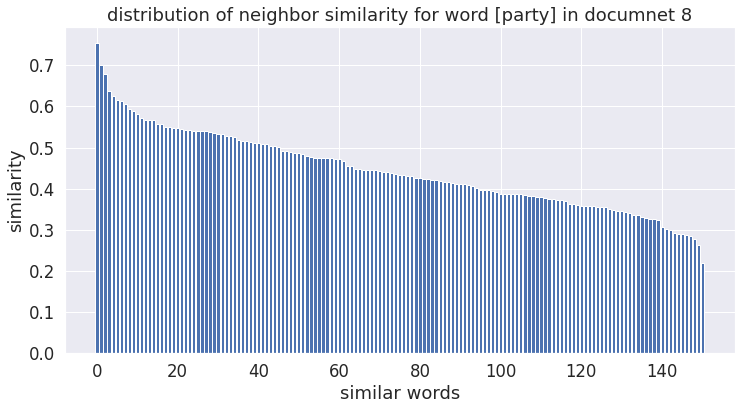

36   -->  even
1690
[0.5780518, 0.55091596, 0.52423286, 0.51619244, 0.51358104, 0.5085058, 0.48882464, 0.48485836, 0.4835369, 0.47949108, 0.47878802, 0.47567314, 0.47491506, 0.47342837, 0.47293782, 0.47225994, 0.47095472, 0.465224, 0.46478355, 0.46352607, 0.46239537, 0.4561063, 0.45313933, 0.4522326, 0.4494886, 0.44185486, 0.43768543, 0.43712515, 0.43427056, 0.42807007, 0.42756748, 0.4264717, 0.42576727, 0.42557383, 0.422827, 0.42186558, 0.42125607, 0.41997096, 0.4195377, 0.41889283, 0.4175691, 0.4153486, 0.41142613, 0.40799475, 0.4044936, 0.40205637, 0.40127814, 0.40051186, 0.3997603, 0.39938867, 0.39642027, 0.39566374, 0.3956579, 0.3955816, 0.39542174, 0.39418018, 0.39287236, 0.3924876, 0.38823634, 0.38816348, 0.3865349, 0.38605648, 0.38220423, 0.3797533, 0.37754452, 0.37714794, 0.37665185, 0.37468153, 0.37403864, 0.37291825, 0.37231016, 0.37131065, 0.37086725, 0.37029997, 0.36967102, 0.3692352, 0.36810187, 0.3673838, 0.36717185, 0.36646754, 0.36386293, 0.3624854, 0.36211938, 0.36012

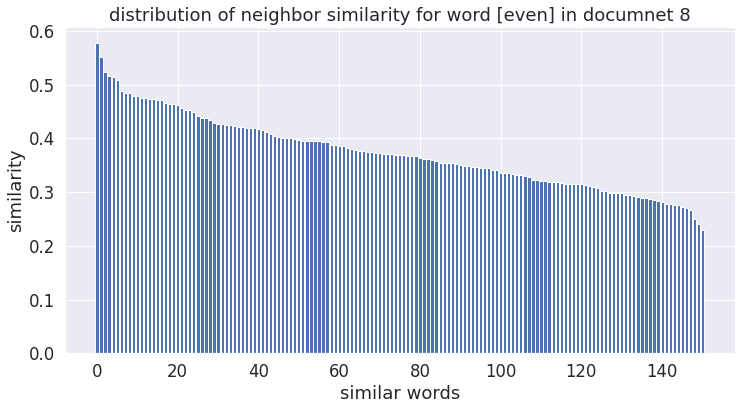

38   -->  free
1690
[1.0, 0.8444704, 0.72117597, 0.68268687, 0.6776037, 0.6515105, 0.6409105, 0.61946034, 0.5979328, 0.5971088, 0.59256685, 0.58493173, 0.5823142, 0.5748062, 0.56679404, 0.56487215, 0.56276226, 0.55726266, 0.5551559, 0.55495316, 0.55379605, 0.5523044, 0.5485784, 0.5476847, 0.5360249, 0.5334857, 0.52922046, 0.52920574, 0.5292027, 0.5249265, 0.5228819, 0.508956, 0.5067643, 0.5062238, 0.5018192, 0.49408996, 0.49367535, 0.49236473, 0.48889014, 0.48797843, 0.4846992, 0.4844408, 0.47161397, 0.46979654, 0.46829575, 0.46553764, 0.4653558, 0.46527815, 0.4645066, 0.46317154, 0.45738024, 0.45597738, 0.45548052, 0.4532547, 0.4521679, 0.4505487, 0.45043385, 0.44583064, 0.44419926, 0.44147605, 0.43890536, 0.4386683, 0.4375279, 0.43546364, 0.4344611, 0.43032575, 0.4267357, 0.4256232, 0.4255851, 0.4242948, 0.42207682, 0.42173678, 0.42005524, 0.41873214, 0.4155646, 0.41496408, 0.4137584, 0.41180825, 0.4116771, 0.41059065, 0.41053653, 0.40965682, 0.40937084, 0.4088894, 0.4075331, 0.40687

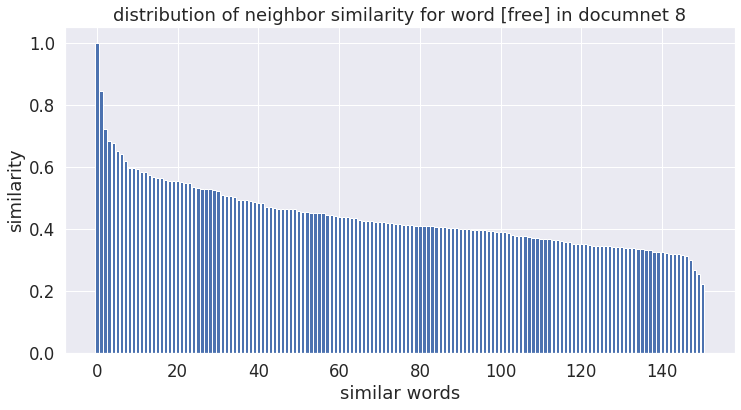

39   -->  elections
1690
[0.88000417, 0.7461339, 0.6987066, 0.67654246, 0.6408777, 0.61582464, 0.59080696, 0.58582425, 0.58459496, 0.5808966, 0.5798341, 0.5784609, 0.5512322, 0.54839164, 0.54636204, 0.54390454, 0.5436344, 0.5428288, 0.5302596, 0.5271735, 0.52131414, 0.51874864, 0.5177516, 0.5154273, 0.5088711, 0.49436703, 0.49140537, 0.4912942, 0.4900167, 0.48934796, 0.4860176, 0.48551986, 0.48330218, 0.48319745, 0.47949392, 0.47724867, 0.47223935, 0.4688753, 0.46817964, 0.46665275, 0.46341023, 0.4631958, 0.45334336, 0.44843203, 0.4479851, 0.44773716, 0.4429858, 0.43830216, 0.4356308, 0.43545568, 0.43493322, 0.43127912, 0.42950284, 0.42795983, 0.42361492, 0.42145586, 0.4209906, 0.4199182, 0.41805267, 0.417239, 0.41593373, 0.41416717, 0.41214633, 0.4119735, 0.4117081, 0.4109558, 0.41071057, 0.40962923, 0.40655276, 0.4059326, 0.40587512, 0.4054298, 0.40509528, 0.40316966, 0.40308005, 0.39909428, 0.3989041, 0.39884776, 0.39751628, 0.39694524, 0.39592665, 0.3946014, 0.39432216, 0.39245918,

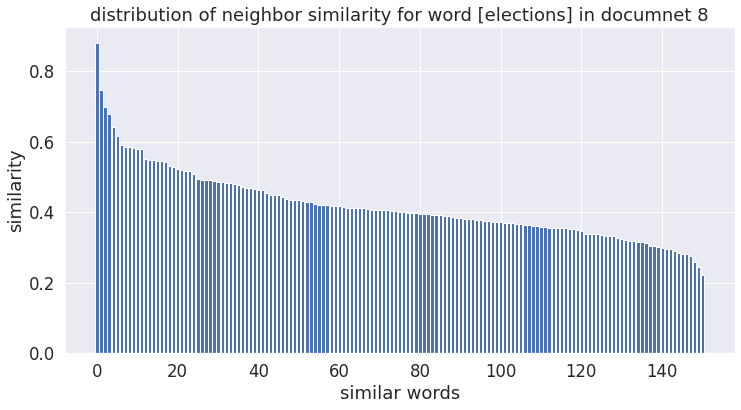

41   -->  held
1690
[0.8934698, 0.7286564, 0.7138066, 0.692528, 0.67021036, 0.65243316, 0.6409676, 0.6006025, 0.59413105, 0.5502838, 0.54990494, 0.54840666, 0.5482448, 0.53291756, 0.51307255, 0.5010246, 0.49870414, 0.49842042, 0.49551752, 0.49440014, 0.49101228, 0.4887133, 0.48690346, 0.4852358, 0.4815136, 0.4803018, 0.47174737, 0.47075808, 0.46834704, 0.46269834, 0.4626795, 0.4622395, 0.46207017, 0.4619941, 0.45944774, 0.45714223, 0.4571122, 0.45687336, 0.45663083, 0.45494258, 0.45356685, 0.4525215, 0.44864416, 0.44731164, 0.4455905, 0.4403432, 0.43796372, 0.4338587, 0.432988, 0.42916253, 0.4271279, 0.42684466, 0.4248356, 0.423254, 0.4189862, 0.41843325, 0.4184225, 0.41214186, 0.41139674, 0.41133273, 0.4104938, 0.40972856, 0.40870214, 0.4066896, 0.40559745, 0.39956754, 0.39494407, 0.393241, 0.39098033, 0.3894946, 0.38421053, 0.38350862, 0.38196725, 0.3809613, 0.38063854, 0.37973633, 0.37935403, 0.37797347, 0.37611276, 0.376059, 0.37602746, 0.37308064, 0.37254483, 0.37247896, 0.3709075

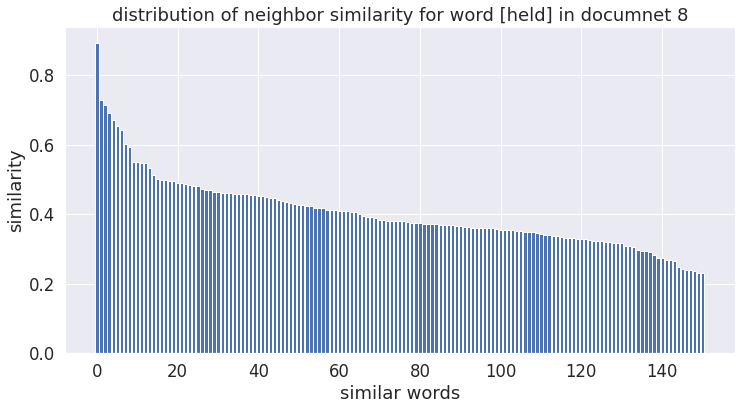

43   -->  april
1690
[1.0000002, 0.6515105, 0.6394422, 0.61038494, 0.5982052, 0.5979562, 0.5941375, 0.59321326, 0.56585705, 0.5655336, 0.56548065, 0.5574737, 0.55644, 0.54394937, 0.54313165, 0.53567356, 0.52929986, 0.522743, 0.51635873, 0.5138835, 0.48720226, 0.4855981, 0.48104355, 0.47845483, 0.47767496, 0.4724548, 0.4720717, 0.46991366, 0.46720946, 0.46675453, 0.46065325, 0.45883948, 0.45393863, 0.45128196, 0.4511909, 0.44857454, 0.44426072, 0.44424647, 0.44424438, 0.43756694, 0.43729508, 0.43042022, 0.42734015, 0.42664397, 0.42564183, 0.4223765, 0.4217835, 0.41911542, 0.41552064, 0.4118809, 0.4111185, 0.40911692, 0.4074429, 0.40489632, 0.40412867, 0.4027901, 0.4022852, 0.40205538, 0.4008224, 0.39930668, 0.39914268, 0.39484262, 0.3935745, 0.39242238, 0.39226717, 0.3922089, 0.38810873, 0.38721108, 0.38672322, 0.38498, 0.38445318, 0.37564373, 0.37526846, 0.37247455, 0.3706727, 0.3678996, 0.36597353, 0.36440697, 0.36298126, 0.36289176, 0.36105332, 0.35883158, 0.35795033, 0.3539244, 0.35

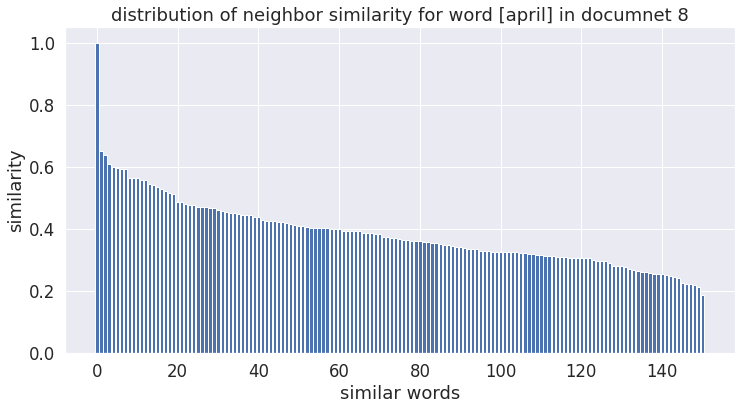

45   -->  late
1690
[0.9999998, 0.8618387, 0.8365177, 0.6039244, 0.6010015, 0.5979562, 0.5973191, 0.59505177, 0.59076524, 0.5748062, 0.5684472, 0.56152415, 0.5606581, 0.55928516, 0.549415, 0.5440196, 0.5404813, 0.54044044, 0.53773856, 0.53527653, 0.5304221, 0.52970886, 0.5296203, 0.5271013, 0.5260898, 0.5243747, 0.5215286, 0.5190305, 0.51801175, 0.5164491, 0.5089878, 0.5045929, 0.5041141, 0.5038076, 0.50355834, 0.5030159, 0.5029506, 0.50074494, 0.499983, 0.4999559, 0.4774288, 0.47694305, 0.4761068, 0.47529823, 0.47371572, 0.4652254, 0.46435618, 0.4595728, 0.4580769, 0.45805633, 0.45344862, 0.4523991, 0.45167607, 0.45128688, 0.4510827, 0.44976318, 0.4496751, 0.44821078, 0.4432741, 0.44204587, 0.43578577, 0.43327355, 0.43288332, 0.43151137, 0.4314536, 0.4311791, 0.4307243, 0.42921817, 0.42547438, 0.42412466, 0.41945195, 0.41919386, 0.4187373, 0.41688293, 0.4168026, 0.4166919, 0.41586417, 0.4145605, 0.41382226, 0.41173553, 0.4091305, 0.4032666, 0.40218145, 0.40144053, 0.40134048, 0.400814

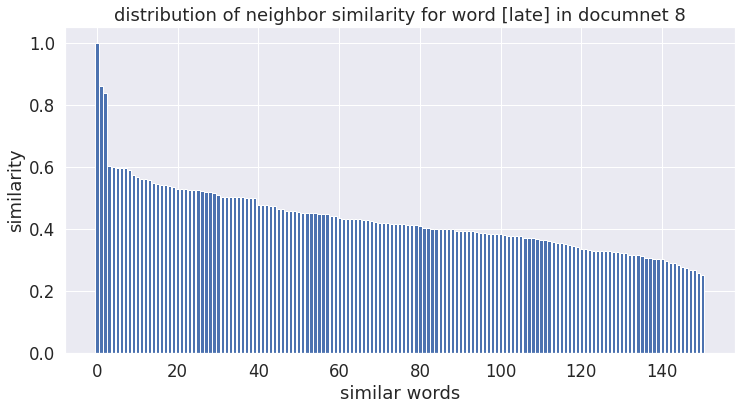

46   -->  saturday
1690
[1.0, 0.8618387, 0.7875103, 0.6394422, 0.6278233, 0.6162012, 0.59256685, 0.5766835, 0.5765755, 0.57628053, 0.5681689, 0.5675786, 0.5638823, 0.5606922, 0.5606079, 0.55867374, 0.5550869, 0.5533403, 0.5496398, 0.5485335, 0.5372635, 0.53646696, 0.53580153, 0.53161955, 0.5246979, 0.5167153, 0.5113782, 0.5059573, 0.504362, 0.5018488, 0.50101244, 0.49423856, 0.49267346, 0.49257064, 0.49167326, 0.48795423, 0.48234728, 0.4786458, 0.47794628, 0.47598654, 0.47422868, 0.47295052, 0.47130936, 0.46343142, 0.4622782, 0.461984, 0.4612068, 0.45912528, 0.4566052, 0.4563719, 0.45536733, 0.4519037, 0.4513532, 0.45076472, 0.44804448, 0.44747832, 0.4472201, 0.44640988, 0.4444517, 0.44286826, 0.44273597, 0.44269687, 0.4425161, 0.44001082, 0.43959844, 0.43759677, 0.436966, 0.43554485, 0.43494523, 0.43329784, 0.42983848, 0.42964712, 0.4271228, 0.4255491, 0.42353722, 0.42104134, 0.41849968, 0.41821757, 0.4138431, 0.4136528, 0.41307783, 0.41241264, 0.41101456, 0.41033113, 0.4102684, 0.407

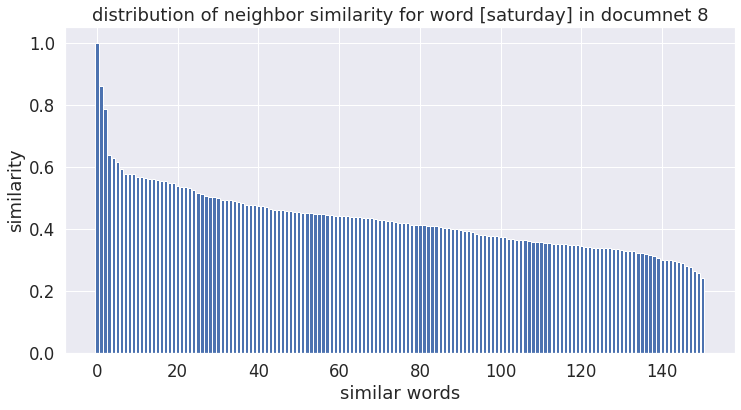

47   -->  night
1690
[1.0, 0.8365177, 0.7875103, 0.67013574, 0.6324496, 0.5933696, 0.5926714, 0.5853505, 0.5682163, 0.56668293, 0.5587487, 0.5451057, 0.54432285, 0.54394937, 0.54225016, 0.53719956, 0.5304053, 0.52920574, 0.52820563, 0.52634346, 0.51860124, 0.5175823, 0.5154012, 0.5124677, 0.511305, 0.5107785, 0.50495154, 0.50432944, 0.50330937, 0.5028606, 0.5020113, 0.49881154, 0.49736172, 0.4938953, 0.49025095, 0.48740214, 0.4859565, 0.48533162, 0.48092243, 0.48023045, 0.47814715, 0.47767222, 0.47723988, 0.46976823, 0.46767482, 0.46520045, 0.46490684, 0.4635312, 0.46313846, 0.46272674, 0.4622444, 0.4605697, 0.45882946, 0.4577298, 0.45672148, 0.45669907, 0.45560938, 0.45432833, 0.45258236, 0.45244893, 0.45178527, 0.4514405, 0.45130438, 0.45055026, 0.44824147, 0.44528732, 0.4428623, 0.44255045, 0.44172382, 0.44081235, 0.43095386, 0.4278574, 0.42669487, 0.42410576, 0.41950965, 0.41868284, 0.4184378, 0.41338718, 0.413166, 0.4125484, 0.41110104, 0.41058046, 0.40857178, 0.408552, 0.4080602,

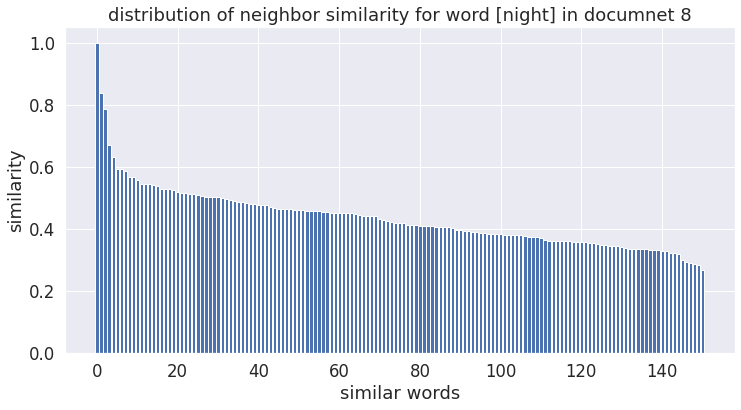

50   -->  group
1690
[1.0000002, 0.67013574, 0.6424444, 0.63597953, 0.6254287, 0.62046075, 0.61515236, 0.59804225, 0.59505177, 0.59126216, 0.5633329, 0.55277133, 0.547161, 0.54658884, 0.545158, 0.53555876, 0.5345261, 0.5329504, 0.53161955, 0.53143185, 0.5262883, 0.5261655, 0.5253396, 0.52175653, 0.5215434, 0.5215275, 0.5214709, 0.5198047, 0.5188047, 0.51354074, 0.5082375, 0.5052608, 0.501857, 0.49929142, 0.49676517, 0.49397403, 0.49227515, 0.49144745, 0.4893033, 0.48780146, 0.4871037, 0.4863448, 0.48495892, 0.48312753, 0.48245412, 0.48143166, 0.47555465, 0.47428146, 0.4721729, 0.46986863, 0.46722567, 0.46528038, 0.46492398, 0.46316433, 0.46299148, 0.46187133, 0.4572249, 0.45548052, 0.45082986, 0.45082754, 0.450687, 0.4483616, 0.44700423, 0.4462628, 0.443058, 0.4421317, 0.4405557, 0.4396814, 0.43748146, 0.4374616, 0.4348737, 0.4343114, 0.4340905, 0.43189383, 0.43107265, 0.43094215, 0.42981055, 0.4282102, 0.42768657, 0.42740136, 0.4271715, 0.42664397, 0.424324, 0.42409784, 0.4236365, 0.4

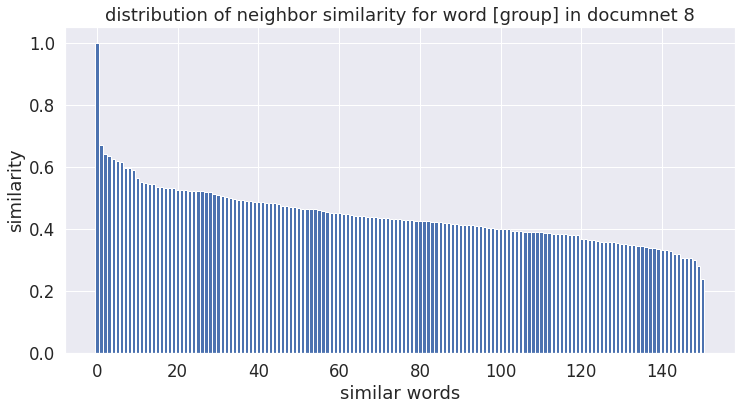

52   -->  party
1690
[0.7021171, 0.63600457, 0.6180234, 0.61418146, 0.60696065, 0.60586804, 0.6051074, 0.5997789, 0.5874495, 0.5826144, 0.5703491, 0.5671346, 0.5655828, 0.56356126, 0.5624118, 0.56095433, 0.5605374, 0.5573249, 0.5559048, 0.5545349, 0.54608476, 0.54585004, 0.5428291, 0.54107594, 0.53927326, 0.5310587, 0.52337414, 0.5186566, 0.51671493, 0.51273805, 0.51236, 0.5114455, 0.5105809, 0.5102429, 0.5102029, 0.5083362, 0.5056889, 0.50523305, 0.4947778, 0.49409467, 0.49091965, 0.4903652, 0.48820943, 0.4880379, 0.48411638, 0.48111808, 0.48095858, 0.48093355, 0.4777007, 0.47643784, 0.47627506, 0.47499025, 0.47443405, 0.46548462, 0.46380728, 0.4596857, 0.45869738, 0.4584651, 0.4552904, 0.45267794, 0.4520552, 0.45173925, 0.45104, 0.44790977, 0.4470706, 0.44653267, 0.44543147, 0.44175512, 0.4383278, 0.43767542, 0.43647388, 0.4356686, 0.43528193, 0.43282852, 0.43125677, 0.42917824, 0.42862496, 0.4266013, 0.42596674, 0.42558223, 0.41954982, 0.4169171, 0.4159786, 0.4149535, 0.4148841, 0.4

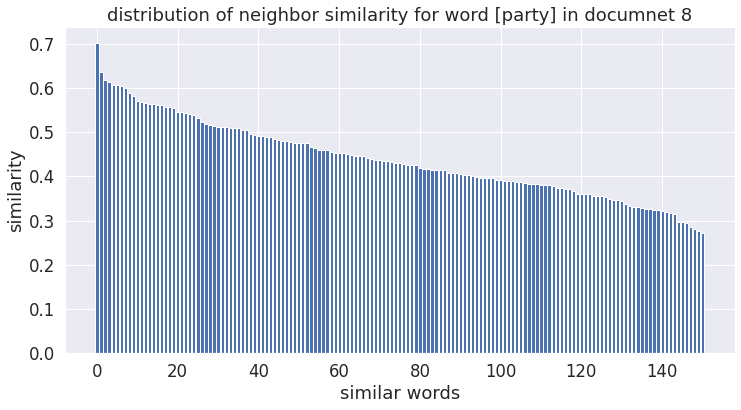

53   -->  officials
1690
[0.69575757, 0.6787235, 0.6370195, 0.63534856, 0.61722004, 0.60959363, 0.6056584, 0.5958166, 0.5936412, 0.5880527, 0.5831719, 0.58177805, 0.57445997, 0.56967574, 0.5691628, 0.5645752, 0.56372476, 0.56274813, 0.5543443, 0.5481532, 0.5476452, 0.54662967, 0.5349769, 0.53420985, 0.53167224, 0.530255, 0.5283594, 0.5281647, 0.52757907, 0.5274824, 0.5253095, 0.52474856, 0.5229333, 0.52119744, 0.52061087, 0.517768, 0.5176275, 0.51612735, 0.5129739, 0.51267004, 0.5106819, 0.5099034, 0.50917464, 0.5089015, 0.50660235, 0.5060215, 0.504825, 0.50235856, 0.50166625, 0.4986, 0.49532634, 0.49222934, 0.492073, 0.49178332, 0.48885188, 0.48816717, 0.48726147, 0.48485994, 0.47763538, 0.47747022, 0.47551176, 0.47521988, 0.47498262, 0.4734722, 0.47334844, 0.4729358, 0.46741965, 0.4666803, 0.46608073, 0.46536896, 0.46524233, 0.4639019, 0.46376365, 0.45942187, 0.4574433, 0.4564287, 0.4561878, 0.45555425, 0.4535501, 0.45234329, 0.45178205, 0.451411, 0.44926345, 0.44885063, 0.4486761, 0

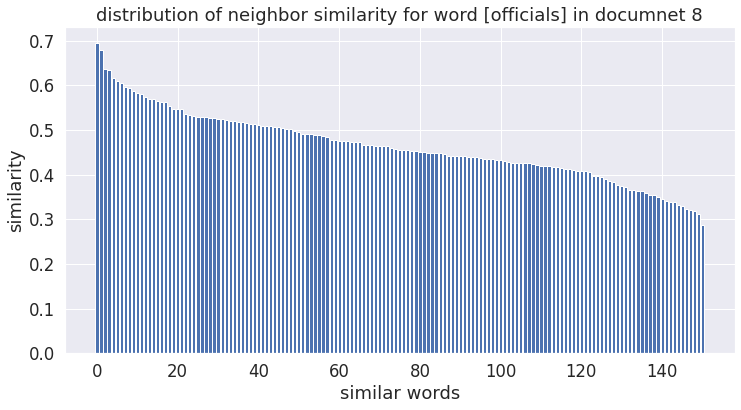

55   -->  many
1690
[0.8124247, 0.7441069, 0.73831403, 0.6239674, 0.5978422, 0.5701505, 0.55674314, 0.5539975, 0.54992306, 0.54533976, 0.5381658, 0.5372803, 0.5243333, 0.51716936, 0.5166659, 0.51573247, 0.51504415, 0.5144839, 0.5129464, 0.51198334, 0.5090458, 0.5068572, 0.50513315, 0.5050006, 0.5049445, 0.5032058, 0.5027267, 0.4973005, 0.4916027, 0.49063808, 0.4898591, 0.48104692, 0.4807354, 0.48052132, 0.48018587, 0.47668523, 0.47641647, 0.47587094, 0.47580653, 0.47477287, 0.4733278, 0.47229588, 0.4709733, 0.47083837, 0.47004727, 0.4700246, 0.46927822, 0.46355915, 0.4632185, 0.46223652, 0.46212232, 0.46123937, 0.4593648, 0.45916215, 0.4578706, 0.45717824, 0.456667, 0.45659262, 0.45600623, 0.45500898, 0.4545256, 0.454324, 0.45350176, 0.45175087, 0.4504791, 0.44934008, 0.44870156, 0.44847813, 0.44792563, 0.44676524, 0.4450155, 0.44428828, 0.4429711, 0.4415666, 0.44040096, 0.43999246, 0.43915868, 0.43833268, 0.43659115, 0.43601292, 0.4359635, 0.43587524, 0.43546718, 0.43508047, 0.4348504

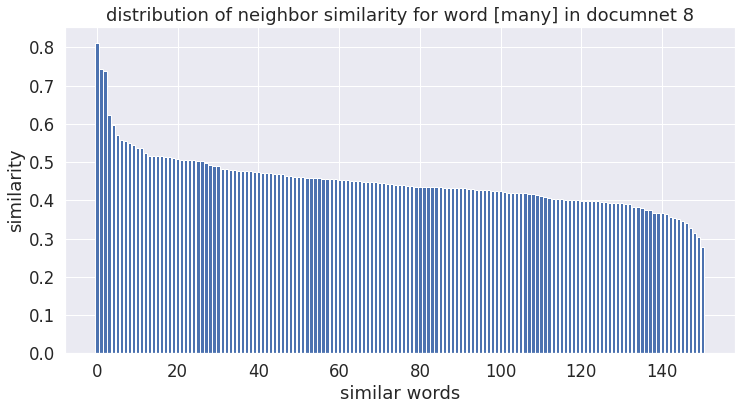

58   -->  quickly
1690
[0.9999999, 0.7950298, 0.71346736, 0.68431437, 0.5922605, 0.5917434, 0.5868888, 0.5701865, 0.5605464, 0.55807906, 0.5492381, 0.54024833, 0.5367958, 0.53069174, 0.51715326, 0.5137794, 0.5060359, 0.50400347, 0.4881518, 0.48780146, 0.4860034, 0.4845885, 0.4843519, 0.48317546, 0.48073643, 0.4806574, 0.48023045, 0.48002517, 0.47508055, 0.4735014, 0.472719, 0.47197574, 0.46579522, 0.46564585, 0.4652254, 0.46379596, 0.46287602, 0.4609786, 0.45969397, 0.4590055, 0.4579341, 0.45659378, 0.45575574, 0.4536233, 0.4501835, 0.44956315, 0.44886002, 0.44749182, 0.44526646, 0.44518572, 0.4432605, 0.44203806, 0.4416226, 0.43956122, 0.43872735, 0.4386598, 0.4385343, 0.4377767, 0.43509945, 0.4340761, 0.43298054, 0.43284518, 0.4315859, 0.43150944, 0.42864978, 0.4283154, 0.42813456, 0.427976, 0.42765498, 0.42733994, 0.42542, 0.42447737, 0.42439193, 0.4243886, 0.42432374, 0.42422378, 0.42169157, 0.41867146, 0.41737872, 0.4164355, 0.41553587, 0.4154157, 0.41408485, 0.41167083, 0.4110145

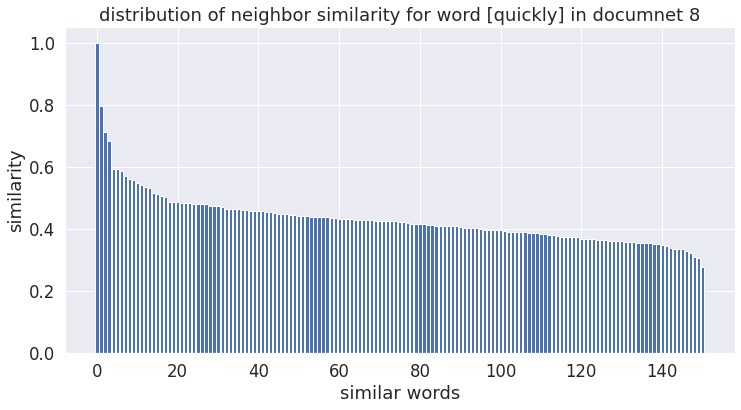

59   -->  severed
1690
[1.0, 0.7426089, 0.71346736, 0.7001362, 0.6082834, 0.577484, 0.5695125, 0.5231005, 0.5225397, 0.5141349, 0.50664395, 0.5037899, 0.5029761, 0.5010953, 0.50036156, 0.49873286, 0.49765444, 0.4954924, 0.4931668, 0.48845476, 0.47979856, 0.47858715, 0.47626483, 0.47373968, 0.4734538, 0.47161, 0.4714588, 0.46537018, 0.464513, 0.4644633, 0.46222574, 0.46130338, 0.4577253, 0.45188096, 0.4509291, 0.44777328, 0.44706827, 0.44599658, 0.44436926, 0.44029623, 0.43968636, 0.43142965, 0.43124554, 0.43107265, 0.42784268, 0.4249397, 0.42488313, 0.42387432, 0.42297196, 0.42182434, 0.42154336, 0.4214495, 0.4205493, 0.42021656, 0.41700494, 0.4164908, 0.41538674, 0.41496205, 0.41468945, 0.41126168, 0.41087323, 0.41085136, 0.41046548, 0.41026583, 0.40787047, 0.4073568, 0.40724862, 0.40591085, 0.40555084, 0.40229964, 0.40021765, 0.39882642, 0.39805245, 0.39764288, 0.39725113, 0.3969366, 0.3959207, 0.39488164, 0.3942696, 0.39157695, 0.38831282, 0.38592863, 0.38197732, 0.38125703, 0.38076

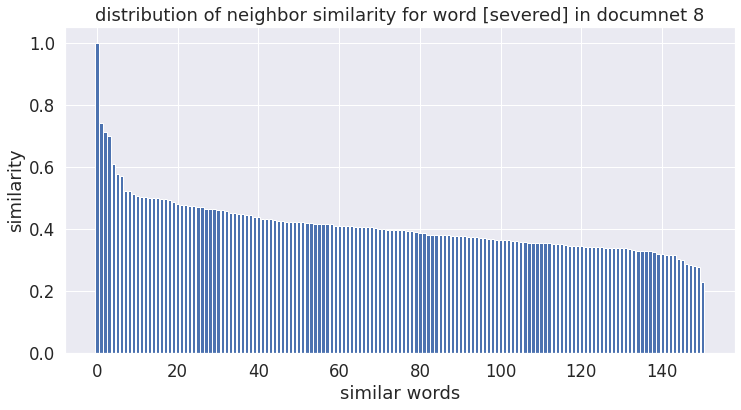

61   -->  relationship
1690
[0.9999999, 0.7426089, 0.741511, 0.5605464, 0.52723247, 0.5072459, 0.5058011, 0.48489308, 0.4809815, 0.47763118, 0.477153, 0.4721014, 0.46735895, 0.4643054, 0.4640401, 0.46302155, 0.4587787, 0.45753407, 0.4569313, 0.45567676, 0.4537928, 0.45129085, 0.44629258, 0.44220763, 0.43967372, 0.43464622, 0.43202853, 0.42804465, 0.42639616, 0.42612463, 0.42288056, 0.42057577, 0.41764408, 0.41744977, 0.41631272, 0.4159552, 0.415061, 0.4139241, 0.41371173, 0.41264623, 0.41196215, 0.41177326, 0.41080016, 0.40550876, 0.4038255, 0.40265316, 0.39877647, 0.39563417, 0.39217842, 0.3916615, 0.38882804, 0.38832906, 0.3878037, 0.3868292, 0.38594636, 0.3850913, 0.38315088, 0.38116536, 0.3780024, 0.37767562, 0.3775807, 0.3763922, 0.3755114, 0.37316546, 0.37267062, 0.37209052, 0.3706758, 0.36815733, 0.36444095, 0.36329547, 0.36273026, 0.35979372, 0.35953254, 0.35932088, 0.3586926, 0.35839558, 0.35422283, 0.35381275, 0.3528067, 0.35240355, 0.351991, 0.3513422, 0.35018325, 0.34800452

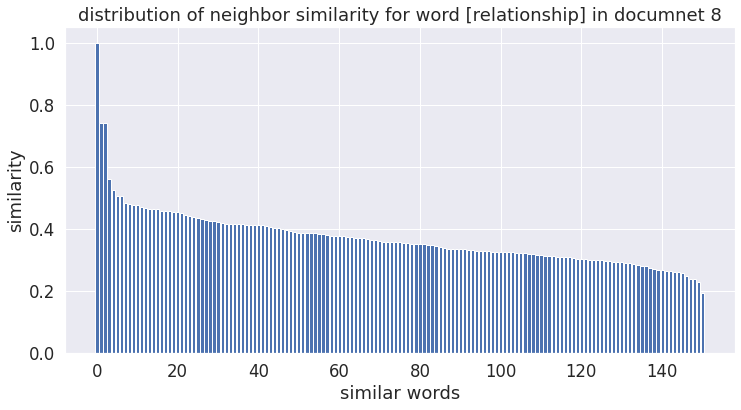

64   -->  ce
1690
[0.91803306, 0.7558975, 0.6918279, 0.6780657, 0.6482929, 0.61918825, 0.60094535, 0.5866079, 0.57761794, 0.5764068, 0.5656961, 0.53554034, 0.5247021, 0.52198684, 0.5159674, 0.49549824, 0.49013108, 0.48507515, 0.47748572, 0.46952808, 0.46892363, 0.46386665, 0.45998192, 0.45923382, 0.45318508, 0.45297524, 0.45006773, 0.4492228, 0.44359115, 0.4401246, 0.4381859, 0.4373143, 0.4368505, 0.43198535, 0.43018118, 0.42832324, 0.42700577, 0.42417708, 0.4235435, 0.414316, 0.4139803, 0.4080254, 0.40638283, 0.40040642, 0.39751598, 0.39748344, 0.39540917, 0.39501566, 0.3936749, 0.39094856, 0.38896662, 0.38867593, 0.3865625, 0.3855824, 0.3848644, 0.38476038, 0.3831232, 0.38201696, 0.38119295, 0.3800948, 0.37413472, 0.37181342, 0.3666855, 0.3651685, 0.36398268, 0.36192504, 0.3616116, 0.3606894, 0.35932142, 0.3561198, 0.35577706, 0.35373545, 0.35360733, 0.35356253, 0.35305887, 0.3529209, 0.35175943, 0.35044864, 0.3492591, 0.3490225, 0.34243602, 0.34237865, 0.34141797, 0.33658084, 0.3354

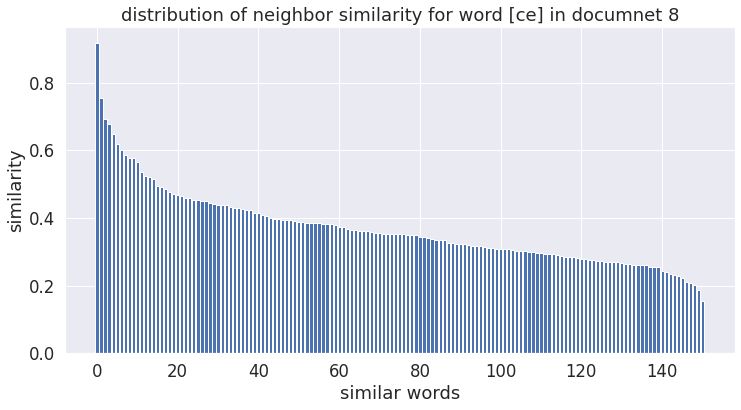

65   -->  ##aus
1690
[0.8286996, 0.7518045, 0.6814331, 0.68129736, 0.65392673, 0.64098763, 0.5743786, 0.5655047, 0.5574487, 0.5547763, 0.5465306, 0.53748953, 0.5282318, 0.52259886, 0.5127156, 0.5048897, 0.48998356, 0.487103, 0.48697415, 0.4858668, 0.4850216, 0.48230928, 0.47655416, 0.45910665, 0.4532525, 0.45229915, 0.45128244, 0.45117265, 0.45050347, 0.43786973, 0.4341156, 0.43282968, 0.42847824, 0.42805767, 0.42759806, 0.4247113, 0.41671842, 0.4145801, 0.41418275, 0.41242373, 0.40858436, 0.39788347, 0.397438, 0.39415234, 0.3938654, 0.39386034, 0.38867506, 0.38772288, 0.38384956, 0.38236532, 0.38234913, 0.38154358, 0.38082653, 0.376571, 0.37039417, 0.36468226, 0.36335525, 0.36154574, 0.3569811, 0.35528082, 0.35397884, 0.35075176, 0.34685034, 0.34453702, 0.34244037, 0.34207988, 0.34158736, 0.34114924, 0.34001997, 0.33696413, 0.33555353, 0.33344778, 0.33310896, 0.33260983, 0.33021736, 0.3298544, 0.32611522, 0.31979913, 0.3185226, 0.3183655, 0.31820482, 0.3175547, 0.31706175, 0.31442773,

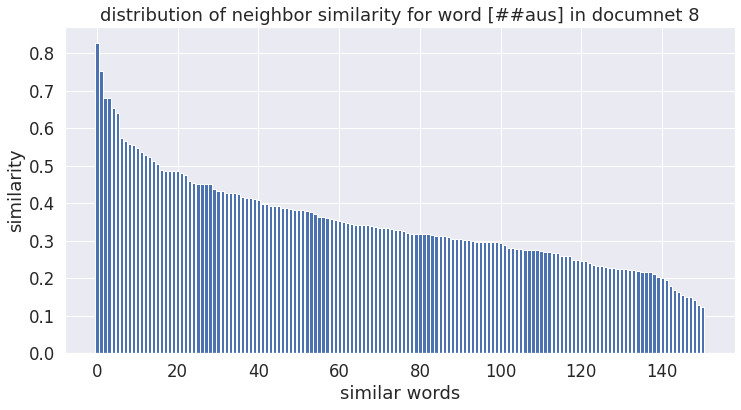

66   -->  ##escu
1690
[0.8229722, 0.7510935, 0.7042058, 0.6818584, 0.6644903, 0.6609762, 0.63469887, 0.6268337, 0.6180634, 0.5908732, 0.5600013, 0.5590205, 0.53107905, 0.52529436, 0.52014005, 0.5173757, 0.5129219, 0.5121423, 0.50254583, 0.49507374, 0.49365145, 0.48355013, 0.47770184, 0.47674087, 0.47385335, 0.47269842, 0.47154284, 0.4715175, 0.47074908, 0.46590137, 0.4597008, 0.45845878, 0.4579631, 0.45191503, 0.4515146, 0.45149833, 0.44700104, 0.44172245, 0.44053155, 0.4394823, 0.43888, 0.43759978, 0.43687612, 0.43049031, 0.42577475, 0.42570853, 0.42550838, 0.42352432, 0.42212647, 0.42165884, 0.42000723, 0.41232222, 0.4106692, 0.40720928, 0.40351674, 0.4025261, 0.40010756, 0.3985109, 0.39541638, 0.3948216, 0.39479333, 0.39316285, 0.3930955, 0.3924439, 0.3923888, 0.39232886, 0.39037657, 0.38786232, 0.3867405, 0.3826906, 0.38019615, 0.37986088, 0.37900877, 0.37837037, 0.37638047, 0.37599152, 0.3758017, 0.37487692, 0.37474585, 0.3738971, 0.36708504, 0.36509964, 0.36421633, 0.36378458, 0.

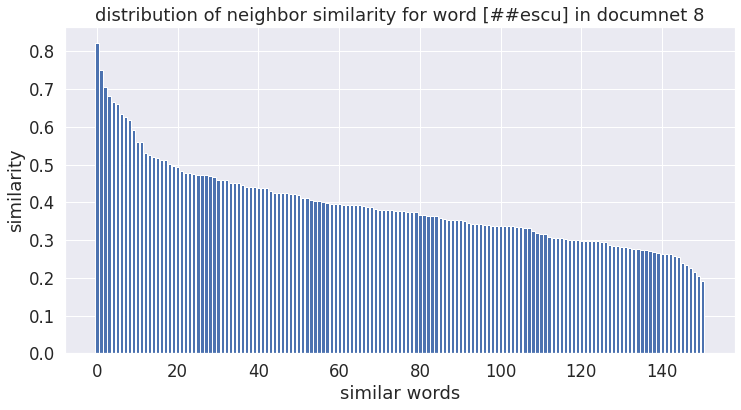

67   -->  dictatorship
1690
[0.7126539, 0.69335943, 0.65439945, 0.6460967, 0.6382623, 0.63139725, 0.62808853, 0.60609365, 0.59257376, 0.5871917, 0.58612096, 0.58507156, 0.5727136, 0.5706011, 0.56487846, 0.5647128, 0.56468403, 0.56408024, 0.5563735, 0.5494258, 0.54904723, 0.54791725, 0.54748726, 0.5407191, 0.53847206, 0.53639716, 0.5353422, 0.5342821, 0.5292733, 0.52869856, 0.5268408, 0.52625394, 0.5260736, 0.52505755, 0.52042496, 0.51984787, 0.51468873, 0.5087559, 0.50508296, 0.4986808, 0.4970819, 0.49638122, 0.4962943, 0.49550372, 0.49524313, 0.49382055, 0.49325153, 0.492279, 0.49103492, 0.48609042, 0.4830778, 0.47468215, 0.4745002, 0.47333902, 0.47045386, 0.46924457, 0.46549398, 0.46446788, 0.46429163, 0.46417555, 0.46248585, 0.46245766, 0.460001, 0.45938253, 0.45743614, 0.45690584, 0.4554291, 0.447673, 0.44594347, 0.4454704, 0.4354097, 0.43241882, 0.43103433, 0.42691422, 0.4262104, 0.42567682, 0.4233219, 0.4209721, 0.41991997, 0.41836435, 0.41791636, 0.41497403, 0.41220847, 0.410534

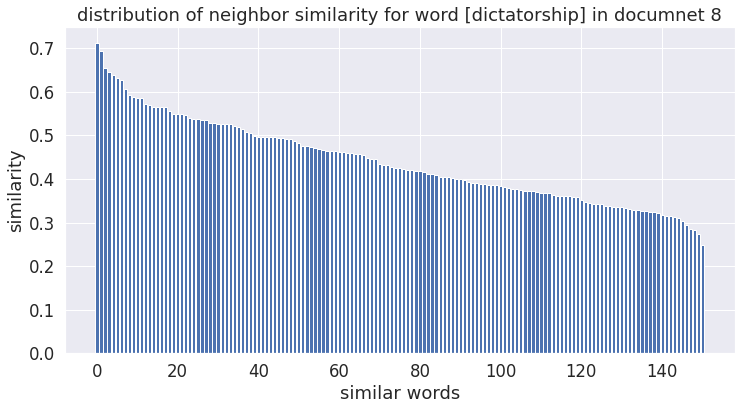

70   -->  popular
1690
[1.0000004, 0.8950763, 0.75340986, 0.71982956, 0.6634752, 0.6463672, 0.6409105, 0.63708436, 0.6348419, 0.6301514, 0.59354556, 0.5932513, 0.5930251, 0.5892728, 0.58079565, 0.57937545, 0.56986034, 0.5668682, 0.5550869, 0.5454352, 0.5452401, 0.5440196, 0.5426316, 0.54112417, 0.5393057, 0.53193676, 0.52711105, 0.5242528, 0.5236963, 0.52241844, 0.51851535, 0.5168022, 0.51571333, 0.5111444, 0.50476044, 0.50430393, 0.5031203, 0.49881154, 0.49865568, 0.497398, 0.49721837, 0.4956481, 0.4956001, 0.49144745, 0.49033135, 0.4879183, 0.483855, 0.47406137, 0.4738326, 0.4724548, 0.47094688, 0.46622708, 0.46531805, 0.46287602, 0.46232247, 0.46081144, 0.45780534, 0.45528138, 0.45237845, 0.45085937, 0.44890624, 0.4468921, 0.44289392, 0.44243804, 0.44220638, 0.43683037, 0.43665302, 0.4364317, 0.43603256, 0.42952427, 0.42894113, 0.42797175, 0.427618, 0.42591357, 0.42573428, 0.42019805, 0.41953245, 0.41404375, 0.4125282, 0.41089112, 0.41086534, 0.41048878, 0.4101953, 0.40958425, 0.404

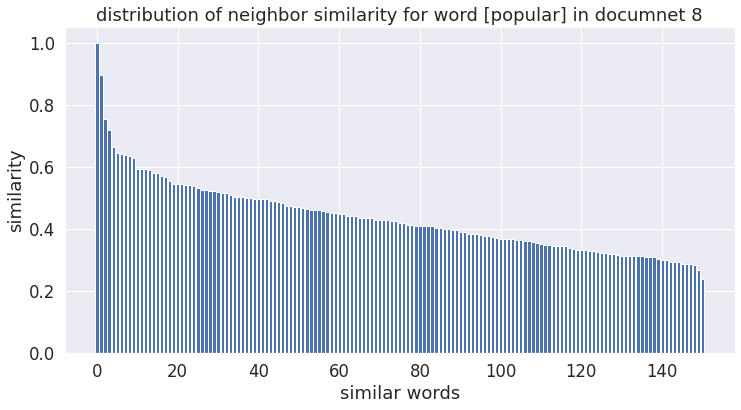

71   -->  uprising
1690
[0.9999998, 0.8950763, 0.7618195, 0.7530358, 0.6911451, 0.6577498, 0.6573868, 0.6183292, 0.610517, 0.5827628, 0.5672862, 0.56316966, 0.5595228, 0.55678463, 0.5567603, 0.5551559, 0.55328006, 0.5485426, 0.53951764, 0.53643817, 0.526211, 0.52372026, 0.52334154, 0.5214709, 0.5208318, 0.5186907, 0.51673526, 0.5166321, 0.51499915, 0.5113745, 0.51020527, 0.5094029, 0.50691783, 0.5059573, 0.50586164, 0.50485265, 0.50330937, 0.499983, 0.49230772, 0.49118853, 0.48742753, 0.48616976, 0.48317546, 0.48085153, 0.4790831, 0.47849107, 0.47660214, 0.47266212, 0.47100705, 0.46989417, 0.4685837, 0.46835935, 0.46822637, 0.46802947, 0.46529037, 0.46440196, 0.4632631, 0.4507108, 0.44989812, 0.44923863, 0.44857454, 0.4483741, 0.4482453, 0.44804496, 0.44669887, 0.44407022, 0.44374663, 0.43729132, 0.43707877, 0.43503428, 0.43407756, 0.43359977, 0.4312159, 0.43077713, 0.4233209, 0.42290574, 0.42273644, 0.42146587, 0.4206855, 0.42021656, 0.4158061, 0.41533, 0.4138555, 0.413596, 0.41074008

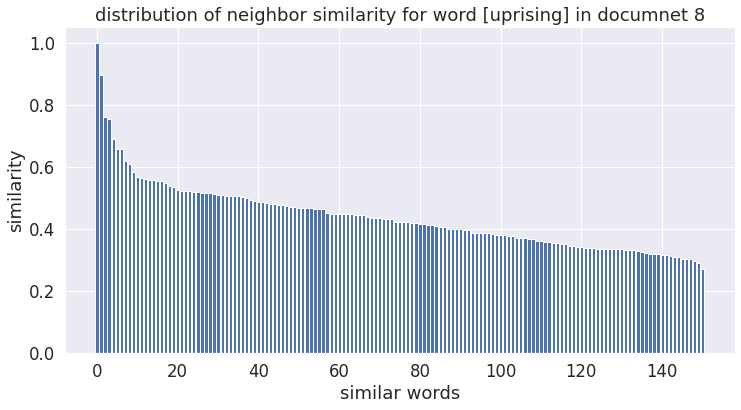

72   -->  swept
1690
[0.9999998, 0.78879714, 0.7618195, 0.75551075, 0.7387603, 0.71982956, 0.6548113, 0.64166677, 0.5922605, 0.5730847, 0.56815803, 0.5676093, 0.557991, 0.55279243, 0.5370551, 0.5288728, 0.52623355, 0.5225397, 0.5221862, 0.52125126, 0.51945215, 0.5161504, 0.5082464, 0.5023419, 0.50176394, 0.50165683, 0.49997067, 0.4999559, 0.47997582, 0.47909218, 0.47289413, 0.47176284, 0.4714325, 0.46979654, 0.46520045, 0.465078, 0.46379724, 0.46187133, 0.46109277, 0.46069264, 0.4601106, 0.45959193, 0.4563719, 0.4562934, 0.45369768, 0.4489885, 0.44827867, 0.44568193, 0.4441663, 0.44245106, 0.4415751, 0.43927377, 0.43734455, 0.43718112, 0.43614137, 0.43263733, 0.43010446, 0.42963272, 0.429294, 0.42828697, 0.42734015, 0.42566907, 0.4237306, 0.42366534, 0.4229044, 0.42179045, 0.4197935, 0.41953653, 0.41789585, 0.41647372, 0.4118095, 0.41149077, 0.40973395, 0.40953237, 0.40809333, 0.40736783, 0.4055804, 0.40535694, 0.4047178, 0.4037862, 0.4030338, 0.40168026, 0.40153736, 0.40074065, 0.4005

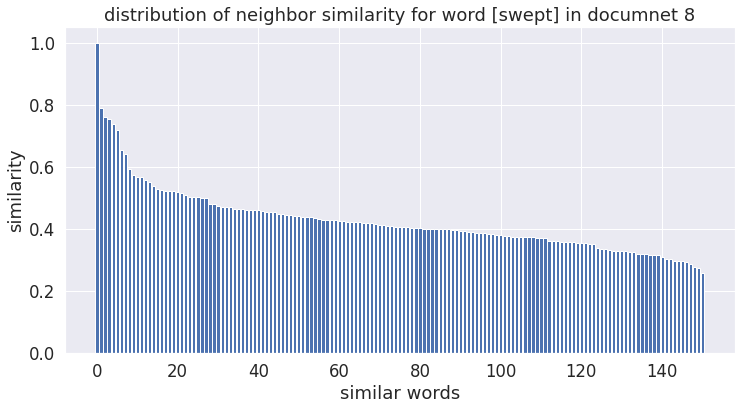

76   -->  power
1690
[0.99999976, 0.8342581, 0.79747325, 0.75551075, 0.75340986, 0.7530358, 0.687647, 0.6656979, 0.64314115, 0.6220435, 0.6162081, 0.6127308, 0.6118727, 0.6073533, 0.59403133, 0.5865592, 0.5809523, 0.5759367, 0.5738939, 0.55998677, 0.5596758, 0.5494757, 0.5485784, 0.54655266, 0.5415913, 0.53914255, 0.53899056, 0.53106475, 0.5287852, 0.5287044, 0.5205509, 0.5198058, 0.5193506, 0.5190512, 0.5190305, 0.51747954, 0.51715326, 0.51476777, 0.50740516, 0.50627697, 0.5056883, 0.505578, 0.5020113, 0.49765444, 0.49682236, 0.49628288, 0.49434036, 0.49300325, 0.49263352, 0.4912933, 0.49107352, 0.48897976, 0.48795423, 0.4843951, 0.48377493, 0.48024255, 0.47917157, 0.47871196, 0.47735745, 0.47618508, 0.47545266, 0.47498655, 0.47398308, 0.46991366, 0.4690174, 0.46722567, 0.4589541, 0.4578422, 0.45374715, 0.45344383, 0.45329475, 0.45040506, 0.44916785, 0.44660628, 0.44498467, 0.4401396, 0.43758944, 0.4354611, 0.43327403, 0.43116993, 0.42918402, 0.42303765, 0.42040908, 0.41944122, 0.4174

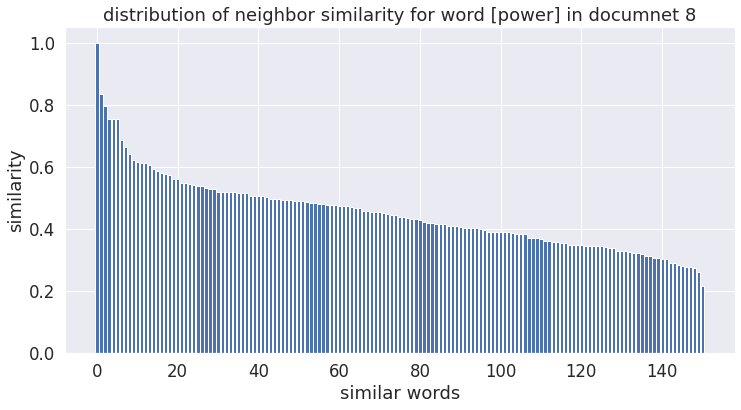

78   -->  went
1690
[1.0, 0.65217364, 0.6424444, 0.5926714, 0.5893775, 0.58891034, 0.5724696, 0.5606581, 0.5579194, 0.5563234, 0.5249711, 0.51911676, 0.49807388, 0.4841824, 0.48262554, 0.4786458, 0.47442257, 0.47429943, 0.471685, 0.47058252, 0.47052655, 0.47003627, 0.46899375, 0.46364242, 0.45582697, 0.4523174, 0.44673795, 0.44342554, 0.44255182, 0.4381677, 0.43557686, 0.43355212, 0.433219, 0.43198383, 0.4314182, 0.43107164, 0.42828697, 0.42765498, 0.42461613, 0.42040908, 0.41871262, 0.41749793, 0.41594085, 0.41048878, 0.41003138, 0.40575838, 0.4043644, 0.4028396, 0.40257233, 0.4022852, 0.40175205, 0.40137112, 0.401043, 0.4006166, 0.3991075, 0.39883652, 0.39664268, 0.39644915, 0.39544925, 0.3940782, 0.39384237, 0.39379793, 0.3937656, 0.39330754, 0.3919592, 0.39116663, 0.38848913, 0.3831547, 0.3772787, 0.3764209, 0.37553445, 0.37547952, 0.37307954, 0.37252483, 0.37205777, 0.37069595, 0.3694436, 0.3666005, 0.36581856, 0.3628642, 0.36080116, 0.3583492, 0.35603824, 0.3555281, 0.351628, 0.3

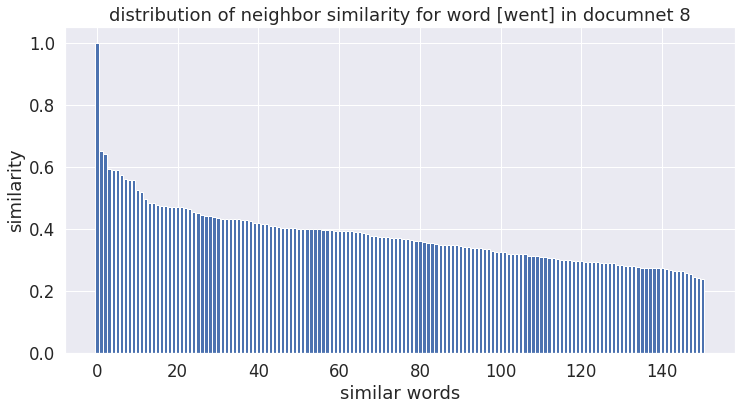

81   -->  national
1690
[1.0, 0.5823563, 0.58123404, 0.56986034, 0.5681689, 0.562679, 0.553529, 0.5488128, 0.54784465, 0.54640615, 0.52690244, 0.52481014, 0.52445763, 0.5187576, 0.513751, 0.5089878, 0.50691783, 0.5031592, 0.5018192, 0.49814016, 0.49759844, 0.4936705, 0.49255875, 0.49199617, 0.48887947, 0.485438, 0.47917157, 0.4737671, 0.47290772, 0.47269487, 0.47178042, 0.46725237, 0.46269962, 0.4622444, 0.46157843, 0.4565643, 0.4563384, 0.45582697, 0.45532298, 0.4549268, 0.44846794, 0.44605547, 0.4443159, 0.4417262, 0.4414742, 0.43729508, 0.43120533, 0.43094215, 0.42927605, 0.42314672, 0.42098695, 0.42045447, 0.41639593, 0.4144706, 0.41220236, 0.41213983, 0.40901226, 0.40809333, 0.40714055, 0.39732626, 0.39083183, 0.38999292, 0.38905698, 0.3873691, 0.3867231, 0.3791545, 0.37721333, 0.37677902, 0.37624198, 0.37521857, 0.3691116, 0.3680016, 0.36790746, 0.36622092, 0.36427063, 0.3638008, 0.3627059, 0.35754922, 0.3561272, 0.35414702, 0.35090804, 0.35024184, 0.34852165, 0.34770268, 0.34174

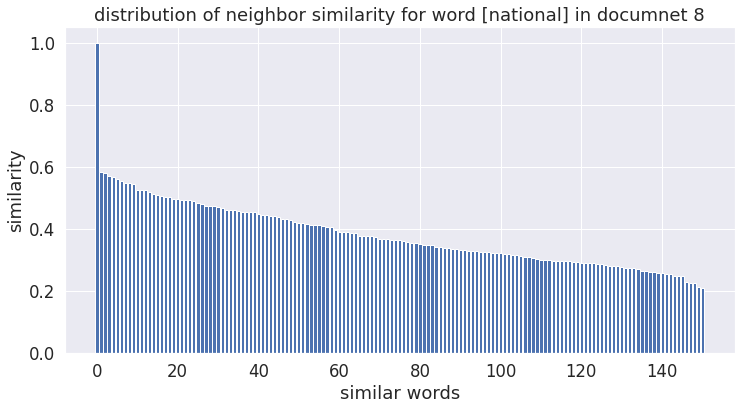

82   -->  television
1690
[0.6635287, 0.63685036, 0.6153087, 0.5971259, 0.58126354, 0.5781443, 0.5770947, 0.57236767, 0.5522562, 0.53456306, 0.52799016, 0.51487386, 0.49844363, 0.498372, 0.4960426, 0.48088428, 0.48065174, 0.48061216, 0.47982308, 0.47223046, 0.4697912, 0.4652613, 0.4618976, 0.46078336, 0.46034694, 0.45865357, 0.4475029, 0.44696188, 0.4441038, 0.44349134, 0.4407254, 0.4396279, 0.43877214, 0.43649113, 0.4358684, 0.43550766, 0.43373892, 0.43267363, 0.43239486, 0.4170857, 0.41369313, 0.41367078, 0.4102317, 0.40966988, 0.40724146, 0.40610927, 0.40226513, 0.39938888, 0.3982829, 0.3970871, 0.38856763, 0.38783938, 0.38623995, 0.38261947, 0.38207823, 0.3819239, 0.38061637, 0.37856537, 0.3779886, 0.3776586, 0.37730128, 0.3728065, 0.36979413, 0.36752245, 0.36609417, 0.3652681, 0.3633024, 0.36238185, 0.36186692, 0.359357, 0.35891092, 0.35645872, 0.35549477, 0.35194153, 0.3469326, 0.3463058, 0.3454595, 0.34293532, 0.34059268, 0.34012467, 0.3400147, 0.3395609, 0.3387546, 0.3375622, 0

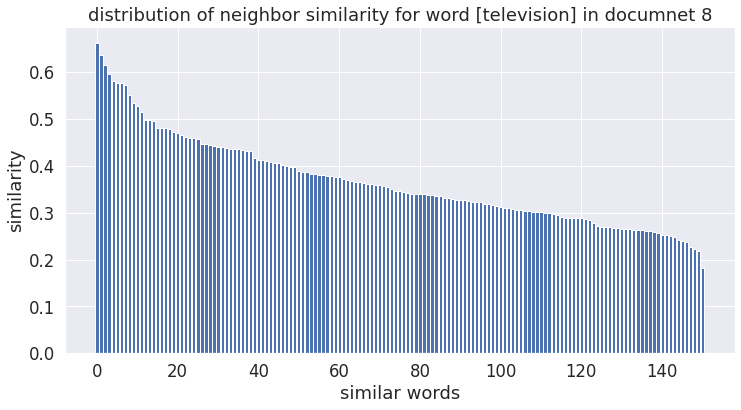

84   -->  announce
1690
[1.0, 0.7043811, 0.7027166, 0.6876942, 0.6650777, 0.63972235, 0.63664734, 0.6324496, 0.61515236, 0.6010015, 0.60009587, 0.58891034, 0.5857413, 0.5771607, 0.5675786, 0.56585705, 0.5638852, 0.56290114, 0.560476, 0.5601356, 0.5516812, 0.5498897, 0.54189414, 0.5292027, 0.52457666, 0.5235555, 0.52222157, 0.5216183, 0.51828516, 0.51264834, 0.5123606, 0.5118832, 0.5101589, 0.50848496, 0.5068518, 0.5054969, 0.5043154, 0.5031592, 0.50176394, 0.49642128, 0.4906697, 0.4870035, 0.483855, 0.47969875, 0.47746024, 0.47735745, 0.47616047, 0.47514606, 0.46989417, 0.46984553, 0.46481675, 0.4625764, 0.4618902, 0.4572493, 0.45661524, 0.45519584, 0.45452958, 0.45445406, 0.45130515, 0.44533724, 0.44081837, 0.44065252, 0.4387104, 0.4366625, 0.4366052, 0.43485153, 0.4243886, 0.4236549, 0.42246258, 0.4221188, 0.42080742, 0.41974914, 0.41567695, 0.41144392, 0.41070125, 0.40968758, 0.40873462, 0.4081155, 0.4025665, 0.3977211, 0.3969366, 0.38656455, 0.3825379, 0.37963387, 0.37870777, 0.377

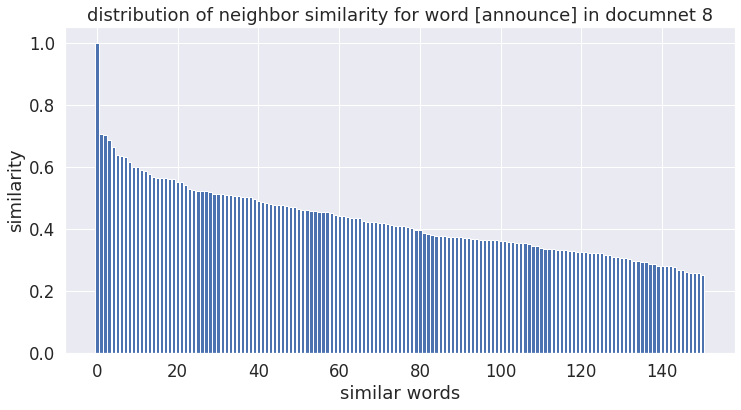

86   -->  special
1690
[1.0000001, 0.75312406, 0.70490694, 0.6776037, 0.6650777, 0.6278233, 0.6140695, 0.60935163, 0.5973191, 0.5941375, 0.5932513, 0.59206414, 0.59053427, 0.5823563, 0.5747651, 0.56883514, 0.5682163, 0.5635401, 0.5563493, 0.5549917, 0.55283046, 0.55154896, 0.5408673, 0.5392026, 0.53603417, 0.5329504, 0.53244096, 0.52420807, 0.5198058, 0.51673526, 0.5158465, 0.50767076, 0.5076479, 0.50682425, 0.5052401, 0.50510705, 0.5032105, 0.49997067, 0.497299, 0.48651457, 0.48478222, 0.48350188, 0.48262554, 0.4824677, 0.47936147, 0.47452593, 0.47180444, 0.46453533, 0.46206605, 0.46203265, 0.46174377, 0.46163017, 0.46136308, 0.45972526, 0.4592784, 0.45463195, 0.4530686, 0.44765237, 0.44703382, 0.44685405, 0.44089532, 0.4387021, 0.43765098, 0.43403363, 0.43340224, 0.4312899, 0.4304319, 0.42800075, 0.4259276, 0.4220276, 0.42177993, 0.42128527, 0.418575, 0.41781145, 0.41760677, 0.41737872, 0.4152694, 0.41449764, 0.41316873, 0.41303086, 0.4125306, 0.41212025, 0.40856367, 0.4083932, 0.407

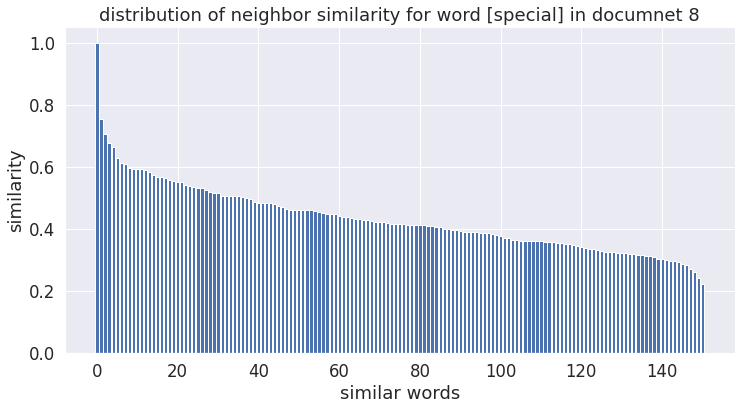

87   -->  congress
1690
[1.0000002, 0.75312406, 0.7043811, 0.6341997, 0.6231751, 0.61140317, 0.60070324, 0.5929781, 0.59126216, 0.5895231, 0.5827062, 0.57803, 0.57628053, 0.57579064, 0.56945825, 0.5587487, 0.55644, 0.55379605, 0.54814684, 0.5354221, 0.5347128, 0.53232425, 0.52616465, 0.5260898, 0.52372026, 0.52271265, 0.52060056, 0.5187576, 0.5168022, 0.5153949, 0.5114714, 0.51013696, 0.50689197, 0.49610567, 0.49536818, 0.48897976, 0.48746026, 0.48524612, 0.48082387, 0.4805966, 0.47863048, 0.47003627, 0.46809116, 0.46233863, 0.4592731, 0.45656714, 0.4554589, 0.4526384, 0.4504204, 0.44581732, 0.44581237, 0.44568193, 0.44486815, 0.44466388, 0.4437414, 0.443734, 0.44285613, 0.44238216, 0.44131446, 0.43990603, 0.43958429, 0.43724614, 0.43179932, 0.431265, 0.42836314, 0.4265866, 0.4258369, 0.4251359, 0.4250666, 0.4177349, 0.41766146, 0.40933818, 0.4091713, 0.4078884, 0.40782815, 0.40504032, 0.40464392, 0.40404713, 0.40356058, 0.40311176, 0.39961496, 0.3948614, 0.3942895, 0.39382297, 0.39374

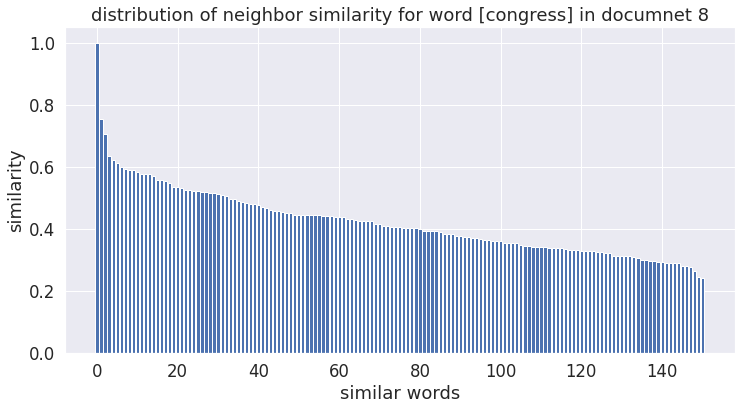

90   -->  message
1690
[1.0, 0.7730794, 0.7430653, 0.6694772, 0.6540322, 0.63664734, 0.62046075, 0.5724696, 0.5624568, 0.52060056, 0.5093516, 0.4978151, 0.49759844, 0.49560386, 0.49144474, 0.4867052, 0.48651457, 0.48533162, 0.4811731, 0.47449088, 0.46835235, 0.4670411, 0.46691075, 0.4609786, 0.4596389, 0.453171, 0.4480714, 0.446958, 0.445536, 0.4327674, 0.43143886, 0.43107188, 0.4307243, 0.42469302, 0.42273644, 0.41888666, 0.41300267, 0.40977338, 0.40960887, 0.40771335, 0.4075753, 0.40573013, 0.40257126, 0.40153736, 0.40132266, 0.4010275, 0.39839756, 0.3980137, 0.39725113, 0.3969642, 0.39446005, 0.39292735, 0.3916459, 0.3910479, 0.38942134, 0.38829678, 0.38825276, 0.38768956, 0.38694733, 0.3868839, 0.38668984, 0.38549113, 0.38536042, 0.3850888, 0.38454717, 0.38354403, 0.38246313, 0.38115537, 0.38081783, 0.37995145, 0.37907135, 0.3787833, 0.37709814, 0.37378973, 0.3733251, 0.37150446, 0.36853942, 0.36753255, 0.36458904, 0.36344945, 0.36300725, 0.36290556, 0.36277285, 0.36179635, 0.35787

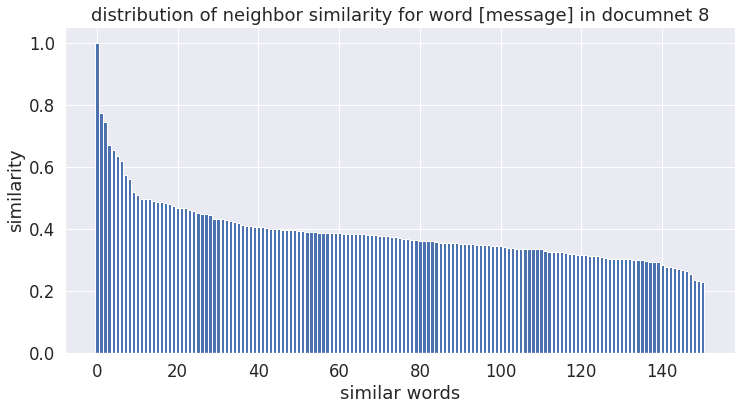

92   -->  repeated
1690
[1.0000002, 0.83155036, 0.8123941, 0.7730794, 0.6976492, 0.60009587, 0.5579194, 0.5261655, 0.50088155, 0.4833446, 0.46912122, 0.46844506, 0.46206605, 0.45882946, 0.4545411, 0.45326072, 0.44846794, 0.4437414, 0.41990292, 0.4191997, 0.41919136, 0.41888878, 0.4187373, 0.41792083, 0.41547623, 0.4091108, 0.40860954, 0.4082995, 0.39792538, 0.39642525, 0.39630842, 0.38865238, 0.3876472, 0.3863955, 0.38573235, 0.38418007, 0.38323027, 0.38320264, 0.3814718, 0.37884682, 0.3753273, 0.37481457, 0.36956215, 0.36933276, 0.36830366, 0.36731297, 0.36429024, 0.36243883, 0.36225468, 0.3615681, 0.3586455, 0.35712653, 0.3571056, 0.35656056, 0.3560595, 0.35358867, 0.3489467, 0.34613585, 0.34601247, 0.34547743, 0.34428132, 0.3441624, 0.34415942, 0.3434955, 0.34315056, 0.34256244, 0.34187424, 0.34176743, 0.34073234, 0.33939767, 0.3383831, 0.33811235, 0.3355918, 0.33414996, 0.33305526, 0.33033028, 0.33022833, 0.33002186, 0.32933947, 0.32766467, 0.32710198, 0.32706624, 0.32703966, 0.326

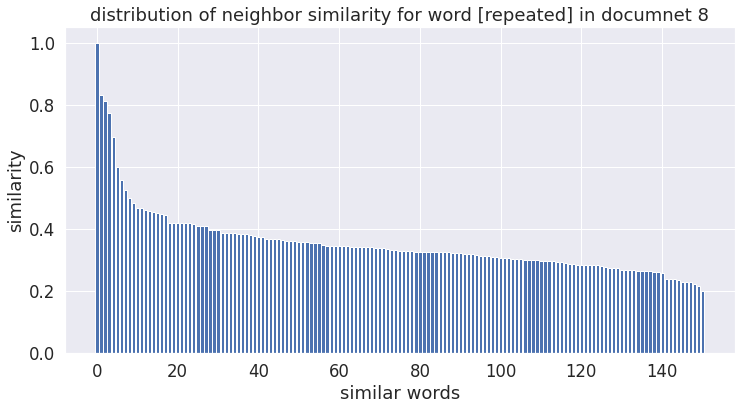

93   -->  today
1690
[0.99999994, 0.83155036, 0.72313213, 0.6540322, 0.5921333, 0.5123606, 0.5044405, 0.4841824, 0.47178042, 0.46562088, 0.45055026, 0.43914008, 0.43403363, 0.4339102, 0.43152544, 0.42740136, 0.4188685, 0.4177349, 0.4166919, 0.39514902, 0.39153913, 0.39081237, 0.39059955, 0.38715762, 0.38474873, 0.38323575, 0.38226676, 0.37803745, 0.37687874, 0.37659046, 0.37386635, 0.37375367, 0.37251174, 0.37208337, 0.3678295, 0.36734164, 0.36708224, 0.36259663, 0.3576786, 0.357052, 0.35696787, 0.35673875, 0.35656428, 0.35491154, 0.3540249, 0.35349286, 0.35230917, 0.35227072, 0.35170433, 0.3512172, 0.34960687, 0.34817907, 0.34804025, 0.34745383, 0.34422472, 0.34352326, 0.34254283, 0.33968848, 0.3388815, 0.33818084, 0.336222, 0.3344397, 0.3332642, 0.3331898, 0.33274075, 0.3314159, 0.32796264, 0.32743058, 0.32630247, 0.3225753, 0.32203856, 0.321918, 0.32182837, 0.32134068, 0.3213106, 0.31952858, 0.31745815, 0.3167655, 0.31561327, 0.31559917, 0.3155862, 0.31547606, 0.31462064, 0.31446725

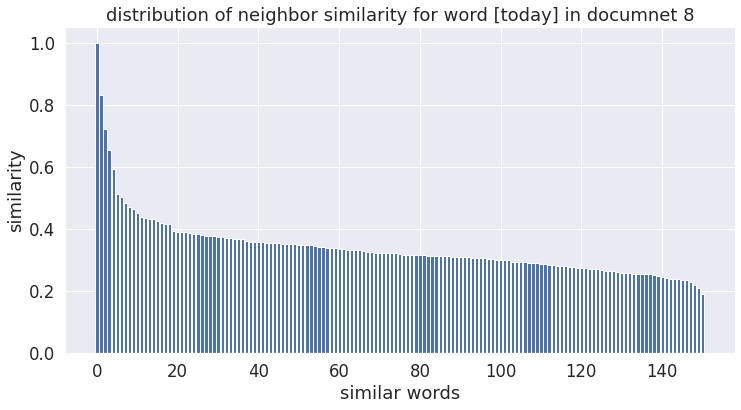

96   -->  rum
1690
[0.99999976, 0.7376166, 0.5431254, 0.54038507, 0.5359681, 0.513751, 0.5113782, 0.49411523, 0.48798776, 0.48345888, 0.48100877, 0.47936147, 0.4761068, 0.4749552, 0.47441423, 0.47274488, 0.46675453, 0.4366052, 0.43546364, 0.43371898, 0.42573428, 0.4219644, 0.41955346, 0.4107365, 0.40724355, 0.40702796, 0.4051304, 0.40504032, 0.3995583, 0.39631644, 0.39328817, 0.39277834, 0.38794124, 0.38174564, 0.38084772, 0.3792749, 0.37821862, 0.37782553, 0.3757428, 0.3752172, 0.37334526, 0.37206483, 0.372056, 0.36666176, 0.35767433, 0.35405838, 0.34829503, 0.34675172, 0.34658623, 0.3463117, 0.34152058, 0.3409628, 0.34039283, 0.33846527, 0.3367759, 0.3357386, 0.33333677, 0.33222708, 0.33146578, 0.32920223, 0.3265181, 0.32597244, 0.32430112, 0.32278883, 0.32057187, 0.3185702, 0.31825513, 0.31717703, 0.31602424, 0.31578648, 0.3151231, 0.31050262, 0.30722016, 0.30706015, 0.30665544, 0.30656937, 0.30586845, 0.30520082, 0.30494744, 0.30139717, 0.30126852, 0.2972694, 0.29252806, 0.28793353

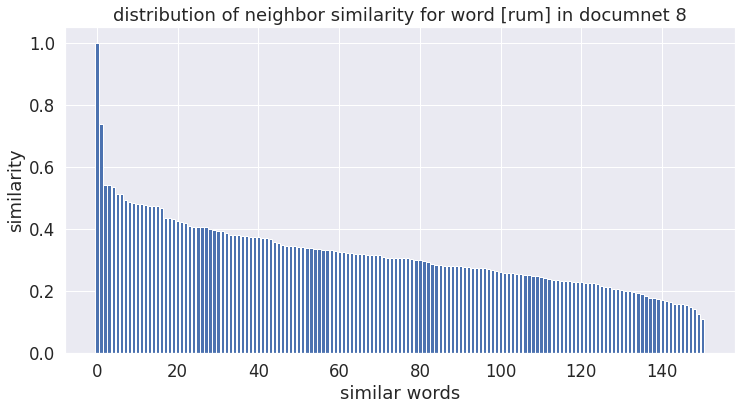

97   -->  ##anian
1690
[1.0, 0.7376166, 0.54640615, 0.49332204, 0.461984, 0.4546591, 0.45427024, 0.4361691, 0.43446058, 0.42800075, 0.41971204, 0.41911542, 0.4137584, 0.412903, 0.4125282, 0.41144633, 0.40961555, 0.40784895, 0.4063465, 0.40081456, 0.39692134, 0.39511073, 0.3948614, 0.3930894, 0.38927507, 0.38625038, 0.38011366, 0.37393123, 0.3729493, 0.37209916, 0.36998236, 0.36772496, 0.36557177, 0.36523408, 0.36470354, 0.36289638, 0.3602295, 0.3535223, 0.35076788, 0.34993613, 0.3488146, 0.34866887, 0.34720927, 0.34627983, 0.34620914, 0.34444928, 0.34228647, 0.34063578, 0.34048843, 0.33961886, 0.3391491, 0.3384289, 0.33830172, 0.3365633, 0.3308398, 0.32982057, 0.32812554, 0.32717645, 0.3249759, 0.3239782, 0.3238257, 0.31979644, 0.3193577, 0.31916273, 0.31707978, 0.3167121, 0.31652224, 0.31503612, 0.31436747, 0.31357247, 0.3094954, 0.30871445, 0.3082837, 0.30814934, 0.30724117, 0.30361068, 0.30356467, 0.3000624, 0.29865524, 0.29635966, 0.2959044, 0.2942741, 0.2936593, 0.29357734, 0.2916

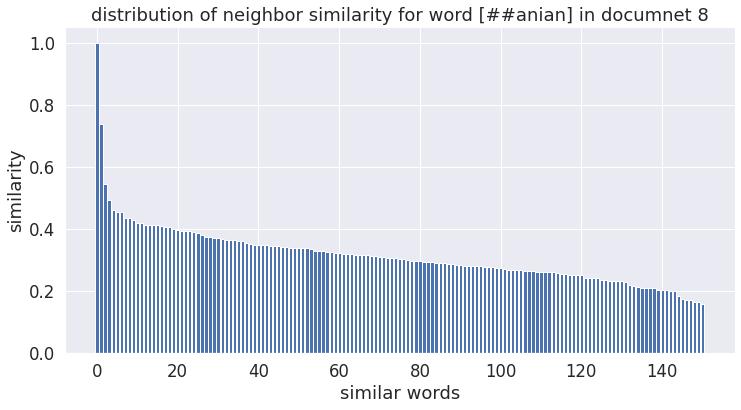

98   -->  newspapers
1690
[0.99999994, 0.6846093, 0.6522603, 0.5602808, 0.552829, 0.5488128, 0.5363801, 0.5280227, 0.52760446, 0.5201192, 0.5132189, 0.51178455, 0.51064706, 0.5043154, 0.4982606, 0.49560386, 0.49358684, 0.48798776, 0.48782828, 0.48761338, 0.4859421, 0.4845413, 0.4805966, 0.47987384, 0.46844506, 0.4679585, 0.46562088, 0.46528038, 0.4632631, 0.4595728, 0.4592784, 0.45727053, 0.4566052, 0.45528138, 0.4546591, 0.44888955, 0.44673795, 0.44656873, 0.44507447, 0.4428623, 0.44184357, 0.44142348, 0.43756694, 0.4357139, 0.43511033, 0.43452573, 0.43086576, 0.4308076, 0.4281376, 0.42458922, 0.4229044, 0.41902572, 0.41601396, 0.41085908, 0.40943646, 0.4092452, 0.4065348, 0.40558153, 0.401123, 0.40091026, 0.3998063, 0.39824957, 0.3980418, 0.3952844, 0.39092678, 0.39054918, 0.39032766, 0.38358313, 0.38268164, 0.38115066, 0.38069522, 0.38058677, 0.38043293, 0.3803862, 0.38020173, 0.37738362, 0.36967176, 0.36626264, 0.35998312, 0.34901017, 0.3484286, 0.3467124, 0.3420384, 0.33977216, 0.

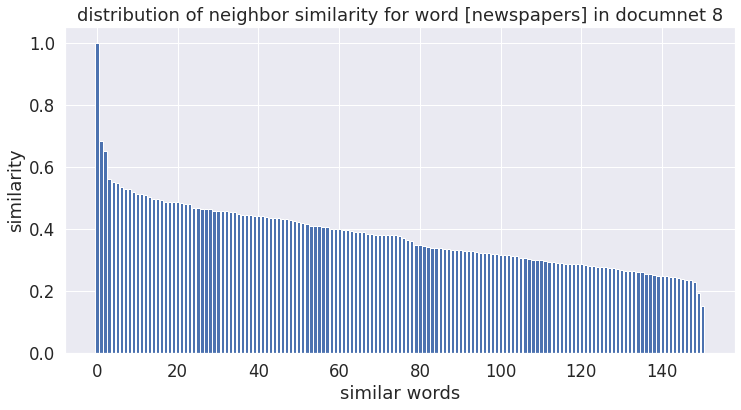

101   -->  like
1690
[0.99999994, 0.57365817, 0.5699539, 0.53143686, 0.5023717, 0.4843303, 0.45727053, 0.4408639, 0.42424458, 0.412813, 0.40424153, 0.39245087, 0.39027762, 0.3795804, 0.3764121, 0.37488073, 0.37409353, 0.3716135, 0.36185288, 0.36115828, 0.35479242, 0.35259992, 0.35165125, 0.35135645, 0.3464659, 0.34502882, 0.3443769, 0.34408593, 0.34048843, 0.33945912, 0.33736083, 0.33610928, 0.33586144, 0.3357386, 0.33279395, 0.33243668, 0.3314159, 0.33067578, 0.32954842, 0.32837647, 0.32730746, 0.32703966, 0.32442653, 0.32423675, 0.32193077, 0.32128757, 0.32125717, 0.32048982, 0.32042366, 0.3171056, 0.31580716, 0.31560963, 0.3149766, 0.31462884, 0.31324703, 0.3119939, 0.31104526, 0.31059396, 0.31049836, 0.30921566, 0.30745077, 0.30658132, 0.30528575, 0.30489534, 0.30437183, 0.30349278, 0.2997257, 0.29952782, 0.2994324, 0.29885197, 0.29572105, 0.29446554, 0.29324767, 0.2913035, 0.2904726, 0.290223, 0.2888736, 0.28833213, 0.28766376, 0.28752112, 0.28428942, 0.28215066, 0.27983305, 0.269

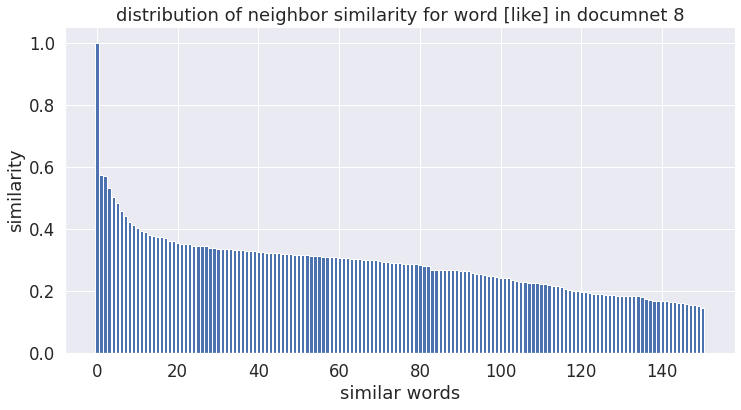

103   -->  television
1690
[1.0, 0.6846093, 0.62555456, 0.62547904, 0.5897727, 0.58123404, 0.5812264, 0.5699539, 0.5335757, 0.5160916, 0.5124705, 0.49810833, 0.49105212, 0.48876178, 0.48277575, 0.48240966, 0.4703952, 0.4670411, 0.46490684, 0.46142104, 0.46091503, 0.46065325, 0.45912528, 0.45738024, 0.4572493, 0.45487502, 0.45437998, 0.44990212, 0.44976318, 0.4491145, 0.44806004, 0.44772503, 0.44747588, 0.4459617, 0.44289392, 0.44158125, 0.44131446, 0.43976533, 0.4373898, 0.43707877, 0.43493122, 0.43470594, 0.43340224, 0.4263056, 0.4262981, 0.42570302, 0.4254964, 0.42461613, 0.42443615, 0.42146534, 0.4213252, 0.41955346, 0.41944122, 0.41934168, 0.41796845, 0.41700023, 0.4168316, 0.4138932, 0.41218984, 0.4091108, 0.4063465, 0.4049608, 0.4045064, 0.4013362, 0.39967743, 0.39514902, 0.3934728, 0.38809398, 0.38375998, 0.38164747, 0.38093114, 0.37522408, 0.37284553, 0.36530155, 0.3557394, 0.35436082, 0.35218048, 0.34949893, 0.34906578, 0.34858108, 0.34780997, 0.34311357, 0.3418396, 0.34137142

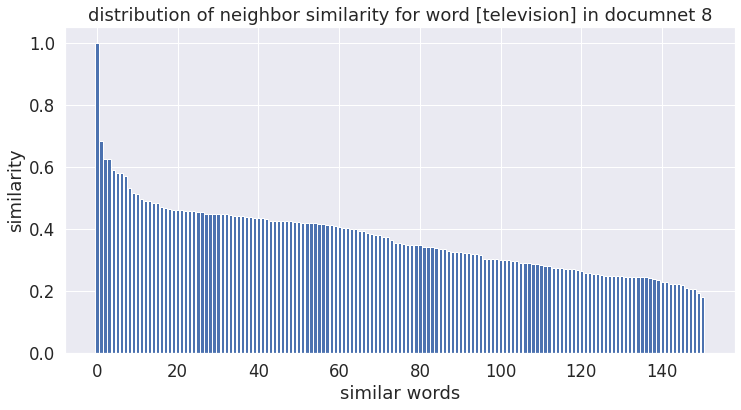

106   -->  controlled
1690
[1.0, 0.7992073, 0.6564704, 0.6266575, 0.62555456, 0.62319475, 0.5845139, 0.5602808, 0.53143686, 0.5054879, 0.504601, 0.50066394, 0.49975637, 0.4906286, 0.485389, 0.48480248, 0.4843951, 0.4819145, 0.47905374, 0.479049, 0.47766078, 0.4774288, 0.47730678, 0.47597784, 0.47092748, 0.46984553, 0.46917382, 0.46501362, 0.46317154, 0.46269962, 0.4562934, 0.45463195, 0.4536873, 0.4516337, 0.45074558, 0.44908255, 0.44387186, 0.44368088, 0.44006172, 0.43959844, 0.43910933, 0.43713665, 0.4364317, 0.43548688, 0.43371898, 0.43095386, 0.42667705, 0.4212991, 0.41971204, 0.41483897, 0.41434544, 0.41167083, 0.41085893, 0.406995, 0.40591085, 0.4058274, 0.4053998, 0.40412867, 0.40114063, 0.40099084, 0.3942895, 0.39379793, 0.3919346, 0.3916918, 0.3883037, 0.3860602, 0.3852608, 0.3850888, 0.38507447, 0.38359594, 0.37697372, 0.37567544, 0.3734138, 0.37149134, 0.36708224, 0.3669068, 0.3638157, 0.3622099, 0.36057836, 0.35656056, 0.35562575, 0.34905723, 0.34417742, 0.33966208, 0.33777

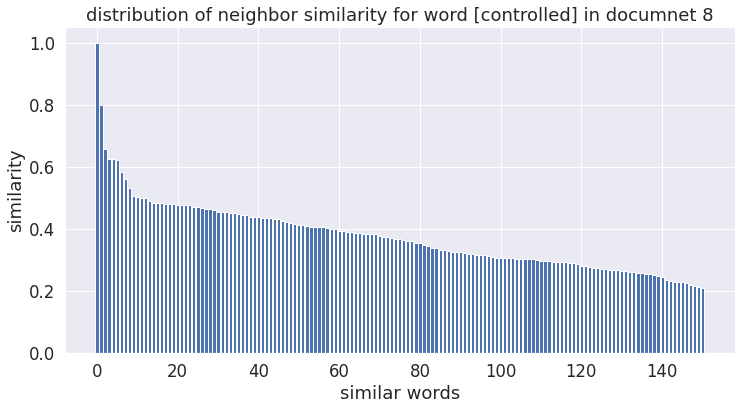

109   -->  country
1690
[0.67218256, 0.6368503, 0.63368726, 0.62736225, 0.62631434, 0.596664, 0.5839205, 0.5834477, 0.56689906, 0.5633629, 0.5522215, 0.54929566, 0.5489923, 0.54229426, 0.54182315, 0.5407181, 0.5404504, 0.5352471, 0.53119266, 0.5301553, 0.5276296, 0.5234391, 0.520926, 0.5181493, 0.50511986, 0.5048119, 0.5041572, 0.50360477, 0.49966276, 0.49938646, 0.49829212, 0.49741203, 0.49602252, 0.4949271, 0.4939757, 0.47950426, 0.478605, 0.47680447, 0.4765708, 0.47401303, 0.4739331, 0.47165686, 0.47106707, 0.46782547, 0.4662798, 0.46382546, 0.4632317, 0.4567179, 0.45542905, 0.45315593, 0.44090605, 0.43440187, 0.4340964, 0.4248713, 0.4227252, 0.41943765, 0.41905928, 0.41827363, 0.4180073, 0.41297346, 0.4055272, 0.401349, 0.40095484, 0.3981289, 0.39761275, 0.3975138, 0.39639008, 0.3913987, 0.39115173, 0.39074162, 0.39038384, 0.3885609, 0.3872186, 0.38701338, 0.3869452, 0.38594264, 0.3849205, 0.3848241, 0.3837361, 0.38363934, 0.38231763, 0.38175482, 0.37944198, 0.37712288, 0.37646747,

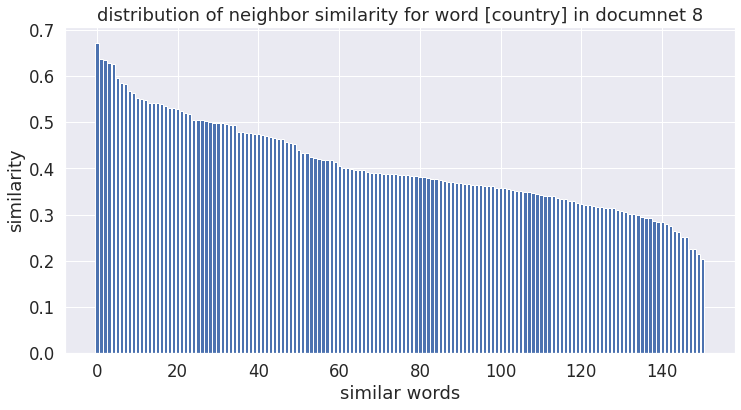

112   -->  new
1690
[0.7501527, 0.721207, 0.6883811, 0.6828743, 0.6492483, 0.631559, 0.6293925, 0.6266981, 0.6240951, 0.62046576, 0.61702573, 0.61188126, 0.5981531, 0.5849763, 0.56506085, 0.5647751, 0.5644734, 0.5630583, 0.55918545, 0.5564902, 0.5537286, 0.5464507, 0.54498005, 0.5435607, 0.53960466, 0.5372411, 0.53674877, 0.5362811, 0.5324656, 0.5305637, 0.5284929, 0.5262463, 0.5251498, 0.52303994, 0.52266103, 0.5222363, 0.5150808, 0.51241213, 0.5122548, 0.51066005, 0.5066819, 0.5065601, 0.505882, 0.5058349, 0.50402606, 0.5036704, 0.5036354, 0.50340056, 0.50109494, 0.4988711, 0.49714148, 0.4900508, 0.4849394, 0.4820863, 0.47611517, 0.47461668, 0.47447622, 0.47156143, 0.46792397, 0.4667972, 0.46678346, 0.46673334, 0.46275285, 0.46096113, 0.4583532, 0.45784009, 0.44948334, 0.44789627, 0.4472909, 0.442954, 0.4426915, 0.44138584, 0.44125953, 0.44012353, 0.43990713, 0.438492, 0.4363935, 0.43602103, 0.43194336, 0.4310102, 0.43021542, 0.4295672, 0.4294641, 0.42945594, 0.4283413, 0.42434675, 0

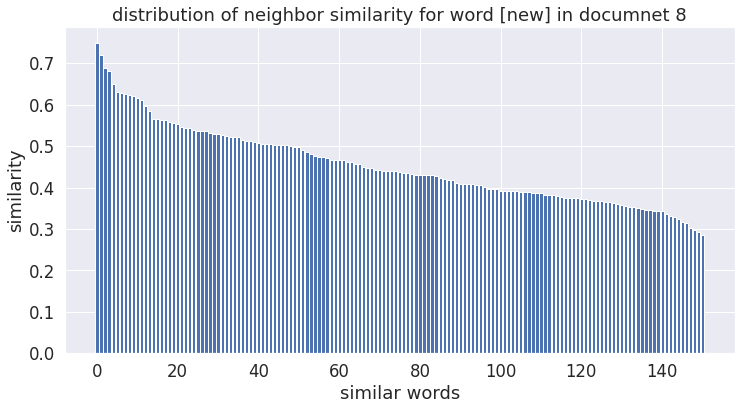

114   -->  non
1690
[1.0000002, 0.7359556, 0.65175295, 0.6470566, 0.6266575, 0.5635401, 0.56276226, 0.55668604, 0.5542322, 0.53656894, 0.53580153, 0.53527653, 0.5346838, 0.5335757, 0.5258037, 0.5253244, 0.5204489, 0.5177596, 0.51605624, 0.5154767, 0.5111444, 0.5093156, 0.5090931, 0.4982606, 0.49790537, 0.49536818, 0.49434036, 0.4936705, 0.48720226, 0.4854377, 0.48100877, 0.47838432, 0.47814715, 0.47420943, 0.47235307, 0.47074437, 0.4696743, 0.46823078, 0.46529037, 0.4625764, 0.4609515, 0.45900673, 0.45784265, 0.45662856, 0.44990945, 0.44753706, 0.44609135, 0.44313473, 0.44170994, 0.4408639, 0.4361691, 0.43614137, 0.43573445, 0.43545872, 0.43189022, 0.42488948, 0.42360157, 0.42016512, 0.41860557, 0.41734535, 0.41663685, 0.41080317, 0.4093528, 0.40747234, 0.4041292, 0.401043, 0.40045998, 0.39756203, 0.3958648, 0.39545655, 0.39328802, 0.38916707, 0.3879202, 0.38777357, 0.38678193, 0.3805688, 0.38020313, 0.37899262, 0.3749444, 0.373792, 0.373374, 0.37228, 0.370434, 0.37006623, 0.36837158, 

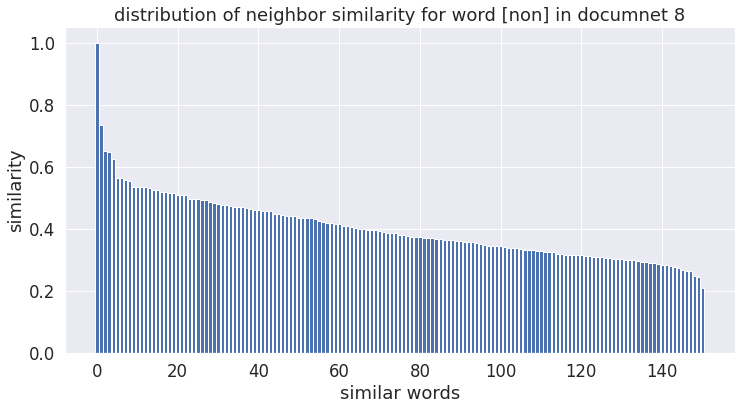

116   -->  communist
1690
[1.0, 0.7359556, 0.6948489, 0.62319475, 0.6210079, 0.5979328, 0.59229195, 0.59198487, 0.59053427, 0.5788735, 0.5739168, 0.55867374, 0.5571766, 0.55404395, 0.553529, 0.5478643, 0.5425383, 0.54105675, 0.5359681, 0.5354221, 0.52760446, 0.52711105, 0.51801175, 0.51635873, 0.5137139, 0.5124705, 0.5067344, 0.505578, 0.50067914, 0.4998476, 0.4965173, 0.49632826, 0.49332204, 0.4870165, 0.4858147, 0.48002094, 0.4787978, 0.47660214, 0.4688728, 0.46819925, 0.4680097, 0.4624397, 0.45808882, 0.45669907, 0.45445406, 0.45270774, 0.45238262, 0.45159465, 0.44267642, 0.44254392, 0.43927377, 0.43748295, 0.43540663, 0.42921442, 0.42901298, 0.41808534, 0.4147435, 0.41261137, 0.4098059, 0.4091971, 0.40915883, 0.40681893, 0.40677172, 0.40656674, 0.4009396, 0.3983075, 0.39806658, 0.3965375, 0.39577502, 0.3924881, 0.38419154, 0.38207084, 0.3819828, 0.3805716, 0.37998343, 0.37996662, 0.37488073, 0.3745858, 0.37326193, 0.3701896, 0.3694436, 0.36941984, 0.36920792, 0.3684222, 0.36579078,

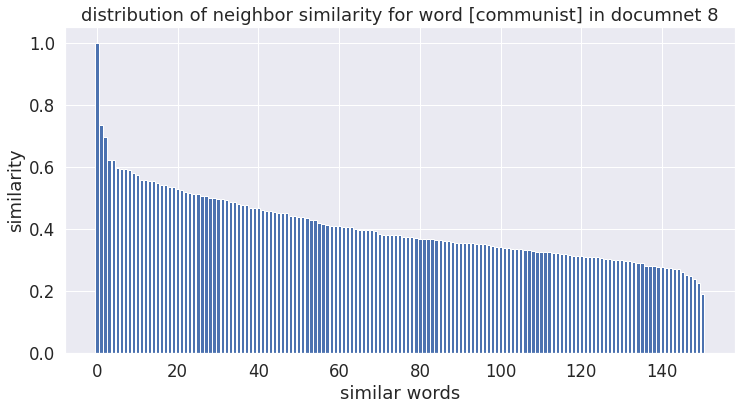

117   -->  leaders
1690
[1.0, 0.6948489, 0.689868, 0.66092, 0.6564704, 0.652831, 0.6522603, 0.65074235, 0.6493344, 0.6470566, 0.6465145, 0.62547904, 0.60070324, 0.595249, 0.5943066, 0.59338605, 0.5827271, 0.57241654, 0.56679404, 0.5655336, 0.562679, 0.55154896, 0.54742956, 0.54413265, 0.5426316, 0.53951764, 0.53914255, 0.5345576, 0.53103983, 0.5296203, 0.52889836, 0.5277023, 0.52722096, 0.5246979, 0.5216183, 0.50365394, 0.49763787, 0.49478722, 0.49421993, 0.4938953, 0.49097008, 0.48808712, 0.4864267, 0.48345888, 0.48143166, 0.47941267, 0.47498602, 0.47176284, 0.46998668, 0.4676512, 0.46311074, 0.46154246, 0.46032065, 0.45999932, 0.45966956, 0.4574149, 0.45712125, 0.45596218, 0.45462462, 0.45399892, 0.45322645, 0.4487536, 0.4480714, 0.4475458, 0.44699514, 0.44508404, 0.44457376, 0.43864357, 0.43446058, 0.4320557, 0.4314182, 0.42701834, 0.42657006, 0.42491487, 0.42417824, 0.42370248, 0.42327398, 0.4212071, 0.42101663, 0.4208321, 0.4164486, 0.41346157, 0.4087568, 0.40620807, 0.40424153, 0

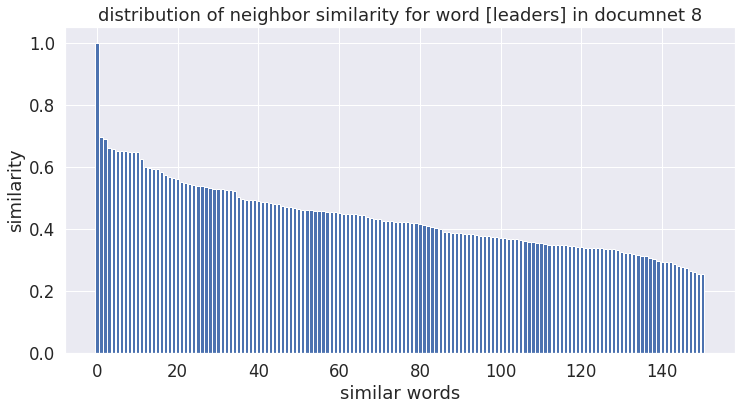

120   -->  many
1690
[1.0, 0.744078, 0.68539214, 0.6808542, 0.6543941, 0.63272035, 0.6309016, 0.6160569, 0.6129467, 0.6069287, 0.57761914, 0.5589589, 0.55824274, 0.55690336, 0.5492381, 0.54658884, 0.5446253, 0.53811383, 0.5113993, 0.5112678, 0.5108384, 0.5064688, 0.4954924, 0.49478722, 0.48437974, 0.48267466, 0.48166543, 0.47579148, 0.47449088, 0.4708699, 0.46608016, 0.45683873, 0.4536345, 0.45233604, 0.44975758, 0.44815356, 0.44421583, 0.44142348, 0.43967372, 0.43924248, 0.43622726, 0.43548688, 0.43545872, 0.43493122, 0.43449375, 0.42921442, 0.42880797, 0.4285849, 0.42431462, 0.42424345, 0.42393333, 0.4236549, 0.42147666, 0.41871262, 0.41791588, 0.41547623, 0.41527697, 0.41422933, 0.41316873, 0.41261426, 0.41032517, 0.4057356, 0.4040798, 0.40313458, 0.40227604, 0.40152442, 0.40057826, 0.39987502, 0.39979395, 0.398812, 0.39846337, 0.39748332, 0.39713654, 0.39697266, 0.396383, 0.39605406, 0.3947344, 0.3947142, 0.39430195, 0.3935745, 0.39304835, 0.3929343, 0.39245087, 0.39148378, 0.39041

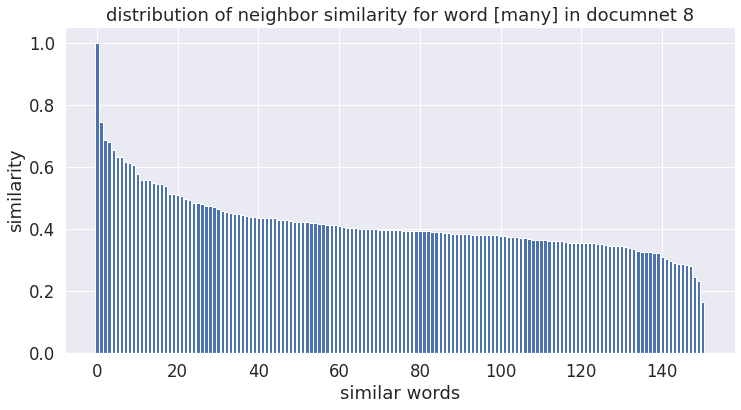

123   -->  party
1690
[0.7531711, 0.6618869, 0.6602762, 0.63044935, 0.6254809, 0.6235819, 0.6164956, 0.60453975, 0.5965979, 0.5947381, 0.5887445, 0.58659005, 0.5758095, 0.5755773, 0.5750521, 0.57416177, 0.5662022, 0.56026506, 0.54691744, 0.54497635, 0.5442466, 0.5429659, 0.5389633, 0.53860223, 0.5332569, 0.5328609, 0.531986, 0.5235615, 0.5226342, 0.5178823, 0.5123621, 0.5101998, 0.5097783, 0.5095636, 0.50800306, 0.5060711, 0.50176454, 0.49065775, 0.48607042, 0.48506826, 0.4850633, 0.48444664, 0.4826135, 0.48258886, 0.47647685, 0.47624332, 0.47058845, 0.46951774, 0.4690416, 0.4629532, 0.46213502, 0.4584875, 0.4564666, 0.45419806, 0.45330068, 0.45301384, 0.45279455, 0.45158112, 0.44750458, 0.44637665, 0.44458744, 0.44400716, 0.44390506, 0.44283116, 0.44204062, 0.4376784, 0.43648064, 0.43359482, 0.43325335, 0.43169895, 0.43104452, 0.42983598, 0.4289983, 0.4267205, 0.42626148, 0.41909325, 0.418636, 0.41820657, 0.41620618, 0.41586536, 0.41499257, 0.41436923, 0.41339713, 0.41089132, 0.410559

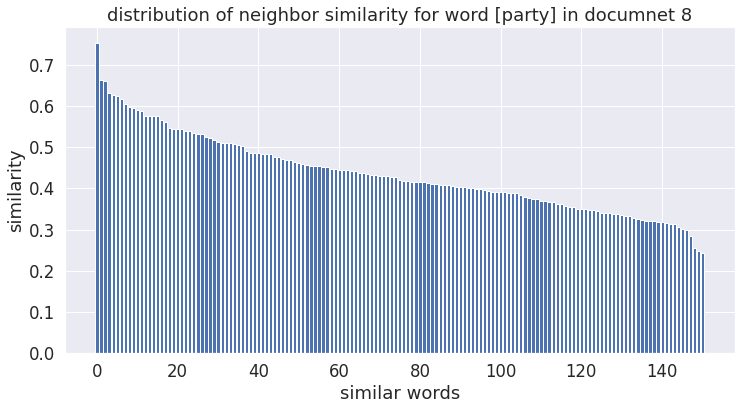

126   -->  leading
1690
[1.0, 0.8146241, 0.72288513, 0.66092, 0.6543941, 0.6371311, 0.62084377, 0.59727955, 0.5717895, 0.5675721, 0.55779445, 0.55404395, 0.5469061, 0.5445594, 0.53537035, 0.5345261, 0.53158677, 0.5290637, 0.528578, 0.52780414, 0.5253244, 0.52445763, 0.5241765, 0.52067035, 0.5201192, 0.5197978, 0.5191046, 0.5168513, 0.5155132, 0.5149262, 0.511134, 0.51020527, 0.5060359, 0.5057219, 0.5032105, 0.49756828, 0.4956481, 0.49330652, 0.49161482, 0.49144474, 0.49105212, 0.48785934, 0.48556408, 0.48524612, 0.4844149, 0.4842192, 0.4798844, 0.479049, 0.47731474, 0.47458088, 0.47398308, 0.47210386, 0.46897554, 0.46616936, 0.4658354, 0.464513, 0.4645066, 0.4631114, 0.46125793, 0.4611541, 0.45799616, 0.45789436, 0.45664206, 0.4545629, 0.45452958, 0.45419222, 0.45403263, 0.4537928, 0.453672, 0.4513532, 0.45130438, 0.4510544, 0.4506458, 0.44821078, 0.4471144, 0.4466769, 0.4466709, 0.44419998, 0.4441663, 0.44330138, 0.44321254, 0.4381677, 0.43581116, 0.43502566, 0.43395793, 0.43264312, 0

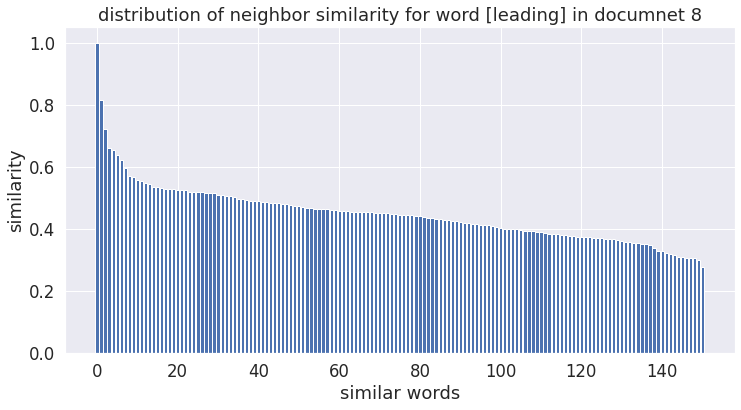

127   -->  figures
1690
[1.0, 0.8146241, 0.652831, 0.6394936, 0.6129467, 0.5976296, 0.58967245, 0.5835967, 0.5777699, 0.5745981, 0.5708314, 0.5679128, 0.55584806, 0.555527, 0.53439647, 0.53395617, 0.51733583, 0.5132189, 0.5114312, 0.5044492, 0.50289035, 0.50272083, 0.50067914, 0.48722905, 0.4860034, 0.48170382, 0.47964495, 0.47093275, 0.47049448, 0.4696772, 0.46835935, 0.46802726, 0.46615103, 0.46396202, 0.46142104, 0.46120864, 0.45784265, 0.4578422, 0.45756656, 0.4569313, 0.453709, 0.4522453, 0.45085937, 0.44908255, 0.44823688, 0.44726118, 0.4419796, 0.4408093, 0.43984348, 0.43804866, 0.43680313, 0.43189383, 0.43041193, 0.42989725, 0.42927605, 0.42816186, 0.42786774, 0.4263016, 0.423934, 0.42294627, 0.42139602, 0.42096394, 0.41815382, 0.41648895, 0.41431928, 0.41291824, 0.4113865, 0.41123426, 0.41059065, 0.41010827, 0.40954712, 0.40856367, 0.40807056, 0.40787047, 0.40750837, 0.40535694, 0.40464392, 0.40112275, 0.400113, 0.39899695, 0.39516076, 0.39446005, 0.3940255, 0.38821644, 0.3878

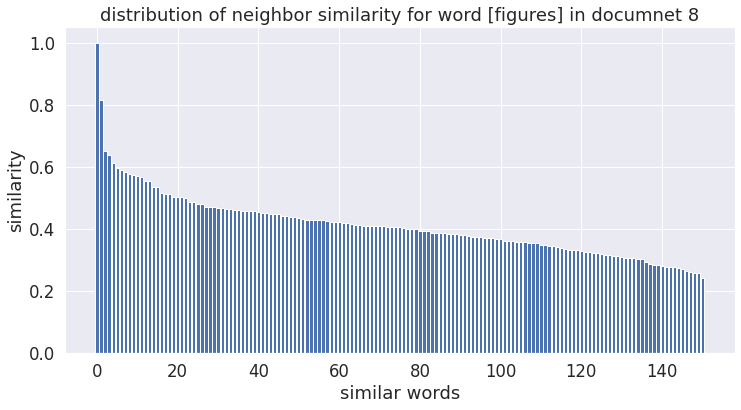

130   -->  detained
1690
[0.99999994, 0.78078103, 0.6327034, 0.6309016, 0.5864755, 0.58290935, 0.5743373, 0.57159066, 0.5679128, 0.5673708, 0.5436294, 0.5369725, 0.5290637, 0.5238611, 0.51736796, 0.51426184, 0.50154644, 0.48784685, 0.4811293, 0.45513713, 0.45399892, 0.44772503, 0.4432605, 0.44279858, 0.43910933, 0.43411267, 0.42975265, 0.4249397, 0.4216798, 0.41830975, 0.4139241, 0.4073903, 0.4047942, 0.40091026, 0.39998877, 0.396901, 0.3845039, 0.37326193, 0.3722077, 0.37188527, 0.36917967, 0.36826342, 0.36487067, 0.36449617, 0.3611604, 0.35625347, 0.35543936, 0.3550222, 0.35416648, 0.3539273, 0.35271966, 0.34909958, 0.34770268, 0.3471675, 0.34712577, 0.34618926, 0.34489727, 0.34419405, 0.34082976, 0.33996737, 0.33764726, 0.3371135, 0.33592257, 0.33518302, 0.33488488, 0.33279395, 0.33183068, 0.3310546, 0.3301695, 0.32641375, 0.326027, 0.32533014, 0.32400653, 0.32303894, 0.3224674, 0.32217667, 0.32163373, 0.3213106, 0.32096067, 0.32090858, 0.3208862, 0.3197625, 0.31863987, 0.31846696, 

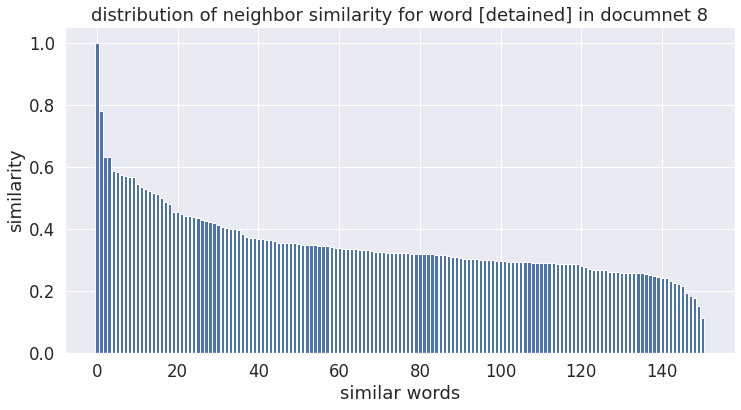

131   -->  since
1690
[1.0, 0.676345, 0.638537, 0.55890715, 0.55824274, 0.54905367, 0.54683673, 0.5436294, 0.54024833, 0.5317522, 0.5257864, 0.5105058, 0.50856876, 0.50490886, 0.5039158, 0.49636155, 0.49467766, 0.4928006, 0.48170382, 0.48060098, 0.47979856, 0.47886238, 0.46665275, 0.465078, 0.46247217, 0.46014783, 0.4601429, 0.45867026, 0.4576772, 0.45714533, 0.4535564, 0.45344383, 0.45316482, 0.44994497, 0.4484849, 0.4466769, 0.4465477, 0.44607452, 0.44422647, 0.4350093, 0.4283481, 0.4275082, 0.4255842, 0.4233209, 0.4210862, 0.41758904, 0.41539592, 0.4145605, 0.41404375, 0.4131996, 0.413166, 0.40933514, 0.4092452, 0.40873462, 0.4083226, 0.4059616, 0.40582916, 0.4053998, 0.40512732, 0.40346062, 0.4027173, 0.40061802, 0.39726147, 0.39580375, 0.39563417, 0.39401868, 0.39180037, 0.3884744, 0.38814113, 0.38721108, 0.38459837, 0.38377327, 0.38329187, 0.38226265, 0.3813993, 0.3803842, 0.3795804, 0.37669784, 0.37468672, 0.3725493, 0.3705001, 0.37035108, 0.36983156, 0.36734164, 0.36500198, 0.3

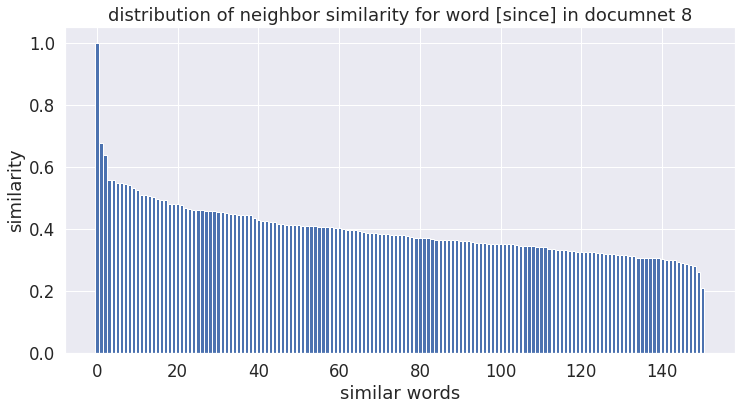

132   -->  president
1690
[0.99999994, 0.8445635, 0.8109255, 0.79468423, 0.79466856, 0.6656979, 0.65145946, 0.6465145, 0.6301514, 0.61946034, 0.6183292, 0.59947646, 0.59790695, 0.59198487, 0.59105146, 0.59076524, 0.5853168, 0.58190346, 0.5795455, 0.5765755, 0.56765974, 0.5676093, 0.5675721, 0.5667665, 0.56548065, 0.5614989, 0.5610535, 0.5592678, 0.5576601, 0.5563493, 0.5542322, 0.5502126, 0.5409902, 0.53395617, 0.53365695, 0.52634346, 0.5256107, 0.52457666, 0.52226156, 0.52200496, 0.5187967, 0.5153949, 0.51313865, 0.5105058, 0.5090805, 0.5054879, 0.50305074, 0.50301754, 0.49623796, 0.49530265, 0.49255875, 0.4920705, 0.4897766, 0.48760545, 0.48236492, 0.4815889, 0.4749552, 0.4742646, 0.4704575, 0.46587044, 0.46247515, 0.4590055, 0.45640936, 0.45617136, 0.45548832, 0.44888955, 0.44852465, 0.44725853, 0.4459617, 0.44448066, 0.44001582, 0.439338, 0.4386682, 0.4374616, 0.42879027, 0.4275303, 0.42591506, 0.4258377, 0.42541212, 0.42424345, 0.4240683, 0.41895396, 0.41678166, 0.4163711, 0.41469

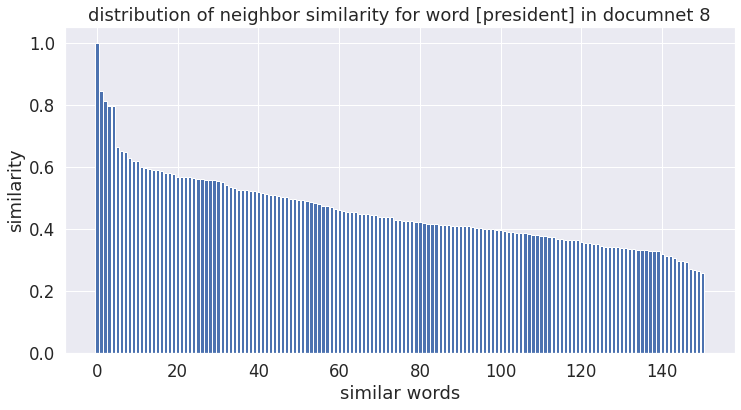

133   -->  nicola
1690
[1.0, 0.79466856, 0.78736174, 0.7752124, 0.71538115, 0.6162012, 0.6039244, 0.59403133, 0.59354556, 0.59229195, 0.5823142, 0.57769156, 0.5643833, 0.55668604, 0.55283046, 0.54905367, 0.54863775, 0.5462256, 0.54313165, 0.5431254, 0.54055274, 0.53643817, 0.5356523, 0.5277023, 0.52760446, 0.52270275, 0.51945215, 0.5154012, 0.51281714, 0.5118832, 0.5098996, 0.50890934, 0.5057219, 0.505135, 0.50289035, 0.4978128, 0.49759838, 0.4870714, 0.48635954, 0.48584145, 0.48396564, 0.48130578, 0.48082387, 0.47963345, 0.47730678, 0.47538272, 0.47449666, 0.4737671, 0.4735514, 0.47197574, 0.47193986, 0.46971205, 0.4669367, 0.46489972, 0.45772192, 0.4571225, 0.45673847, 0.4556286, 0.45517677, 0.4547427, 0.4537869, 0.44990212, 0.4498672, 0.4470667, 0.44632554, 0.44411343, 0.4413912, 0.44088948, 0.43924248, 0.43452573, 0.4298219, 0.4283395, 0.42191646, 0.4216892, 0.41956383, 0.41522497, 0.4152068, 0.41473627, 0.41467366, 0.41388738, 0.4103954, 0.40961555, 0.4076572, 0.40537965, 0.400054

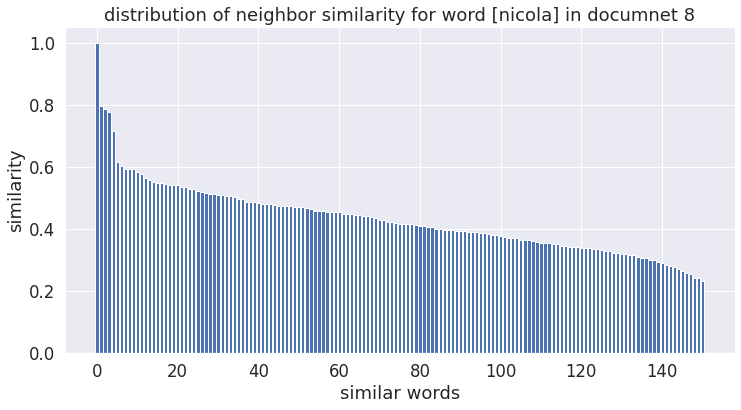

134   -->  ##e
1690
[1.0, 0.8445635, 0.7983085, 0.7752124, 0.6904281, 0.6118727, 0.6037352, 0.60120684, 0.5930251, 0.5672862, 0.5571766, 0.5540115, 0.5523044, 0.5496398, 0.549415, 0.54819465, 0.52889836, 0.5288728, 0.5273671, 0.52553004, 0.5224838, 0.5177596, 0.5165627, 0.51533824, 0.5136199, 0.5132554, 0.50510705, 0.49905849, 0.495526, 0.49411523, 0.49196956, 0.48427594, 0.47857296, 0.47723988, 0.47514606, 0.47210386, 0.4720717, 0.46856427, 0.4662318, 0.46615103, 0.46501362, 0.4598993, 0.4563384, 0.45524502, 0.4525345, 0.44852176, 0.44607452, 0.44059843, 0.4404354, 0.43958429, 0.4388034, 0.43800086, 0.4373239, 0.43350035, 0.4315859, 0.42665327, 0.4254964, 0.42466652, 0.4233322, 0.4207756, 0.41872463, 0.41869107, 0.41604674, 0.41585007, 0.4138013, 0.40954918, 0.40757573, 0.40433282, 0.40387174, 0.40317637, 0.40311208, 0.39998794, 0.39888704, 0.39092678, 0.3854754, 0.3846475, 0.38398328, 0.38134825, 0.38053995, 0.37927037, 0.37917784, 0.37875852, 0.37851864, 0.37689322, 0.37653077, 0.37

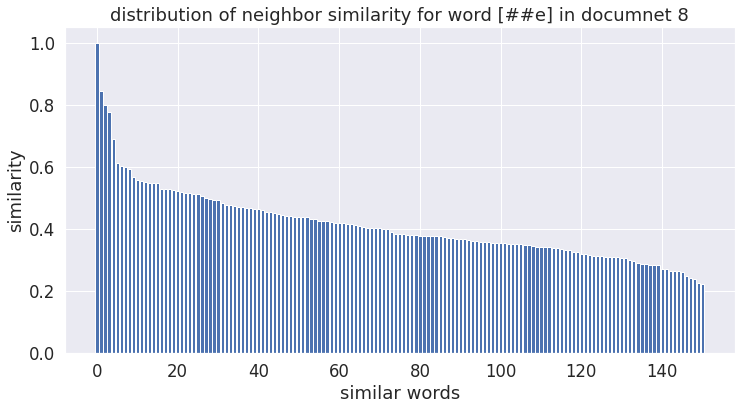

135   -->  ce
1690
[0.8610003, 0.85603946, 0.81265986, 0.8002315, 0.7126065, 0.6825383, 0.6767921, 0.60972714, 0.57675874, 0.5665992, 0.5587784, 0.5566523, 0.5559478, 0.5440847, 0.5402097, 0.5334795, 0.5311026, 0.52891636, 0.52614266, 0.5251783, 0.5239279, 0.52273476, 0.5222803, 0.5164342, 0.5147633, 0.50544107, 0.50156534, 0.49288052, 0.4915715, 0.48826405, 0.47589877, 0.474476, 0.47271797, 0.47223523, 0.46872693, 0.4661546, 0.46552706, 0.46409467, 0.45981604, 0.45539623, 0.45339054, 0.45309815, 0.45301694, 0.4495129, 0.44757223, 0.43646127, 0.43551302, 0.4345562, 0.4253028, 0.42346144, 0.42263207, 0.42120796, 0.4208474, 0.4200251, 0.41681215, 0.412002, 0.41067594, 0.40717232, 0.4008273, 0.3981654, 0.39795578, 0.3953854, 0.39532945, 0.39511245, 0.39434454, 0.3884943, 0.38765728, 0.38245988, 0.38240838, 0.38209364, 0.3807693, 0.37827492, 0.3745009, 0.37404162, 0.37381992, 0.36978072, 0.369253, 0.36903659, 0.3651345, 0.36485317, 0.36018467, 0.3596507, 0.3592155, 0.3587033, 0.3575436, 0.

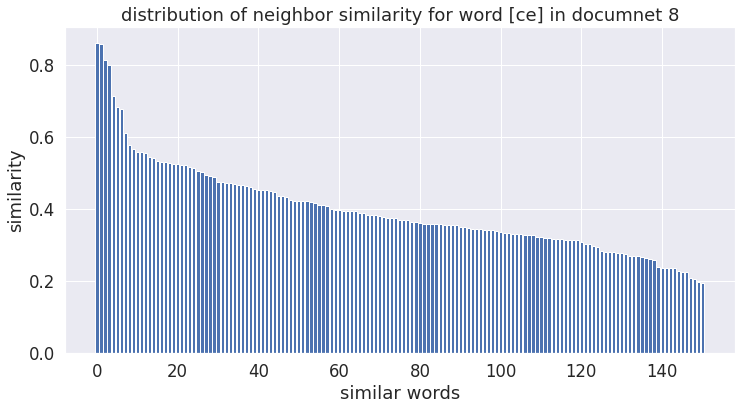

136   -->  ##aus
1690
[0.85833573, 0.81497204, 0.7908782, 0.7672864, 0.74098146, 0.66964954, 0.6177598, 0.59537745, 0.5857096, 0.5652162, 0.5583423, 0.5422702, 0.53938913, 0.53306377, 0.5303856, 0.52367544, 0.5204941, 0.51672226, 0.51042426, 0.5065951, 0.49745888, 0.4962407, 0.4954955, 0.49357763, 0.4894495, 0.4823925, 0.4811747, 0.47595903, 0.4754883, 0.47149596, 0.46939796, 0.46821818, 0.46128538, 0.4606079, 0.45656553, 0.45207024, 0.44382295, 0.44301993, 0.4335872, 0.4261616, 0.42569834, 0.42354462, 0.4233648, 0.42155856, 0.4033364, 0.40277153, 0.40235007, 0.4006963, 0.39707297, 0.39695373, 0.39403957, 0.3935743, 0.39155054, 0.3878156, 0.38738728, 0.3834899, 0.38183135, 0.37496042, 0.37268442, 0.37110233, 0.36760566, 0.36443496, 0.3632025, 0.36281916, 0.36234966, 0.36231363, 0.36164021, 0.36032826, 0.3590116, 0.35744607, 0.3551794, 0.35384226, 0.35053015, 0.3498717, 0.34964055, 0.34918076, 0.3490436, 0.34727103, 0.34573728, 0.34426785, 0.342896, 0.34250194, 0.34225994, 0.34187526, 0

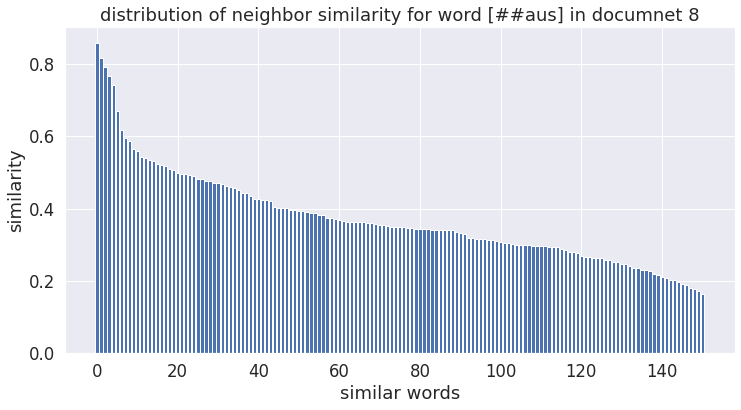

137   -->  ##escu
1690
[0.9999998, 0.7983085, 0.79468423, 0.78736174, 0.7169279, 0.6463672, 0.64314115, 0.6397245, 0.62786996, 0.610517, 0.58493173, 0.5739168, 0.5606922, 0.5536955, 0.55279243, 0.5497461, 0.546672, 0.5408673, 0.54038507, 0.5370953, 0.5345576, 0.5271013, 0.5225085, 0.51605624, 0.5138835, 0.512334, 0.50926745, 0.5071357, 0.5058867, 0.5053721, 0.5041466, 0.49805176, 0.4932757, 0.49199617, 0.47872418, 0.47804302, 0.4740533, 0.47347683, 0.47242555, 0.4618902, 0.4557739, 0.45403263, 0.4526384, 0.4507832, 0.4504435, 0.44824147, 0.44368088, 0.44113958, 0.43948692, 0.43121526, 0.42928103, 0.42685014, 0.41934168, 0.41648895, 0.41472495, 0.412903, 0.41242284, 0.40971, 0.40553313, 0.40406615, 0.40374637, 0.40350163, 0.3998063, 0.39706343, 0.3956827, 0.39498398, 0.3937149, 0.3932097, 0.39179254, 0.38814113, 0.38770774, 0.3875689, 0.3873301, 0.38702297, 0.3850868, 0.38498193, 0.3848611, 0.38152266, 0.38114113, 0.38052225, 0.38046163, 0.37937504, 0.37850863, 0.37781128, 0.37733197, 0

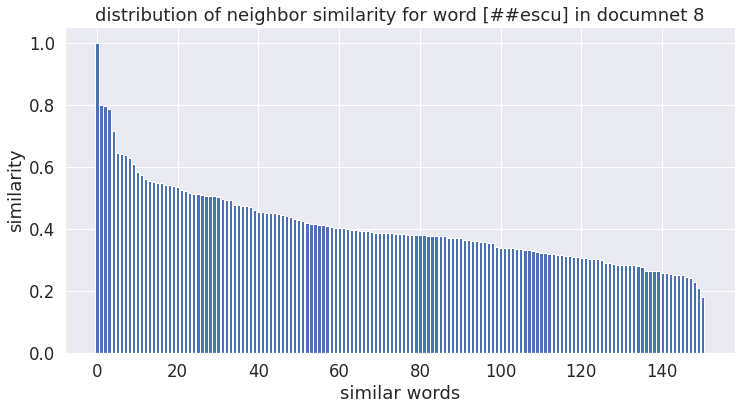

140   -->  overthrow
1690
[0.9999998, 0.8109255, 0.72198844, 0.7169279, 0.71538115, 0.6911451, 0.6904281, 0.687647, 0.6634752, 0.6503774, 0.6493344, 0.6429223, 0.64166677, 0.6238277, 0.6194506, 0.612272, 0.6030822, 0.5997239, 0.59727955, 0.5971088, 0.5815096, 0.5788735, 0.57874405, 0.57803, 0.5776355, 0.5766835, 0.5747651, 0.57182527, 0.5708314, 0.5659751, 0.56152415, 0.54784465, 0.54189414, 0.53719956, 0.53656894, 0.53567356, 0.53408384, 0.52685845, 0.52299446, 0.52106315, 0.51912045, 0.5160916, 0.5128856, 0.51126945, 0.51064706, 0.50600946, 0.501857, 0.50128734, 0.50066394, 0.4996041, 0.49824828, 0.497901, 0.49740046, 0.49713725, 0.49636155, 0.49223167, 0.4904478, 0.4881518, 0.48766875, 0.48429272, 0.48371065, 0.48335323, 0.48152784, 0.4802469, 0.47604597, 0.4734301, 0.47274488, 0.46835235, 0.46827954, 0.4645108, 0.4644633, 0.45542717, 0.45287454, 0.45106015, 0.4496177, 0.44421583, 0.4390847, 0.43782714, 0.4358132, 0.43541622, 0.43214223, 0.4306106, 0.42840105, 0.4257294, 0.42486006,

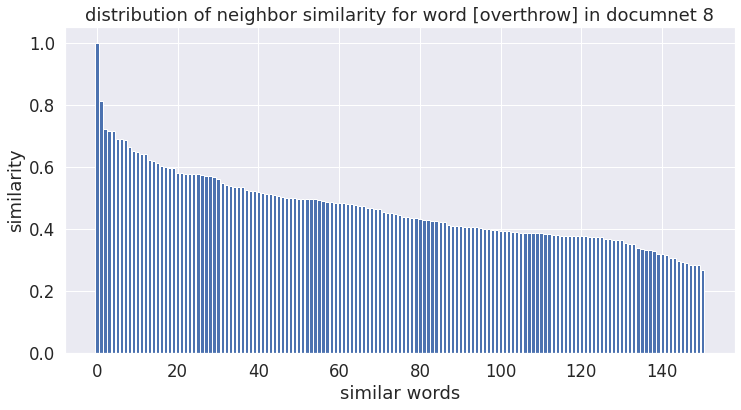

144   -->  urging
1690
[1.0000001, 0.64552456, 0.6408248, 0.56861186, 0.5473001, 0.5196496, 0.5076844, 0.49676517, 0.4936478, 0.48058617, 0.4798455, 0.47886238, 0.47579148, 0.4698789, 0.4680189, 0.46759564, 0.46351826, 0.45995033, 0.45965856, 0.45799616, 0.4534396, 0.45133284, 0.4446833, 0.44435248, 0.44199246, 0.44065252, 0.4398983, 0.43886176, 0.43411267, 0.43041193, 0.42813456, 0.42678213, 0.42474502, 0.42208955, 0.4218077, 0.420463, 0.41973737, 0.41491255, 0.4077225, 0.40537965, 0.39810663, 0.3942696, 0.39293587, 0.389842, 0.38724416, 0.3843968, 0.38386202, 0.38081783, 0.37902337, 0.37831563, 0.37665257, 0.37629086, 0.37305546, 0.3727701, 0.3679906, 0.36528212, 0.36445612, 0.35906315, 0.35726655, 0.35603824, 0.3558895, 0.34646535, 0.3456513, 0.34503734, 0.34311357, 0.34199584, 0.34065524, 0.34059376, 0.33686045, 0.33595538, 0.3333937, 0.33337912, 0.33258137, 0.3288146, 0.32864204, 0.32811224, 0.3280687, 0.32763016, 0.3263055, 0.32544595, 0.324643, 0.32169268, 0.32150006, 0.32091033

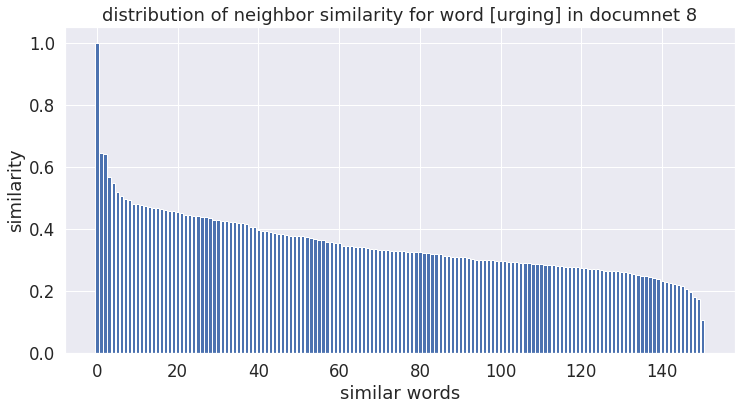

146   -->  party
1690
[0.7433919, 0.7372657, 0.7147039, 0.71433544, 0.6750053, 0.6659099, 0.6504681, 0.64800227, 0.6464963, 0.6339457, 0.6270311, 0.6164846, 0.6157935, 0.6140094, 0.6083356, 0.6073967, 0.6036056, 0.5962689, 0.5898204, 0.5886955, 0.5885396, 0.5816733, 0.5775779, 0.5765729, 0.5765505, 0.5738095, 0.5707878, 0.56880164, 0.56845355, 0.55501723, 0.5484064, 0.53962004, 0.5361575, 0.5352311, 0.533658, 0.5335449, 0.52714026, 0.52381545, 0.52200305, 0.5166211, 0.5144508, 0.5108586, 0.50718606, 0.5051955, 0.5000181, 0.49902856, 0.49854234, 0.49192032, 0.4900728, 0.48947632, 0.48870382, 0.48844123, 0.48815012, 0.4869063, 0.4853659, 0.47790498, 0.47783586, 0.47489673, 0.4721366, 0.46887538, 0.4687851, 0.46744165, 0.46541393, 0.4625401, 0.4614301, 0.4613153, 0.4590952, 0.4581378, 0.45771143, 0.456468, 0.45601094, 0.4548306, 0.452308, 0.45083976, 0.44818622, 0.4479931, 0.44765353, 0.44645196, 0.44592825, 0.44490677, 0.4434435, 0.4424472, 0.44121945, 0.44065917, 0.43257117, 0.43159336,

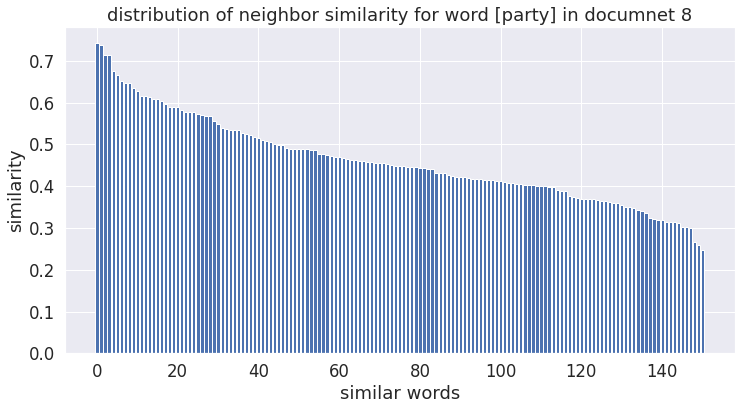

149   -->  dissolution
1690
[1.0, 0.8154119, 0.72198844, 0.7050974, 0.6672748, 0.6231751, 0.6102489, 0.6096797, 0.59790695, 0.58086115, 0.56710684, 0.5584197, 0.55726266, 0.5521293, 0.5485426, 0.54413265, 0.5415913, 0.53603417, 0.53506285, 0.53461826, 0.5321541, 0.52519774, 0.5242528, 0.52332807, 0.5231293, 0.52270275, 0.5221862, 0.51679146, 0.5166615, 0.5155132, 0.5131353, 0.51264834, 0.50766265, 0.50664395, 0.5058867, 0.5011678, 0.5008893, 0.4998476, 0.49837834, 0.4971295, 0.4913991, 0.48722905, 0.48719436, 0.4866741, 0.4863448, 0.4854377, 0.47845483, 0.47508147, 0.4733544, 0.47282508, 0.4712683, 0.4698789, 0.46901497, 0.4664125, 0.4662318, 0.46211433, 0.45947888, 0.45858574, 0.4549268, 0.45437998, 0.45259255, 0.4525897, 0.4507736, 0.44975758, 0.4496709, 0.44842833, 0.44787633, 0.44749182, 0.4472201, 0.44279858, 0.442359, 0.4419146, 0.4414398, 0.4413567, 0.44081235, 0.43971133, 0.43789512, 0.43701807, 0.43578577, 0.43575585, 0.43502438, 0.43202853, 0.43068796, 0.42864707, 0.42757025,

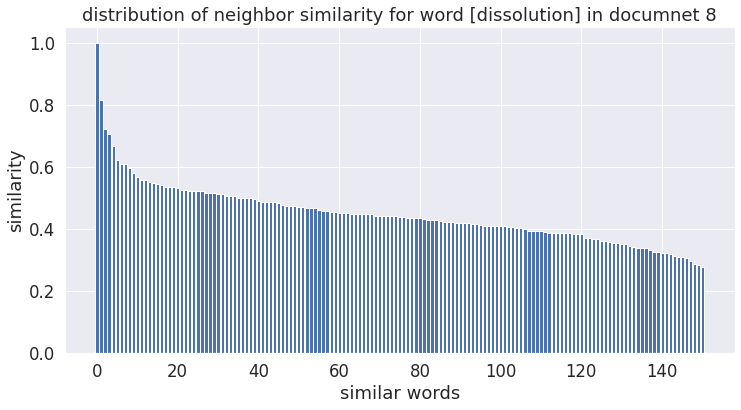

150   -->  appear
1690
[1.0000001, 0.6632005, 0.6552071, 0.64559084, 0.62360466, 0.6160569, 0.605455, 0.5997746, 0.5941977, 0.5864755, 0.5656848, 0.53887844, 0.5376104, 0.5209682, 0.49467766, 0.49391037, 0.48234075, 0.48058617, 0.46321648, 0.46210968, 0.46125793, 0.45756656, 0.4571296, 0.4537869, 0.45292336, 0.45074558, 0.44736248, 0.44015872, 0.44012916, 0.43971133, 0.4385343, 0.4356143, 0.43470594, 0.4320557, 0.42880273, 0.4282213, 0.42631796, 0.42625472, 0.42591506, 0.42486006, 0.42387432, 0.4227273, 0.4227211, 0.4214036, 0.41619352, 0.41601396, 0.4151019, 0.412813, 0.4098059, 0.409423, 0.40711772, 0.40604132, 0.40317637, 0.4024707, 0.40076175, 0.39723605, 0.39723426, 0.39545655, 0.39226717, 0.38954508, 0.38510466, 0.38491157, 0.38339564, 0.3786986, 0.3716573, 0.3708442, 0.36897057, 0.36887115, 0.36672014, 0.36562523, 0.3649932, 0.36458904, 0.35940498, 0.35902768, 0.35462514, 0.35405946, 0.3535223, 0.35115921, 0.3511335, 0.35090804, 0.35008064, 0.34754503, 0.34451926, 0.3444828, 0.3

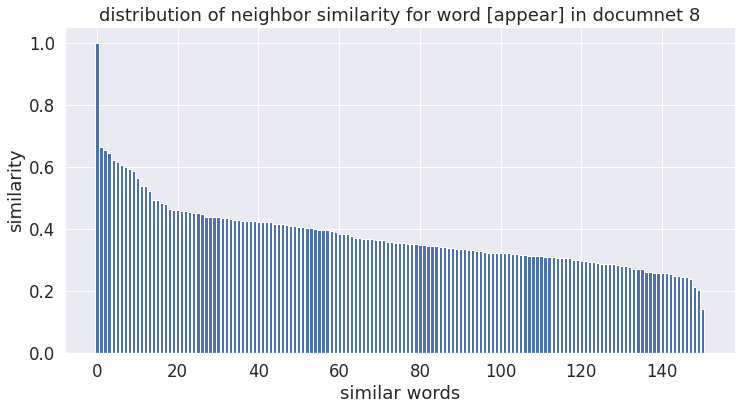

153   -->  high
1690
[1.0, 0.8842295, 0.7897496, 0.7829592, 0.6766236, 0.6572793, 0.6351716, 0.62360466, 0.6050705, 0.5945875, 0.5911232, 0.5717895, 0.55690336, 0.555527, 0.5465216, 0.5369725, 0.52711266, 0.5250431, 0.5102737, 0.50490886, 0.49924898, 0.49323714, 0.47905374, 0.47508055, 0.46351826, 0.46288976, 0.46154246, 0.45808882, 0.45693085, 0.45662856, 0.45167607, 0.44632554, 0.4428935, 0.44172382, 0.43937445, 0.4343114, 0.42879027, 0.42797226, 0.4276041, 0.4184909, 0.41700023, 0.41653755, 0.41327733, 0.41156593, 0.4102684, 0.41026583, 0.40558153, 0.40360373, 0.40028942, 0.39319968, 0.3927945, 0.3877312, 0.38683715, 0.38363776, 0.38134825, 0.3770187, 0.37553445, 0.3750798, 0.3749699, 0.3743028, 0.37048164, 0.36987808, 0.3676827, 0.3638008, 0.36193106, 0.36116904, 0.3576609, 0.35692602, 0.3551611, 0.35315496, 0.35018325, 0.35015434, 0.34939593, 0.3480065, 0.34706074, 0.3464188, 0.3457, 0.34558836, 0.34442794, 0.3424461, 0.34114763, 0.33994243, 0.33809677, 0.336945, 0.3368301, 0.3344

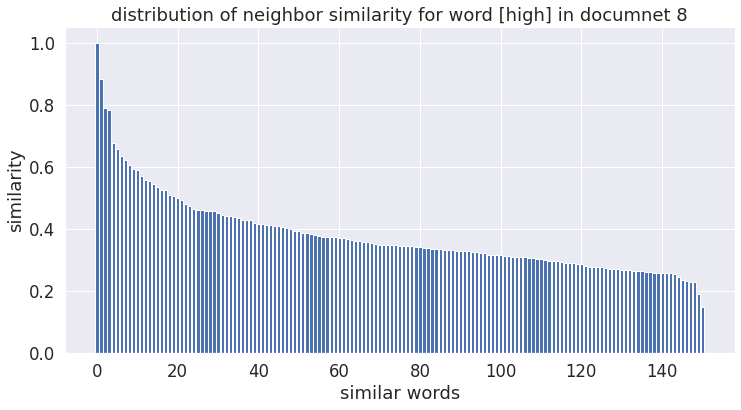

155   -->  ranking
1690
[1.0000002, 0.8842295, 0.7963066, 0.71293604, 0.6894331, 0.6228614, 0.62084377, 0.6166118, 0.5976296, 0.58186483, 0.5670363, 0.5656848, 0.56259906, 0.5589589, 0.5292844, 0.5195619, 0.5164759, 0.51426184, 0.5039158, 0.5009375, 0.4906286, 0.48365018, 0.48282588, 0.48002517, 0.46197176, 0.45966956, 0.4555731, 0.45383385, 0.4534396, 0.44267642, 0.43748146, 0.4257294, 0.42225742, 0.41963854, 0.41902572, 0.4184378, 0.41796845, 0.417386, 0.41734535, 0.41538674, 0.40792957, 0.4078526, 0.4034524, 0.3937656, 0.39363223, 0.3919629, 0.39063787, 0.38848338, 0.3867231, 0.38560945, 0.3850913, 0.38229048, 0.3821487, 0.3819976, 0.38194832, 0.3807572, 0.3801897, 0.37966678, 0.37907135, 0.37870777, 0.37624002, 0.37566566, 0.3742131, 0.37202546, 0.37029982, 0.3694063, 0.36627942, 0.361916, 0.36175913, 0.36102125, 0.3597386, 0.35594448, 0.35530603, 0.35529295, 0.35508555, 0.35329312, 0.35272473, 0.3513627, 0.3494584, 0.34627983, 0.34313294, 0.34281418, 0.3405457, 0.33713758, 0.33649

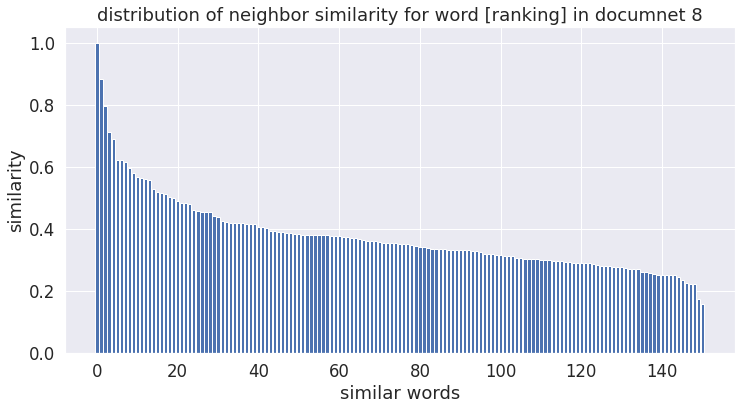

156   -->  officials
1690
[0.9999999, 0.7963066, 0.7829592, 0.7128094, 0.6963073, 0.67498946, 0.6599357, 0.6394936, 0.60186744, 0.5758215, 0.5673708, 0.5517423, 0.53811383, 0.5376104, 0.5354004, 0.528578, 0.49950245, 0.4936478, 0.4892866, 0.47498602, 0.46061212, 0.45867026, 0.44583982, 0.44028023, 0.4377767, 0.43062508, 0.4280826, 0.42219335, 0.41741455, 0.41085908, 0.40265316, 0.40114063, 0.39967743, 0.39965355, 0.39488164, 0.39323124, 0.39212668, 0.39132136, 0.38567144, 0.38192135, 0.3775506, 0.37144703, 0.3684611, 0.36570156, 0.36550674, 0.36550444, 0.36460483, 0.35945946, 0.35776356, 0.35584176, 0.35457683, 0.35247743, 0.3517806, 0.35108608, 0.3489765, 0.34646583, 0.3442232, 0.34307718, 0.3417494, 0.34164554, 0.33842665, 0.33784413, 0.3373378, 0.33708793, 0.3305328, 0.32863784, 0.32821345, 0.32700273, 0.32392254, 0.32382756, 0.3237821, 0.3234679, 0.31988043, 0.31656736, 0.31567246, 0.31470814, 0.31186306, 0.3088079, 0.30841258, 0.30809018, 0.30789447, 0.30764276, 0.30657458, 0.3062

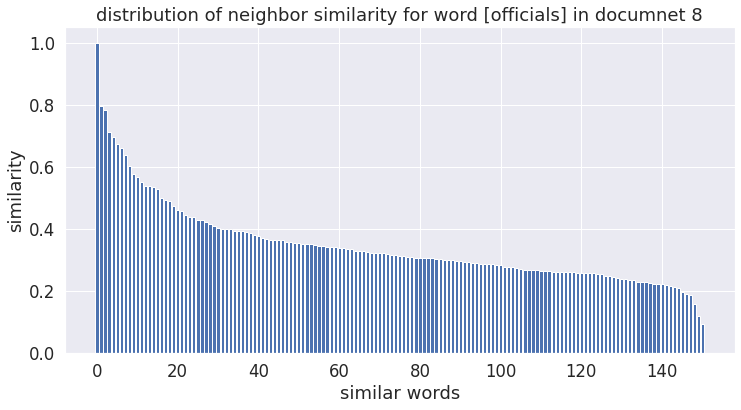

157   -->  seeking
1690
[1.0, 0.7128094, 0.6766236, 0.6408248, 0.6166118, 0.6014705, 0.5910474, 0.5637253, 0.54802734, 0.5335051, 0.525696, 0.5209682, 0.48784685, 0.48267466, 0.48060098, 0.47194213, 0.45270807, 0.4520106, 0.44103277, 0.43956122, 0.43539435, 0.43264273, 0.42030522, 0.41819152, 0.4109303, 0.41064292, 0.40524286, 0.39899695, 0.39855552, 0.39764288, 0.39192587, 0.3902664, 0.3858148, 0.38177383, 0.37513685, 0.3748553, 0.36996955, 0.3639229, 0.36016223, 0.35988808, 0.35693967, 0.35381615, 0.35333744, 0.3533349, 0.35057843, 0.34970143, 0.348925, 0.34458297, 0.34178424, 0.33980575, 0.33677766, 0.33621028, 0.3333164, 0.33179235, 0.32695967, 0.32262427, 0.317213, 0.313231, 0.3102342, 0.30752116, 0.30672795, 0.30553705, 0.30355874, 0.3034218, 0.30253, 0.29823363, 0.29554793, 0.2923786, 0.29212514, 0.2914896, 0.29130664, 0.29010528, 0.2900523, 0.28682077, 0.28667212, 0.285302, 0.28217214, 0.2810747, 0.28090674, 0.2805888, 0.27949697, 0.27780885, 0.2766335, 0.27307618, 0.27201486, 

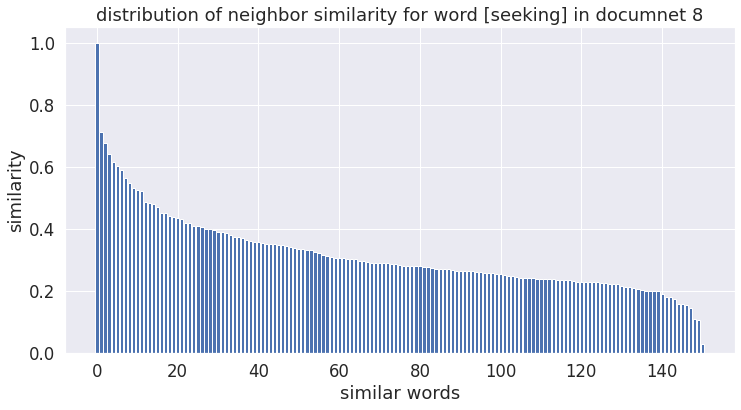

159   -->  new
1690
[0.7604866, 0.67622936, 0.61333543, 0.5943242, 0.57251644, 0.5588045, 0.55261016, 0.5520929, 0.5495502, 0.53593695, 0.53259766, 0.5185339, 0.51487136, 0.5104143, 0.501039, 0.4921454, 0.48840538, 0.48697954, 0.47938818, 0.47734678, 0.47564524, 0.47540492, 0.4730606, 0.47062436, 0.467309, 0.46385577, 0.46197718, 0.46154076, 0.4596948, 0.45851326, 0.45711744, 0.45511633, 0.45356536, 0.44764748, 0.447357, 0.44668412, 0.44305184, 0.43565613, 0.4352365, 0.4351791, 0.4336034, 0.43252674, 0.4320485, 0.43168917, 0.42924774, 0.42834345, 0.4279976, 0.4277498, 0.4256465, 0.42557925, 0.42363963, 0.4232697, 0.4225269, 0.42113578, 0.4172603, 0.41460857, 0.4144949, 0.41173244, 0.41076523, 0.41021127, 0.40942806, 0.40328962, 0.40311554, 0.40213275, 0.40210986, 0.39877796, 0.39820164, 0.3977731, 0.39433149, 0.39386255, 0.39224353, 0.39108405, 0.39035973, 0.38964763, 0.387625, 0.3875163, 0.3858866, 0.38446113, 0.38431597, 0.38295674, 0.38247836, 0.38171962, 0.3817005, 0.37980098, 0.37

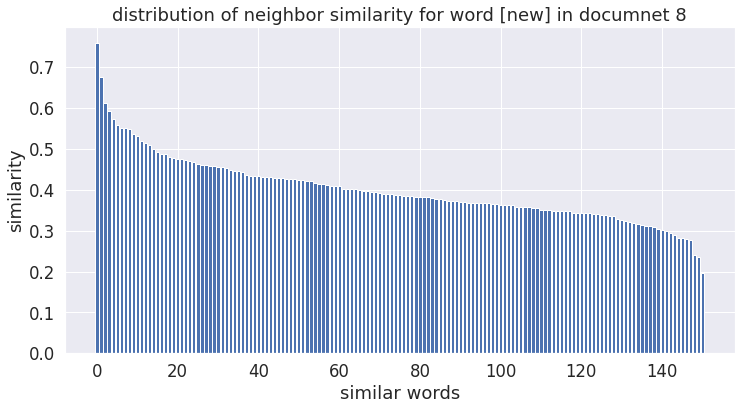

160   -->  political
1690
[1.0000001, 0.7507758, 0.6371311, 0.6050705, 0.59338605, 0.5855132, 0.58248717, 0.58186483, 0.5777699, 0.5758215, 0.55489767, 0.5458393, 0.5335051, 0.5137139, 0.5128856, 0.5090805, 0.5088793, 0.50766265, 0.50154644, 0.49499375, 0.49391037, 0.48969206, 0.48940405, 0.48889014, 0.4857952, 0.485438, 0.48320636, 0.4815488, 0.4730361, 0.4708699, 0.46933007, 0.46834216, 0.46734715, 0.46302155, 0.4622443, 0.46163017, 0.46081144, 0.46014783, 0.45900673, 0.45772192, 0.453578, 0.45256925, 0.4507108, 0.44886002, 0.4460507, 0.44599658, 0.4446833, 0.44387186, 0.443734, 0.44106784, 0.4399596, 0.43985894, 0.43896228, 0.43815777, 0.431823, 0.43086576, 0.42657763, 0.42640552, 0.42570302, 0.42388916, 0.42319483, 0.4231724, 0.41886443, 0.4175222, 0.4160474, 0.4158145, 0.41528952, 0.4136528, 0.41198355, 0.41172534, 0.4103089, 0.40859365, 0.40350163, 0.40311208, 0.40255377, 0.40222073, 0.4014416, 0.40139237, 0.4000205, 0.39922303, 0.39829206, 0.39691746, 0.39511073, 0.39484262, 0.3

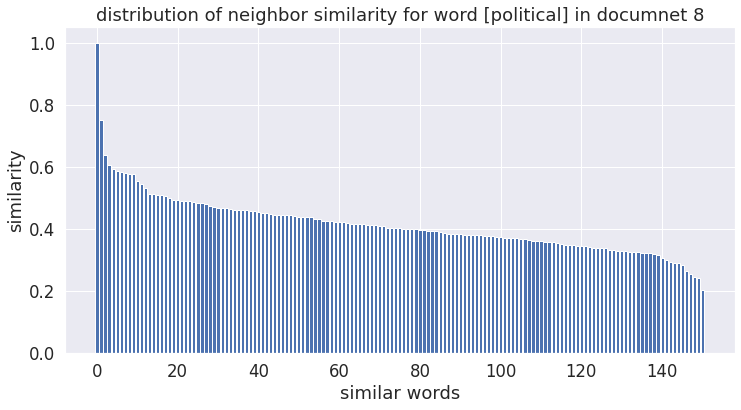

161   -->  profile
1690
[1.0, 0.7507758, 0.6963073, 0.6351716, 0.6228614, 0.5945091, 0.5910474, 0.5835967, 0.57159066, 0.546196, 0.54308534, 0.53887844, 0.53537035, 0.49763787, 0.494593, 0.4862951, 0.48437974, 0.4763069, 0.471436, 0.47073472, 0.44758934, 0.4419146, 0.42843008, 0.4283481, 0.4269256, 0.42678213, 0.4168418, 0.4168316, 0.41541466, 0.41000724, 0.4071015, 0.40550876, 0.3992737, 0.39660725, 0.3803862, 0.37921304, 0.3773323, 0.37225634, 0.37208408, 0.37150446, 0.37030876, 0.36920792, 0.36479402, 0.36452144, 0.36417124, 0.3638157, 0.36309695, 0.3601933, 0.3601029, 0.35833603, 0.3581288, 0.35654533, 0.35252464, 0.35216522, 0.34899572, 0.34822723, 0.34788364, 0.34642705, 0.34492612, 0.34346056, 0.34138814, 0.3410467, 0.34095287, 0.34080768, 0.33974648, 0.33947396, 0.33915758, 0.3383879, 0.337758, 0.3337611, 0.3324858, 0.3284605, 0.3270977, 0.32348552, 0.32020637, 0.31997877, 0.31927368, 0.31916273, 0.3158567, 0.31521076, 0.3147486, 0.31459475, 0.31412336, 0.31287575, 0.3105377, 0

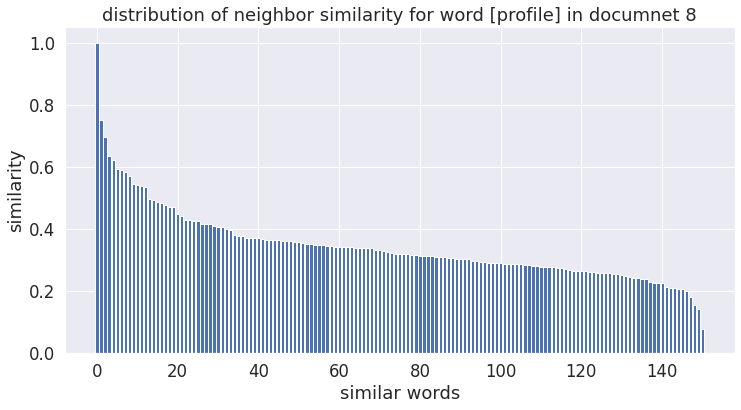

164   -->  open
1690
[0.9999999, 0.8444704, 0.8092696, 0.7538274, 0.70490694, 0.662808, 0.5982052, 0.595249, 0.5929781, 0.5892728, 0.5855132, 0.58278316, 0.58190346, 0.5776355, 0.5770656, 0.560476, 0.5584197, 0.55428034, 0.5425383, 0.53773856, 0.5372635, 0.5356523, 0.5304053, 0.526211, 0.5258037, 0.5249612, 0.52481014, 0.5202464, 0.5193506, 0.5191046, 0.5165627, 0.51015085, 0.50926745, 0.50433904, 0.49810833, 0.48869073, 0.48653007, 0.485389, 0.47428146, 0.47299522, 0.47073472, 0.46899706, 0.46412134, 0.4634205, 0.46300334, 0.4626625, 0.46069264, 0.46058354, 0.4601429, 0.459905, 0.45681167, 0.4563448, 0.45425603, 0.44856542, 0.44823688, 0.44507447, 0.4447887, 0.44152617, 0.44139844, 0.43937445, 0.43773687, 0.43449375, 0.43406555, 0.43388677, 0.43249533, 0.42863035, 0.4283154, 0.4262983, 0.42304015, 0.42280427, 0.41775718, 0.408689, 0.40792957, 0.40784895, 0.40711772, 0.40638554, 0.4043644, 0.4019817, 0.40055424, 0.39998877, 0.3992988, 0.39927745, 0.39905566, 0.39810663, 0.39768404, 0.3

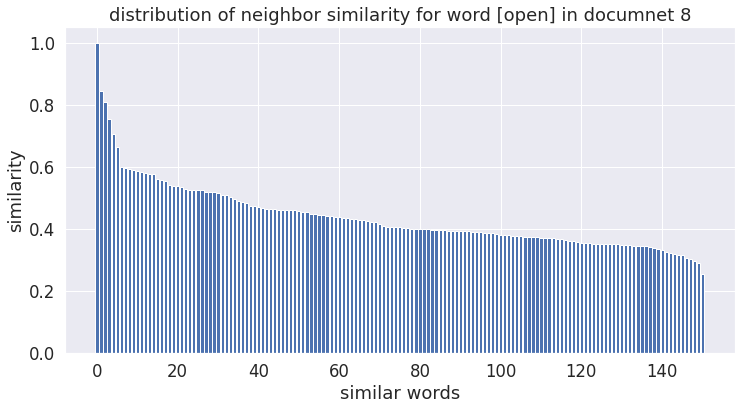

165   -->  elections
1690
[1.0000002, 0.8092696, 0.7710497, 0.72117597, 0.6956503, 0.65145946, 0.65074235, 0.6429223, 0.6341997, 0.6140695, 0.59321326, 0.58086115, 0.57937545, 0.57769156, 0.56316966, 0.55998677, 0.5540115, 0.5498897, 0.5497461, 0.5478643, 0.5458393, 0.537863, 0.53646696, 0.53439647, 0.5294847, 0.52780414, 0.5204489, 0.5164491, 0.5097332, 0.5049083, 0.50402206, 0.5023419, 0.4998759, 0.49736172, 0.4952885, 0.49432373, 0.48763597, 0.48761338, 0.48556894, 0.48461455, 0.48460257, 0.48277575, 0.48177823, 0.47891444, 0.47787213, 0.47290772, 0.47126478, 0.46917382, 0.46665275, 0.46608016, 0.46316433, 0.46239775, 0.46094272, 0.457278, 0.45415878, 0.4492297, 0.4465328, 0.44065326, 0.44052178, 0.4374705, 0.43578508, 0.43476826, 0.43374968, 0.43266678, 0.432592, 0.4321475, 0.4320789, 0.4287802, 0.42843008, 0.42561942, 0.4227273, 0.41772914, 0.41647863, 0.41553587, 0.41202068, 0.41112384, 0.40872747, 0.40852374, 0.40673086, 0.4050222, 0.40420336, 0.40354663, 0.40238956, 0.4016779, 

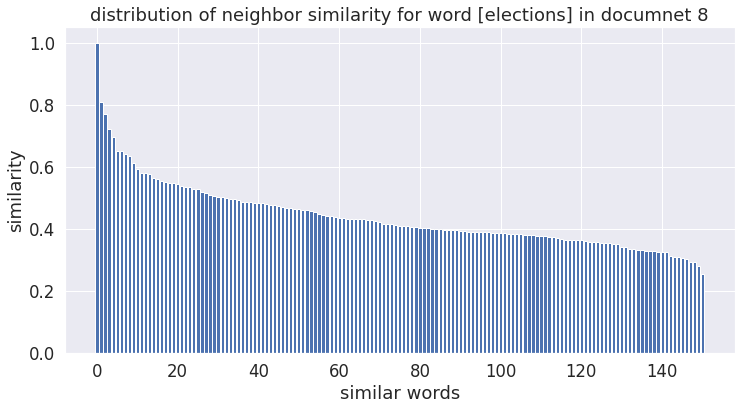

167   -->  held
1690
[1.0000001, 0.8248326, 0.7710497, 0.7538274, 0.68268687, 0.63972235, 0.61038494, 0.59206414, 0.59105146, 0.576229, 0.55928516, 0.55694294, 0.54742956, 0.5451057, 0.5447781, 0.5347128, 0.53106475, 0.52685845, 0.52623355, 0.52553004, 0.5154767, 0.51281714, 0.5082375, 0.5053721, 0.504601, 0.5031203, 0.502387, 0.5006561, 0.49884644, 0.49257064, 0.4910397, 0.48997575, 0.48719436, 0.48616976, 0.4823984, 0.4787665, 0.47429943, 0.47325316, 0.4680097, 0.4614245, 0.46087307, 0.4561792, 0.45487502, 0.4545411, 0.4520508, 0.45203164, 0.44923568, 0.44721502, 0.4465477, 0.4460507, 0.44552562, 0.44379106, 0.43939084, 0.4390831, 0.43714246, 0.43710762, 0.4357139, 0.43347198, 0.4320075, 0.43179685, 0.43067068, 0.42991966, 0.42956358, 0.42769402, 0.42469302, 0.42447573, 0.42439193, 0.42393333, 0.4232614, 0.41986275, 0.4190294, 0.4188685, 0.41623452, 0.41619352, 0.41491255, 0.41327733, 0.41226998, 0.41224515, 0.4117558, 0.41090283, 0.40990576, 0.4097231, 0.4091365, 0.40689608, 0.40156

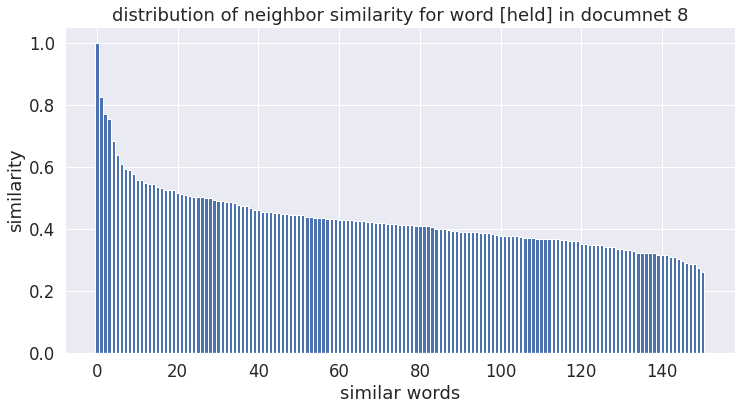

169   -->  swirl
1690
[0.7992832, 0.7425417, 0.6628918, 0.6567658, 0.6435238, 0.6365497, 0.6327646, 0.62664944, 0.6225133, 0.6073419, 0.59900177, 0.54717016, 0.5455185, 0.5320945, 0.5282682, 0.51883435, 0.5128666, 0.50803393, 0.50501555, 0.5009237, 0.49758106, 0.4875793, 0.48539108, 0.47889376, 0.47578672, 0.47420985, 0.47390008, 0.47044608, 0.46970147, 0.4676346, 0.4665952, 0.4662783, 0.4639337, 0.46198395, 0.46179578, 0.46176916, 0.4600135, 0.4568378, 0.4535908, 0.45081803, 0.449628, 0.44846275, 0.44660962, 0.44573843, 0.44232455, 0.44128615, 0.43941355, 0.43887675, 0.43769538, 0.4375146, 0.43738422, 0.43428743, 0.433109, 0.42719835, 0.42091244, 0.4206593, 0.42042598, 0.42038077, 0.4201707, 0.41895607, 0.4159838, 0.4152916, 0.41325182, 0.41299397, 0.41035473, 0.41010934, 0.4077965, 0.4077407, 0.4055617, 0.40411407, 0.4001342, 0.3979966, 0.3978362, 0.39532262, 0.39499706, 0.39479816, 0.3930155, 0.39215243, 0.39185023, 0.39057475, 0.38734245, 0.38712198, 0.38657933, 0.38587877, 0.38337

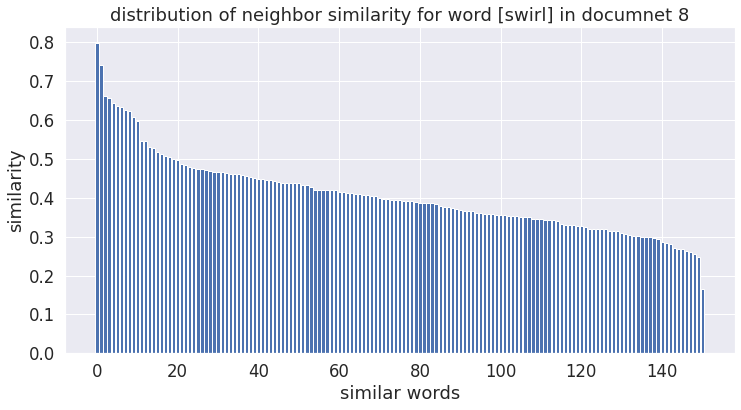

171   -->  revolutionary
1690
[0.92189974, 0.70106256, 0.6845666, 0.67019564, 0.6676649, 0.6511276, 0.6501749, 0.6485238, 0.6426455, 0.6387462, 0.6215985, 0.6200763, 0.61783826, 0.6031245, 0.58046556, 0.5615792, 0.5610879, 0.5602597, 0.55342615, 0.5508588, 0.5505394, 0.53989875, 0.5396238, 0.536981, 0.53470063, 0.53449696, 0.53325295, 0.53015876, 0.5288941, 0.5234467, 0.52056444, 0.5197392, 0.51721954, 0.51671624, 0.5149054, 0.5125206, 0.5122293, 0.5121129, 0.51115555, 0.5106716, 0.50727016, 0.5067067, 0.50330603, 0.5021605, 0.49887577, 0.49618575, 0.49615598, 0.4948153, 0.4929239, 0.4905566, 0.48998338, 0.48865485, 0.48824167, 0.4879781, 0.4854942, 0.4837582, 0.47961044, 0.4771938, 0.47523314, 0.47412354, 0.47365105, 0.4723761, 0.47158056, 0.46506664, 0.46460548, 0.4595623, 0.4589147, 0.45529538, 0.4536603, 0.45246345, 0.4496082, 0.4493578, 0.44819418, 0.44799078, 0.44797373, 0.4433806, 0.4425208, 0.441487, 0.4410171, 0.44022843, 0.43989983, 0.43675658, 0.43645006, 0.4335714, 0.431391

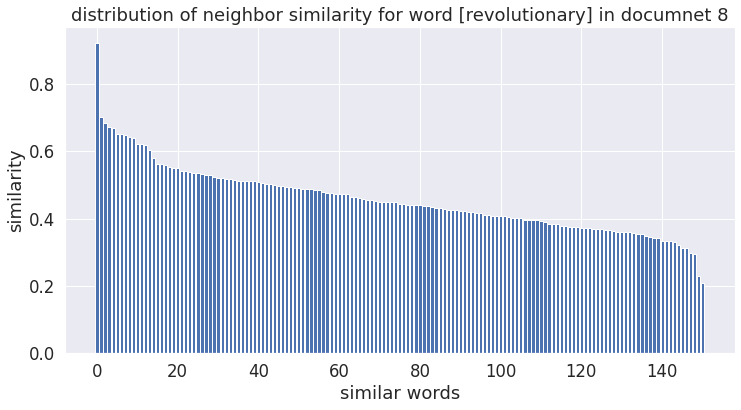

172   -->  fe
1690
[0.91959715, 0.77585286, 0.7721182, 0.74937326, 0.74127597, 0.70086133, 0.6731715, 0.67065305, 0.61190605, 0.60974604, 0.5791408, 0.5726863, 0.5722928, 0.5671083, 0.56652796, 0.5561712, 0.5542587, 0.54293746, 0.5418471, 0.53596514, 0.5358166, 0.53497213, 0.53100646, 0.5279968, 0.5241411, 0.5223098, 0.5163734, 0.5084896, 0.5079037, 0.50634724, 0.5052494, 0.5052415, 0.50463617, 0.50317407, 0.4993, 0.4926963, 0.48980612, 0.48662275, 0.4847846, 0.48460507, 0.48371458, 0.48297557, 0.4811208, 0.47866702, 0.47725654, 0.4754062, 0.4737382, 0.47126883, 0.46820062, 0.46789637, 0.46681646, 0.45591545, 0.45399863, 0.45387876, 0.45235792, 0.45116466, 0.44885603, 0.4470506, 0.44702148, 0.445172, 0.44510716, 0.44278514, 0.44126382, 0.43971577, 0.43957454, 0.4382176, 0.43730408, 0.4347641, 0.42786038, 0.42461777, 0.4238847, 0.42347, 0.42343026, 0.4187887, 0.41681856, 0.41572672, 0.41302234, 0.41201296, 0.4116885, 0.40869176, 0.39984414, 0.3988983, 0.39704484, 0.39619032, 0.39118314,

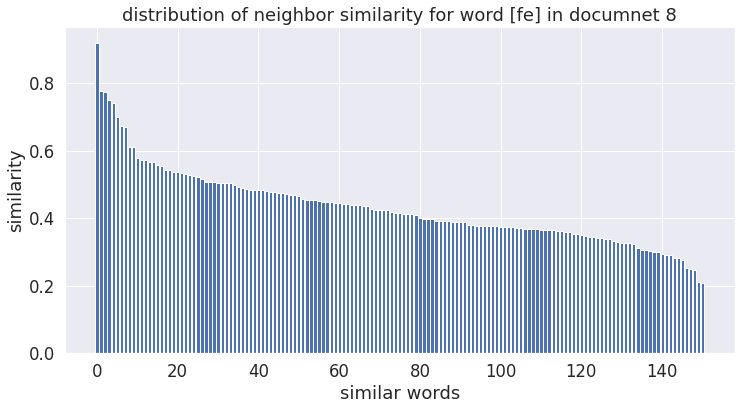

173   -->  ##r
1690
[0.88974404, 0.71595407, 0.6922775, 0.6616951, 0.6483678, 0.63976586, 0.6280133, 0.62685764, 0.61079264, 0.5885108, 0.5836076, 0.58355904, 0.5715681, 0.5650134, 0.55534387, 0.5527313, 0.55154824, 0.55149364, 0.54711676, 0.5453998, 0.52691287, 0.52391183, 0.51999044, 0.5142802, 0.51424265, 0.51421726, 0.5141409, 0.5139281, 0.5096762, 0.49963737, 0.4987285, 0.49837974, 0.4950717, 0.49437356, 0.4920116, 0.4862051, 0.4814377, 0.48065174, 0.47781682, 0.47686934, 0.47484446, 0.47099143, 0.46840575, 0.46825695, 0.46764216, 0.46545535, 0.4637081, 0.46212566, 0.46170527, 0.46107614, 0.46040565, 0.45812246, 0.4567029, 0.45483953, 0.45426804, 0.45355457, 0.44860613, 0.44464225, 0.44322056, 0.44255495, 0.44035962, 0.44012555, 0.43815184, 0.43488812, 0.4331068, 0.4296292, 0.4293552, 0.42872566, 0.42756024, 0.42570013, 0.4225028, 0.4224149, 0.42239475, 0.41987598, 0.4175012, 0.41646358, 0.41646296, 0.41209278, 0.4120136, 0.4109171, 0.40890598, 0.4061468, 0.4061134, 0.4013345, 0.4

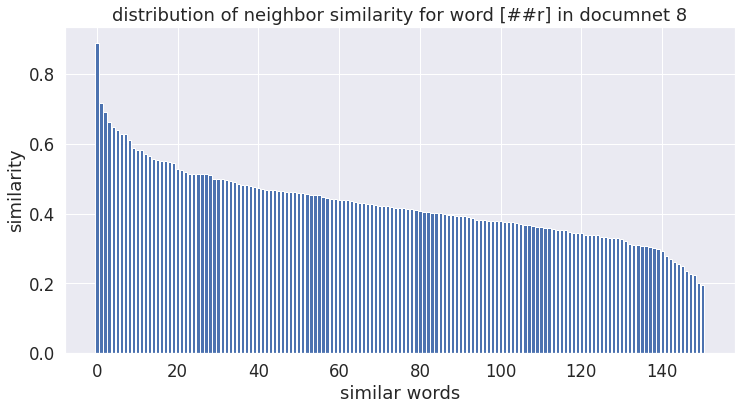

174   -->  ##vor
1690
[0.85710955, 0.80932164, 0.76826084, 0.75639486, 0.69217294, 0.6873845, 0.6744917, 0.658228, 0.6007992, 0.5974997, 0.5901488, 0.58531713, 0.5844686, 0.58252066, 0.54915416, 0.5466488, 0.54547656, 0.5358875, 0.5348319, 0.5318167, 0.5293871, 0.5279213, 0.5245246, 0.52234405, 0.51601946, 0.5137364, 0.5126237, 0.5040469, 0.5036346, 0.502378, 0.50011796, 0.49718773, 0.49631023, 0.4949113, 0.49024802, 0.48951876, 0.48931336, 0.48391944, 0.48176953, 0.47638252, 0.46918786, 0.46840346, 0.467929, 0.4635339, 0.46043628, 0.45840034, 0.45544297, 0.45206797, 0.45129752, 0.44573992, 0.44505838, 0.4446216, 0.44008142, 0.43801102, 0.4379068, 0.43780702, 0.4351472, 0.43266916, 0.43032998, 0.42973867, 0.42894816, 0.42877406, 0.42831543, 0.4278755, 0.42630732, 0.42418057, 0.42356926, 0.42352718, 0.42320174, 0.42261153, 0.42171928, 0.42111588, 0.4210891, 0.41906002, 0.41896006, 0.41533768, 0.414004, 0.41055125, 0.40978566, 0.40782067, 0.4053235, 0.4052301, 0.40359935, 0.40351844, 0.4

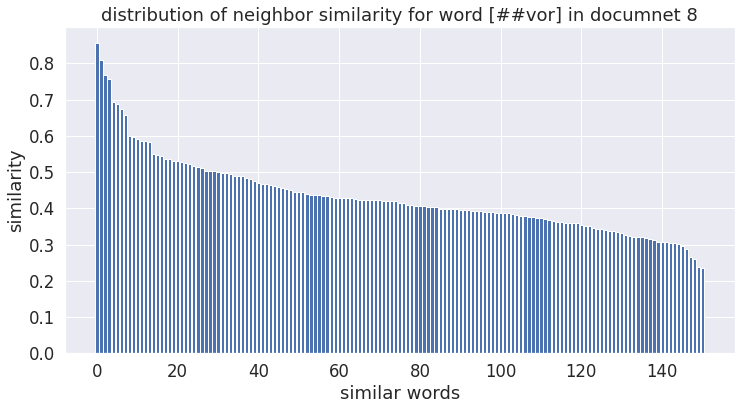

176   -->  eager
1690
[0.99999976, 0.8585317, 0.7187286, 0.7183927, 0.68072927, 0.66766274, 0.660485, 0.62679696, 0.58660895, 0.5841329, 0.5793413, 0.5765481, 0.5638827, 0.5592092, 0.5378857, 0.53702843, 0.5231221, 0.5183967, 0.51354074, 0.51294184, 0.512281, 0.511899, 0.5104463, 0.5090957, 0.50864047, 0.5076844, 0.5017065, 0.49240062, 0.49177393, 0.49155945, 0.49130464, 0.48816234, 0.48713344, 0.48124656, 0.47767222, 0.47630495, 0.47536576, 0.47177097, 0.46161807, 0.45582837, 0.45523953, 0.45459765, 0.45301998, 0.45270807, 0.44994158, 0.44900513, 0.44415766, 0.43789512, 0.43669078, 0.43608284, 0.43494523, 0.43485153, 0.43327355, 0.43322802, 0.42956358, 0.42759496, 0.42447737, 0.4227211, 0.4223765, 0.42094833, 0.4191959, 0.41746625, 0.41561437, 0.4152068, 0.41212025, 0.41089892, 0.40937084, 0.4091713, 0.408844, 0.40336668, 0.403203, 0.40055424, 0.39851832, 0.39726147, 0.39669448, 0.39620924, 0.39593196, 0.3955199, 0.39417008, 0.39146006, 0.39067957, 0.3898829, 0.38974363, 0.387491, 0.3

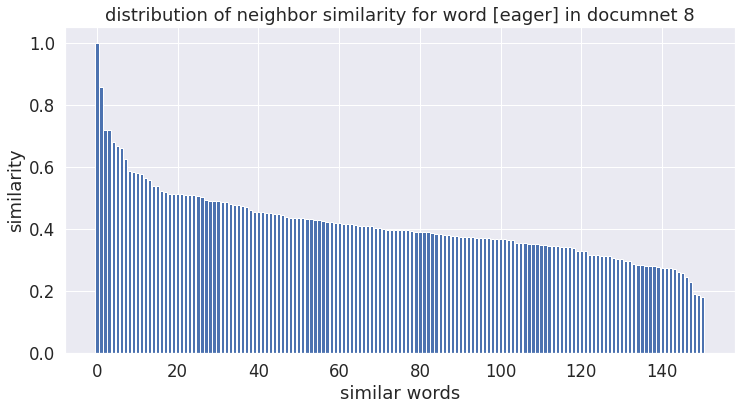

177   -->  ##ness
1690
[1.0, 0.8585317, 0.7608064, 0.6863513, 0.68067664, 0.6643591, 0.6332946, 0.6220701, 0.6188673, 0.60913736, 0.58814746, 0.58343494, 0.5754615, 0.5648395, 0.5612542, 0.5558202, 0.5349387, 0.53431433, 0.53179026, 0.52628565, 0.5260582, 0.51631296, 0.5110465, 0.5089222, 0.5076688, 0.5052608, 0.504849, 0.50337887, 0.5032353, 0.5019676, 0.49903497, 0.49768788, 0.49745387, 0.48976225, 0.48928785, 0.4883815, 0.48324233, 0.4741004, 0.46896517, 0.46767482, 0.46442968, 0.46020097, 0.45537275, 0.45409143, 0.45203164, 0.44787633, 0.4389025, 0.43755084, 0.43280193, 0.42621088, 0.4257924, 0.42421967, 0.42382395, 0.42276427, 0.4221188, 0.42200643, 0.4214036, 0.41973737, 0.41881827, 0.41832393, 0.41723606, 0.4168026, 0.41678166, 0.41660228, 0.4158641, 0.4155228, 0.4154157, 0.41513667, 0.41253886, 0.40933818, 0.4088894, 0.40804955, 0.40772438, 0.40689623, 0.4040423, 0.4016276, 0.4008224, 0.40061706, 0.39975363, 0.39949647, 0.3991075, 0.39763266, 0.39748332, 0.3969642, 0.39390114, 

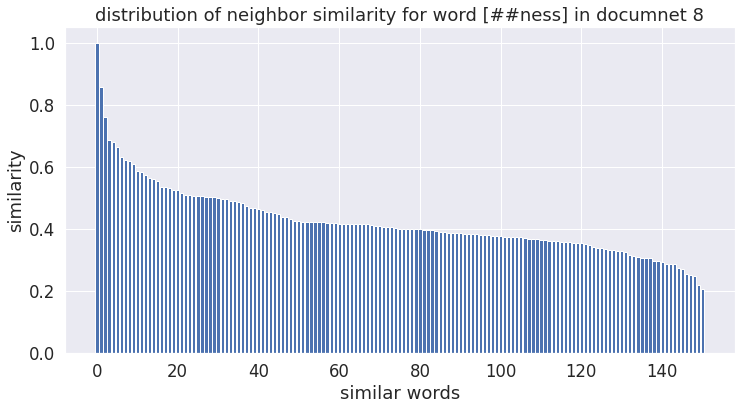

179   -->  erase
1690
[0.99999976, 0.64175946, 0.6331253, 0.6283711, 0.6092155, 0.5984633, 0.5945877, 0.5688688, 0.55405235, 0.53506285, 0.5183961, 0.49937135, 0.49362174, 0.47833216, 0.47626483, 0.47529685, 0.4741004, 0.46306443, 0.45442098, 0.44994158, 0.44897628, 0.44752806, 0.44683495, 0.44463667, 0.4383866, 0.43812406, 0.43726885, 0.43521395, 0.43509775, 0.43455416, 0.4339426, 0.428619, 0.42734838, 0.4267981, 0.42648223, 0.4197364, 0.41388756, 0.40878248, 0.40267324, 0.40038085, 0.39898407, 0.39697015, 0.39649093, 0.39560154, 0.39432192, 0.3928542, 0.3883155, 0.38677102, 0.385878, 0.38264263, 0.38109106, 0.37988067, 0.3779871, 0.37717068, 0.37661237, 0.37658155, 0.37650156, 0.37459224, 0.3729435, 0.36735076, 0.36547768, 0.36523584, 0.36508948, 0.36444095, 0.36273724, 0.3623262, 0.35912502, 0.3547794, 0.351131, 0.35097814, 0.34929013, 0.3462382, 0.34451976, 0.34251696, 0.3419994, 0.34146363, 0.34044743, 0.34019426, 0.33805656, 0.33748215, 0.3373969, 0.3371135, 0.33671635, 0.3337189

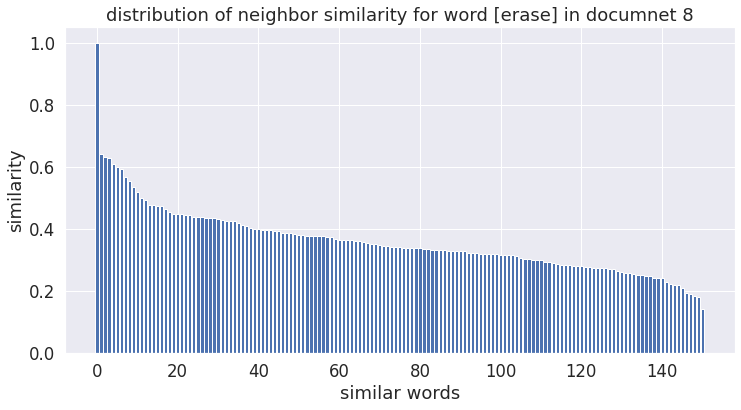

181   -->  vest
1690
[1.0, 0.8295489, 0.7958261, 0.775473, 0.7412486, 0.73899174, 0.69619787, 0.6898165, 0.6412154, 0.638058, 0.6361834, 0.6258559, 0.6218336, 0.61758316, 0.6133927, 0.6092155, 0.60913736, 0.5991123, 0.5932771, 0.5765481, 0.57436955, 0.57350504, 0.5701325, 0.56760013, 0.56526303, 0.56406516, 0.5638975, 0.56350404, 0.563357, 0.549832, 0.541626, 0.53649646, 0.5314349, 0.5202258, 0.5171728, 0.5165135, 0.5084834, 0.5065533, 0.5045582, 0.500587, 0.47498655, 0.47351134, 0.4723884, 0.47130787, 0.4712683, 0.47050107, 0.46981677, 0.46827078, 0.46508425, 0.46354708, 0.45722443, 0.45355964, 0.45231998, 0.4510544, 0.450687, 0.45011622, 0.44558382, 0.44419926, 0.44178906, 0.44052178, 0.43968636, 0.439338, 0.4387021, 0.4380872, 0.43334052, 0.43088216, 0.4292953, 0.42840105, 0.42810696, 0.42546275, 0.4250666, 0.42488825, 0.42483765, 0.4221695, 0.42017564, 0.4186062, 0.41849968, 0.41760314, 0.4170065, 0.41585007, 0.415061, 0.41473627, 0.41144392, 0.4113865, 0.41135854, 0.40973395, 0.40

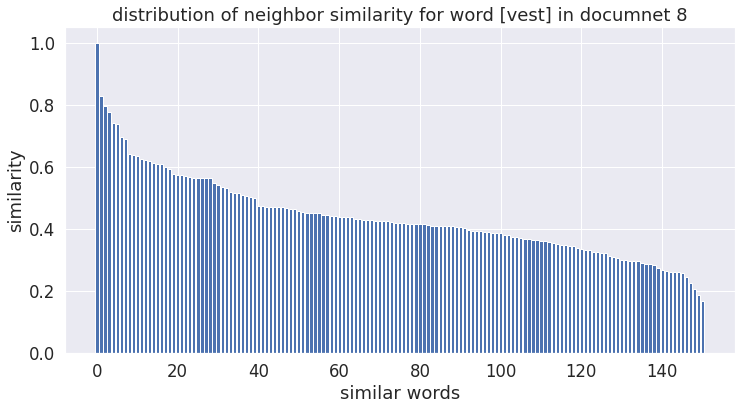

182   -->  ##ige
1690
[0.9999997, 0.893487, 0.775473, 0.7616441, 0.6403948, 0.6316364, 0.5990641, 0.5984633, 0.58546275, 0.58329546, 0.5790065, 0.57848525, 0.5767095, 0.5321488, 0.5302011, 0.5251392, 0.52320325, 0.52304196, 0.5134809, 0.5128913, 0.5065162, 0.5059732, 0.5025394, 0.5006442, 0.49903497, 0.49690884, 0.49040264, 0.48841566, 0.48760486, 0.48649335, 0.482945, 0.48226193, 0.4795855, 0.47858036, 0.4780403, 0.477153, 0.4733544, 0.47177097, 0.468576, 0.46130338, 0.4576056, 0.44884145, 0.44821045, 0.44799405, 0.4466709, 0.44421127, 0.44119924, 0.43991566, 0.4393277, 0.43908125, 0.42850673, 0.4278407, 0.42731297, 0.4271715, 0.42147666, 0.4203683, 0.4183467, 0.41826868, 0.41605902, 0.41439068, 0.41021353, 0.40750837, 0.40712044, 0.39926028, 0.3977909, 0.39719445, 0.393476, 0.3931851, 0.38536233, 0.38328618, 0.38082156, 0.38009468, 0.3782593, 0.37824416, 0.37805092, 0.37767833, 0.37761918, 0.376297, 0.37080517, 0.37024826, 0.36957818, 0.36217287, 0.35965425, 0.35766393, 0.35588637, 0

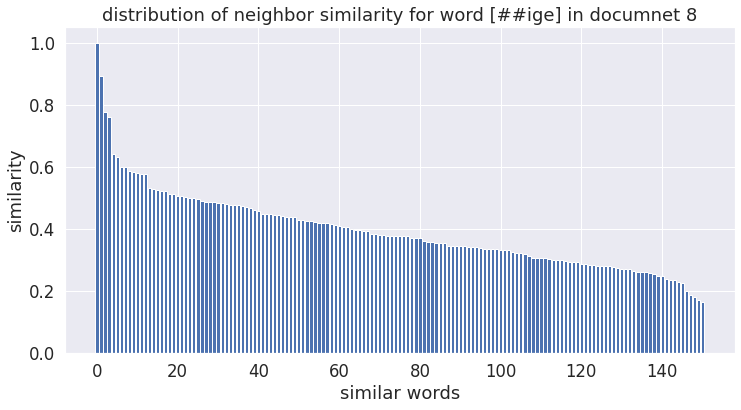

183   -->  ##s
1690
[1.0000002, 0.893487, 0.8295489, 0.75722563, 0.67231786, 0.6669972, 0.6508733, 0.63245535, 0.6259, 0.6246216, 0.6125065, 0.6058295, 0.5945877, 0.58641684, 0.5612542, 0.5604287, 0.558413, 0.55617905, 0.5534374, 0.5494688, 0.53476727, 0.5297004, 0.5207142, 0.51768565, 0.5113838, 0.51005054, 0.5093618, 0.5070578, 0.50447, 0.49941796, 0.49849254, 0.4982136, 0.49650952, 0.49517995, 0.48816234, 0.4857263, 0.48489308, 0.48090073, 0.47814804, 0.4778877, 0.47706953, 0.47508147, 0.47068578, 0.46817043, 0.46616936, 0.4653464, 0.4589417, 0.45884883, 0.4562533, 0.4531694, 0.45188096, 0.44863975, 0.44683772, 0.4408707, 0.43804866, 0.4340905, 0.430299, 0.42835766, 0.42401522, 0.4230016, 0.421605, 0.41422933, 0.41172534, 0.40937424, 0.40845835, 0.40568092, 0.40517932, 0.4038958, 0.40253788, 0.40157762, 0.40043524, 0.39468777, 0.39327702, 0.39094976, 0.39086145, 0.3906187, 0.38978064, 0.3883111, 0.38687447, 0.38668984, 0.38351685, 0.3806093, 0.37963387, 0.37909418, 0.37876788, 0.377

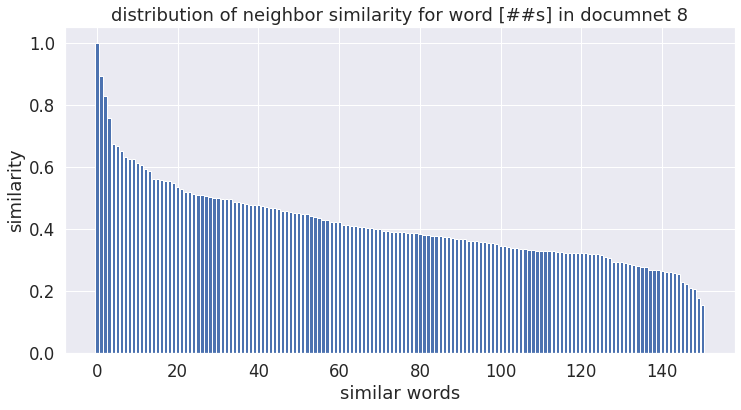

188   -->  mighty
1690
[0.99999976, 0.7945217, 0.7405813, 0.71332943, 0.7129044, 0.69192564, 0.6898165, 0.6669972, 0.66483927, 0.641168, 0.6316364, 0.62437296, 0.6221334, 0.61952984, 0.6179943, 0.6152979, 0.60852534, 0.60015255, 0.5809523, 0.5797268, 0.5780285, 0.57182527, 0.5714091, 0.5615107, 0.5576601, 0.55666643, 0.5512755, 0.5502237, 0.5449193, 0.54216504, 0.53553426, 0.53431433, 0.5337292, 0.53145325, 0.52957475, 0.52660614, 0.5265192, 0.5231293, 0.5197978, 0.51294184, 0.5106553, 0.5092598, 0.508628, 0.5067643, 0.50586164, 0.50476044, 0.503451, 0.5018488, 0.49805176, 0.49759838, 0.49729985, 0.49668863, 0.49550888, 0.492696, 0.48391694, 0.4827914, 0.47933108, 0.47857296, 0.47809446, 0.4759028, 0.47560892, 0.47529685, 0.47525707, 0.47285795, 0.4719013, 0.47083816, 0.4704422, 0.46272674, 0.4624397, 0.4589433, 0.4570719, 0.45462462, 0.453578, 0.4496751, 0.4483616, 0.4476295, 0.44726118, 0.4457795, 0.44421083, 0.44413486, 0.44362843, 0.44250873, 0.44152617, 0.44130063, 0.43990603, 0.4

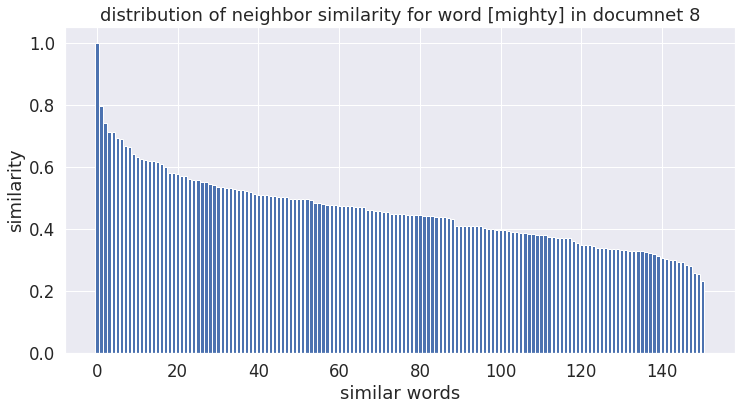

189   -->  communists
1690
[1.0000002, 0.7945217, 0.74354815, 0.67231786, 0.6365677, 0.6276406, 0.6218203, 0.61758316, 0.61070836, 0.6091498, 0.6034306, 0.5851326, 0.58329546, 0.5801556, 0.5728206, 0.572685, 0.56835043, 0.5647739, 0.5643287, 0.56259483, 0.55708164, 0.5518546, 0.53823197, 0.53719926, 0.52829456, 0.52337945, 0.52100074, 0.51075864, 0.5094029, 0.50430393, 0.50367725, 0.5032353, 0.50192183, 0.49602267, 0.49330652, 0.49292156, 0.4912933, 0.4911221, 0.48429272, 0.48387584, 0.4820298, 0.4815488, 0.48124656, 0.46903136, 0.46901497, 0.46883547, 0.46802726, 0.4665681, 0.46549225, 0.4635179, 0.4600429, 0.45917392, 0.45548832, 0.45334563, 0.44594663, 0.44578338, 0.4452564, 0.44508404, 0.44371337, 0.44286826, 0.44271052, 0.44214103, 0.43703687, 0.43532273, 0.43521395, 0.43431127, 0.43032575, 0.42901298, 0.42895165, 0.4287802, 0.42708337, 0.4258369, 0.42027572, 0.41956383, 0.41242284, 0.41213983, 0.4116714, 0.41080016, 0.41074723, 0.41026622, 0.4093505, 0.407111, 0.40603352, 0.40049

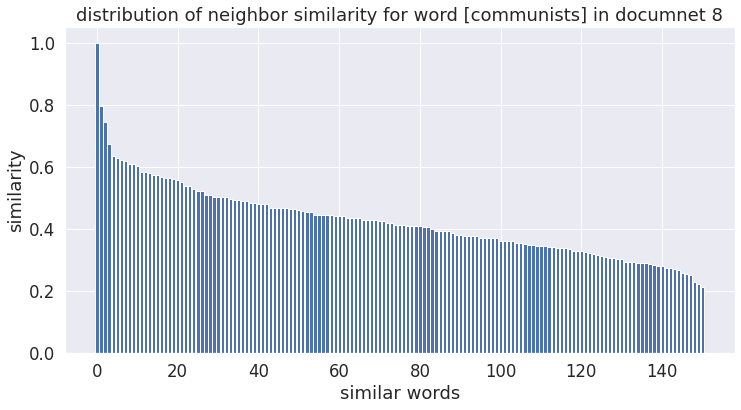

191   -->  risen
1690
[1.0, 0.8936142, 0.7102535, 0.6688435, 0.6672512, 0.6082865, 0.6055691, 0.602798, 0.57737625, 0.56924033, 0.56866777, 0.5648395, 0.5638827, 0.5347763, 0.5314349, 0.52518797, 0.52142835, 0.519626, 0.5144519, 0.5134809, 0.51269186, 0.5106553, 0.51005054, 0.4871037, 0.4861464, 0.48387584, 0.48372597, 0.47577015, 0.46452296, 0.46355048, 0.46281824, 0.455679, 0.45188272, 0.44985044, 0.44603938, 0.4449819, 0.43394566, 0.43178967, 0.42682615, 0.423568, 0.42046505, 0.4204228, 0.4191997, 0.41687918, 0.41220835, 0.41202036, 0.41070125, 0.40969703, 0.40941745, 0.40878248, 0.4083321, 0.4080602, 0.4075753, 0.4072764, 0.40673548, 0.40604132, 0.40596092, 0.40589038, 0.40288538, 0.4027167, 0.40175205, 0.4005454, 0.39806876, 0.39601967, 0.39374745, 0.3904246, 0.39020202, 0.38928226, 0.38619772, 0.38536215, 0.38394254, 0.38333404, 0.38166752, 0.38028622, 0.3767684, 0.3727701, 0.37095308, 0.36944336, 0.3678295, 0.36753705, 0.36741564, 0.36450586, 0.36379316, 0.3626454, 0.3622924, 0.

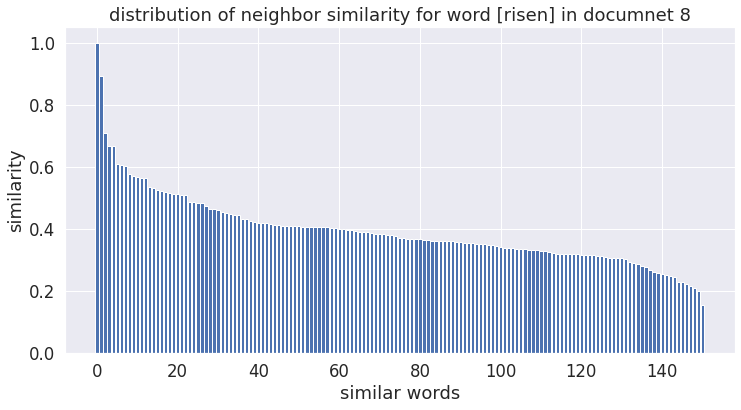

193   -->  among
1690
[1.0, 0.77875113, 0.74942595, 0.6559626, 0.6520185, 0.6379273, 0.63314354, 0.6180711, 0.6055691, 0.6001748, 0.5920745, 0.552905, 0.5467168, 0.54593545, 0.5328959, 0.5174072, 0.5154836, 0.51373947, 0.5128445, 0.5104463, 0.4934077, 0.48976225, 0.4862683, 0.482945, 0.47607052, 0.4753505, 0.47050107, 0.4627775, 0.45917392, 0.4589417, 0.45811242, 0.45082986, 0.44725022, 0.43898383, 0.437221, 0.43455416, 0.43308562, 0.4322977, 0.4281855, 0.41899467, 0.40868372, 0.40834975, 0.40408778, 0.39716786, 0.396945, 0.3963403, 0.39526445, 0.3938942, 0.3929343, 0.38669476, 0.38665366, 0.38513646, 0.38312888, 0.3803235, 0.38008648, 0.3758849, 0.37580693, 0.37501445, 0.37444693, 0.37263882, 0.3698281, 0.36935195, 0.36729205, 0.36570156, 0.36374047, 0.36315382, 0.3606816, 0.35873097, 0.35679772, 0.35576797, 0.35509124, 0.35404128, 0.3527072, 0.34788364, 0.34705836, 0.3457271, 0.34562838, 0.34399372, 0.34178424, 0.33849412, 0.33713758, 0.33612537, 0.3312941, 0.32907903, 0.32786947, 0.

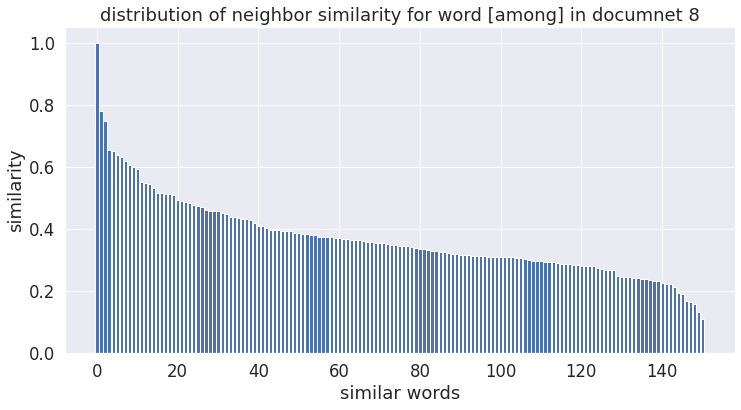

194   -->  students
1690
[1.0000002, 0.82324165, 0.7940229, 0.7875375, 0.7504303, 0.6968644, 0.67500925, 0.6559626, 0.566825, 0.5591589, 0.54546386, 0.5409527, 0.5404475, 0.5399345, 0.53719926, 0.5333952, 0.50221735, 0.48880577, 0.4812753, 0.47522995, 0.47351134, 0.4719013, 0.4692531, 0.4534546, 0.4531694, 0.4494962, 0.44799405, 0.4387464, 0.4384067, 0.43751544, 0.43366492, 0.42901367, 0.42682427, 0.42046505, 0.41746625, 0.41660228, 0.41307783, 0.41250345, 0.410264, 0.40590456, 0.4058773, 0.4030407, 0.4024494, 0.40162033, 0.39905378, 0.39870846, 0.39167893, 0.38996893, 0.38710752, 0.38614702, 0.3842919, 0.37728575, 0.37693897, 0.3752582, 0.37200102, 0.36803502, 0.3635549, 0.36273724, 0.3614328, 0.360793, 0.3607241, 0.36033648, 0.35987693, 0.35439062, 0.35311964, 0.35247743, 0.34983692, 0.34918806, 0.34610695, 0.34522343, 0.34489495, 0.3429135, 0.34206462, 0.34194377, 0.34179467, 0.33879074, 0.33841002, 0.3377924, 0.33438396, 0.33243227, 0.3217314, 0.32019627, 0.31962925, 0.31822425, 0.

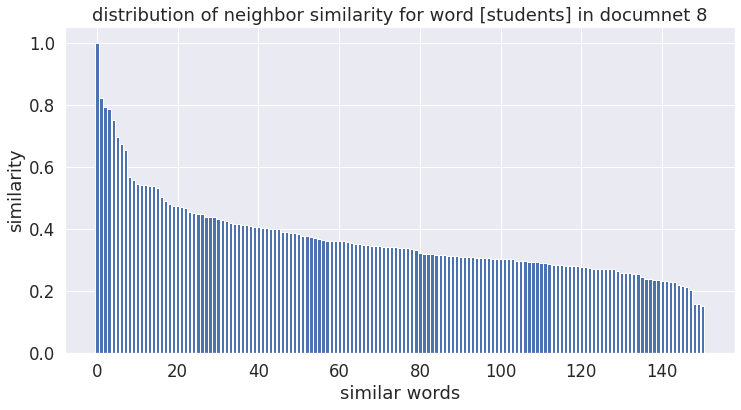

197   -->  streets
1690
[1.0, 0.7989924, 0.7940229, 0.7797157, 0.7439545, 0.72026926, 0.6835572, 0.5920745, 0.55467224, 0.5455275, 0.5365763, 0.53195, 0.5300255, 0.52634454, 0.49439391, 0.485371, 0.47630495, 0.46927357, 0.46442968, 0.45231998, 0.45204931, 0.4500011, 0.44603938, 0.44594663, 0.44362843, 0.44300002, 0.43930325, 0.4378634, 0.4366953, 0.43659687, 0.4282102, 0.4271228, 0.4203683, 0.41927332, 0.41753703, 0.41587093, 0.4147988, 0.41418505, 0.41238153, 0.4103954, 0.40852374, 0.40662217, 0.40456632, 0.398095, 0.39552957, 0.3945732, 0.39419007, 0.39327702, 0.38960773, 0.38801545, 0.38753718, 0.3840561, 0.38373134, 0.3809627, 0.37960863, 0.37833342, 0.37589848, 0.3719934, 0.36965874, 0.3678329, 0.36626264, 0.36039174, 0.3586623, 0.35530943, 0.35518312, 0.3548748, 0.35485858, 0.35254484, 0.35226783, 0.35190913, 0.35096088, 0.34973466, 0.34683478, 0.34667963, 0.34633014, 0.3447684, 0.3446886, 0.34349278, 0.34255797, 0.3423593, 0.3423181, 0.34158725, 0.34044743, 0.33999726, 0.3396721

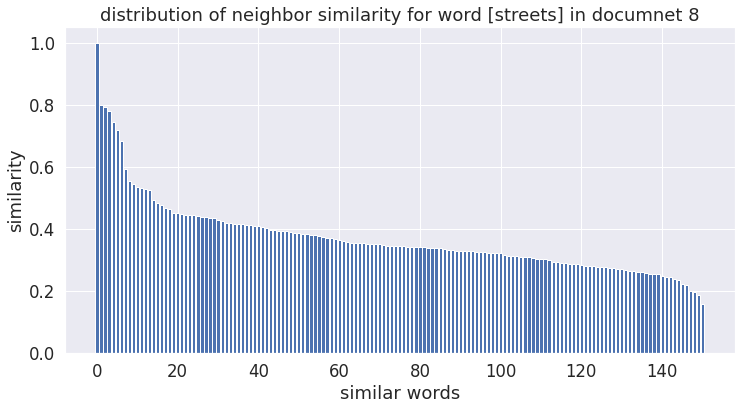

199   -->  long
1690
[0.99999976, 0.8082397, 0.7549677, 0.70903873, 0.70827544, 0.6972071, 0.6835572, 0.67500925, 0.651953, 0.6506092, 0.6382624, 0.58306265, 0.5803213, 0.57436955, 0.5692788, 0.56374156, 0.5615107, 0.5513587, 0.5467168, 0.54564124, 0.52829456, 0.5207142, 0.5128913, 0.511921, 0.5090957, 0.5076688, 0.50741005, 0.50514543, 0.5014633, 0.5013385, 0.4957589, 0.49260324, 0.4900627, 0.48783988, 0.48317885, 0.47555417, 0.4702647, 0.46715766, 0.46221793, 0.45615268, 0.4536233, 0.45241344, 0.4463644, 0.4449819, 0.44441402, 0.4438827, 0.4436245, 0.44292164, 0.43998802, 0.43772763, 0.436966, 0.4350191, 0.43276525, 0.43031245, 0.4283395, 0.42774898, 0.42734838, 0.4266158, 0.4244871, 0.42278582, 0.42246577, 0.4210862, 0.41738495, 0.4164908, 0.41357845, 0.4125834, 0.4116771, 0.41025314, 0.40944278, 0.4091044, 0.40855855, 0.40732116, 0.40673086, 0.3984624, 0.39825714, 0.39808497, 0.3950181, 0.39482713, 0.39468932, 0.39269775, 0.39148378, 0.39095965, 0.39015242, 0.3889382, 0.38885415, 0

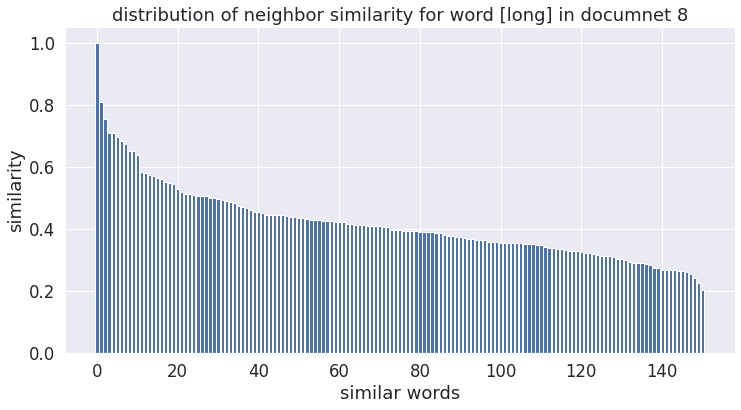

201   -->  suppressed
1690
[0.99999994, 0.8082397, 0.76517, 0.7331376, 0.7326198, 0.72026926, 0.7074927, 0.6968644, 0.6588924, 0.65307486, 0.65162754, 0.62437296, 0.6124271, 0.6030202, 0.6001748, 0.5991123, 0.5869426, 0.5867896, 0.57848525, 0.5728206, 0.558413, 0.5483531, 0.5462942, 0.5317328, 0.5272299, 0.5150774, 0.5144519, 0.5074538, 0.50718987, 0.50698066, 0.5019676, 0.4995286, 0.49825564, 0.49447274, 0.49177393, 0.48757434, 0.48561558, 0.48423243, 0.4814683, 0.48073447, 0.479917, 0.47897297, 0.47486812, 0.46898943, 0.46543968, 0.46528354, 0.46370542, 0.4625067, 0.4596253, 0.44955802, 0.44825065, 0.44414395, 0.43539217, 0.43509775, 0.43142965, 0.42460865, 0.42413634, 0.4240957, 0.42313433, 0.42150766, 0.42104134, 0.4174919, 0.41510046, 0.4135484, 0.41329408, 0.41286686, 0.40966606, 0.40887892, 0.40810937, 0.40733838, 0.4043856, 0.40301433, 0.39622456, 0.3946274, 0.39147347, 0.38960993, 0.38896638, 0.38882804, 0.3852334, 0.3847792, 0.38429168, 0.38254356, 0.38199136, 0.378252, 0.374

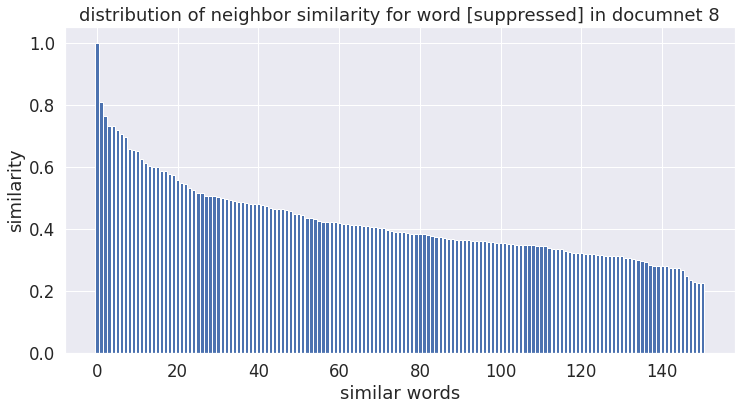

202   -->  artists
1690
[1.0000001, 0.8685383, 0.7875375, 0.7797157, 0.7326198, 0.70903873, 0.6751435, 0.552905, 0.54012215, 0.53789324, 0.5201355, 0.5087826, 0.50838226, 0.5057596, 0.49488264, 0.4777819, 0.46549225, 0.4476295, 0.43677625, 0.43608284, 0.43604076, 0.43432182, 0.42621088, 0.4238874, 0.4200191, 0.41981733, 0.41765785, 0.41135854, 0.40946585, 0.40499848, 0.402778, 0.40152907, 0.39928627, 0.39926028, 0.3987447, 0.39203823, 0.38928226, 0.3886509, 0.3875572, 0.3865618, 0.38390097, 0.3830276, 0.38230842, 0.37705243, 0.37519494, 0.3749901, 0.37471426, 0.37463844, 0.37436625, 0.37374383, 0.37363183, 0.368186, 0.3660577, 0.3619297, 0.3559752, 0.3551123, 0.35436648, 0.35364097, 0.35362023, 0.35294384, 0.3519281, 0.35190126, 0.34481296, 0.34428078, 0.3423096, 0.3410019, 0.33833563, 0.33784413, 0.33767512, 0.33644283, 0.33637255, 0.3362646, 0.33598253, 0.33397686, 0.33366585, 0.33228096, 0.33148807, 0.33127654, 0.32594287, 0.32539982, 0.32536837, 0.3237821, 0.32357895, 0.32315445, 0

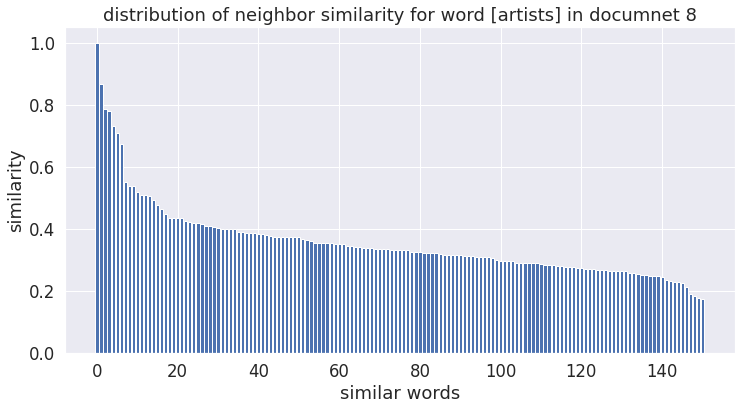

204   -->  intellectuals
1690
[1.0, 0.8685383, 0.82324165, 0.7989924, 0.76517, 0.70827544, 0.6744876, 0.63314354, 0.6207398, 0.60520035, 0.5854428, 0.5750511, 0.5663204, 0.5632992, 0.56259483, 0.55681896, 0.54537094, 0.52957475, 0.5273975, 0.5251738, 0.5231221, 0.520965, 0.5091278, 0.5089222, 0.500587, 0.49939656, 0.49533495, 0.49300462, 0.49042058, 0.4861464, 0.4795855, 0.47917628, 0.4765304, 0.46506035, 0.46467024, 0.46411353, 0.4562533, 0.4520011, 0.45082754, 0.4467512, 0.4425161, 0.4422559, 0.44213352, 0.4411151, 0.43983582, 0.43782312, 0.43334195, 0.42786774, 0.42549288, 0.42479977, 0.4246271, 0.42191646, 0.4201643, 0.41931206, 0.4192556, 0.41815448, 0.4173672, 0.4119686, 0.41112384, 0.41032517, 0.40958548, 0.40553313, 0.40418735, 0.40157712, 0.40022627, 0.39999166, 0.3981433, 0.39775395, 0.39601552, 0.39564422, 0.39376596, 0.39132136, 0.39025608, 0.3898986, 0.38957393, 0.38761032, 0.3871091, 0.38145894, 0.38073054, 0.38058677, 0.37931496, 0.3788612, 0.37714702, 0.3733195, 0.37086

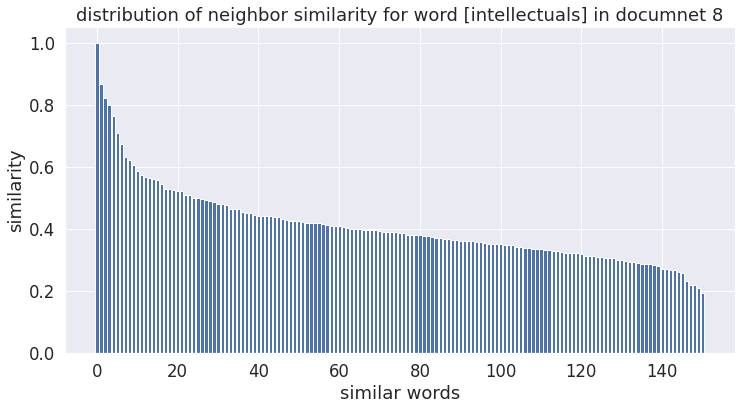

207   -->  even
1690
[1.0000002, 0.79063964, 0.75368965, 0.74942595, 0.67732555, 0.6672512, 0.6207398, 0.6143762, 0.6124271, 0.59197634, 0.591532, 0.57994616, 0.5793413, 0.5754615, 0.56374156, 0.55929303, 0.5591589, 0.55598295, 0.55467224, 0.54585207, 0.53789324, 0.53605866, 0.5327136, 0.5315538, 0.5258072, 0.5171728, 0.5158086, 0.5065162, 0.50447, 0.49622554, 0.4911221, 0.49033025, 0.47688186, 0.47553048, 0.47525707, 0.4678294, 0.46418375, 0.46083695, 0.454975, 0.4533419, 0.4495894, 0.44853097, 0.44815356, 0.4475058, 0.44437546, 0.4396814, 0.43952012, 0.43812406, 0.43341422, 0.43306476, 0.43194172, 0.4311381, 0.42995363, 0.42631543, 0.42443025, 0.42417756, 0.42178875, 0.42027038, 0.41633174, 0.4144001, 0.41404796, 0.4138549, 0.4127466, 0.40930396, 0.4059238, 0.40496677, 0.4046901, 0.40216756, 0.40212634, 0.4018914, 0.40074065, 0.39965355, 0.3957719, 0.3943674, 0.39366513, 0.39189804, 0.38954508, 0.388749, 0.38848338, 0.3868292, 0.3867655, 0.3866031, 0.38590547, 0.38348052, 0.3813993, 

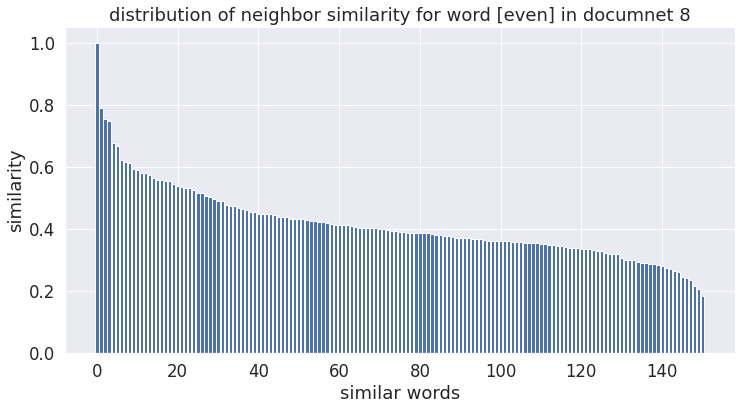

208   -->  within
1690
[1.0, 0.79063964, 0.77875113, 0.63070226, 0.6030202, 0.59957093, 0.5854428, 0.5852257, 0.5832475, 0.57463515, 0.56924033, 0.5570437, 0.54564124, 0.54546386, 0.53702843, 0.53349817, 0.53195, 0.53192633, 0.52814347, 0.5278775, 0.52783394, 0.52628565, 0.52320325, 0.5229195, 0.5202258, 0.5201355, 0.5127946, 0.49862015, 0.4982136, 0.492696, 0.4918012, 0.46903136, 0.4660418, 0.46306443, 0.45451897, 0.452496, 0.44880632, 0.44586277, 0.44368002, 0.43692863, 0.4335053, 0.43214482, 0.42981055, 0.4291468, 0.426415, 0.4230951, 0.42293125, 0.4159283, 0.41381592, 0.41190132, 0.41061443, 0.41026974, 0.40945542, 0.40847376, 0.40828818, 0.40555084, 0.4046219, 0.40104765, 0.39884886, 0.39842802, 0.3947344, 0.39451057, 0.39156252, 0.39133567, 0.38816452, 0.38796675, 0.38626418, 0.38567144, 0.38452274, 0.38213593, 0.3756944, 0.37553495, 0.3748553, 0.3742131, 0.3729008, 0.37267062, 0.36678576, 0.36646968, 0.36455512, 0.36414227, 0.36387897, 0.36243257, 0.36116904, 0.36105704, 0.36047

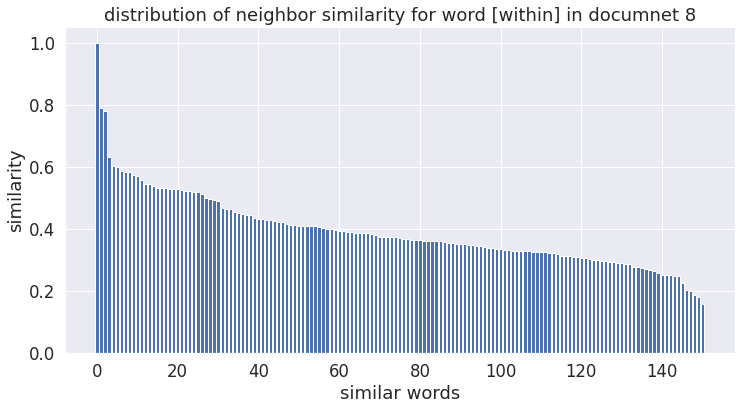

210   -->  party
1690
[1.0, 0.74354815, 0.71332943, 0.6774609, 0.6555807, 0.6367666, 0.6224145, 0.62122476, 0.6193972, 0.60957146, 0.603915, 0.59902525, 0.58138216, 0.57064843, 0.5668682, 0.56406516, 0.5610535, 0.55328006, 0.5513587, 0.54992247, 0.5494757, 0.53936446, 0.5367656, 0.5349387, 0.5313124, 0.52299446, 0.5197344, 0.5150774, 0.5123521, 0.5071357, 0.5070578, 0.50587523, 0.50524276, 0.5044818, 0.5011678, 0.49872553, 0.49486244, 0.4937071, 0.49155945, 0.49125093, 0.49042058, 0.48635954, 0.48556408, 0.4850396, 0.48286515, 0.4790719, 0.4787978, 0.47742406, 0.47598654, 0.47246122, 0.47095042, 0.46829575, 0.46809116, 0.4660418, 0.46445912, 0.4622443, 0.4598993, 0.45972526, 0.45793322, 0.45706594, 0.45532298, 0.45381665, 0.4533419, 0.4516963, 0.4494962, 0.4481346, 0.44457376, 0.44211537, 0.4405643, 0.44044846, 0.4393277, 0.4390722, 0.43476826, 0.43178967, 0.42410576, 0.4197935, 0.41963744, 0.4194942, 0.41815382, 0.41737548, 0.4162653, 0.41586417, 0.4147988, 0.41061074, 0.40874526, 0.4

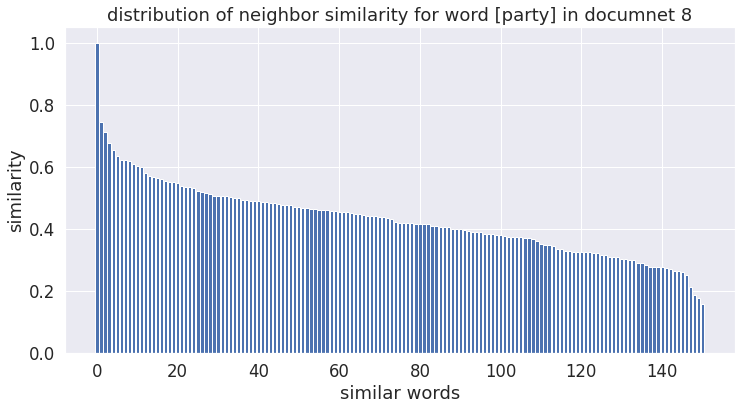

213   -->  dec
1690
[1.0000001, 0.8568126, 0.7666964, 0.761231, 0.7412486, 0.7086069, 0.66483927, 0.6588924, 0.65483594, 0.6506092, 0.63245535, 0.6261155, 0.6224145, 0.6103902, 0.5901303, 0.5801556, 0.5790065, 0.5739304, 0.5663204, 0.5634545, 0.5570437, 0.5519061, 0.5404475, 0.5327136, 0.53015876, 0.52634454, 0.5190512, 0.5185458, 0.5167109, 0.51631296, 0.5131577, 0.5131353, 0.5079343, 0.5017065, 0.5013529, 0.4992674, 0.49811444, 0.49785972, 0.495626, 0.49488264, 0.49362174, 0.49357542, 0.4899534, 0.4853235, 0.4819211, 0.48139006, 0.47828776, 0.47604597, 0.47418573, 0.46866816, 0.46695745, 0.46489972, 0.46355048, 0.46227396, 0.4566406, 0.45617765, 0.45544463, 0.45286378, 0.45218393, 0.4519037, 0.4505487, 0.44852465, 0.44725022, 0.4433588, 0.44308874, 0.44220638, 0.43718112, 0.43502566, 0.43407756, 0.43298054, 0.43225157, 0.4292204, 0.42784268, 0.4265866, 0.42588198, 0.4234998, 0.4186832, 0.418149, 0.41777277, 0.41631272, 0.41598457, 0.41449764, 0.41438073, 0.41202068, 0.40971, 0.409574

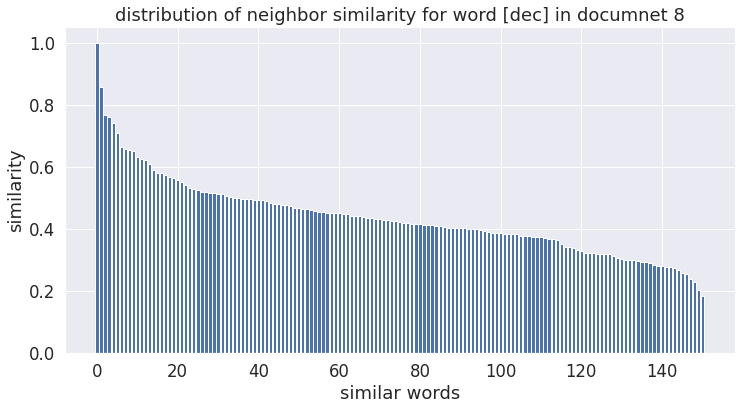

214   -->  ##imated
1690
[1.0000004, 0.8568126, 0.7523756, 0.7331376, 0.7129044, 0.7098465, 0.7011074, 0.69619787, 0.6580007, 0.651953, 0.6508733, 0.65081143, 0.6403948, 0.6091498, 0.59957093, 0.59902525, 0.5930215, 0.59197634, 0.5750511, 0.5614924, 0.5551729, 0.5542773, 0.55405235, 0.54943585, 0.54779786, 0.5399345, 0.5389098, 0.5381923, 0.5347763, 0.5339186, 0.5321541, 0.53013587, 0.5300255, 0.5284092, 0.5260582, 0.52380604, 0.5174072, 0.5150185, 0.5131763, 0.511899, 0.5116713, 0.511469, 0.5102663, 0.50838226, 0.503561, 0.50036156, 0.49784645, 0.49465597, 0.4935304, 0.4914718, 0.49107352, 0.48985308, 0.48667163, 0.4843519, 0.4837589, 0.48371065, 0.48301828, 0.48216623, 0.47997582, 0.47957695, 0.47955227, 0.47617596, 0.47491992, 0.46897554, 0.46630728, 0.46585354, 0.46043998, 0.45882425, 0.45872998, 0.4483741, 0.4467299, 0.44485742, 0.44395292, 0.44285613, 0.4421317, 0.4381924, 0.43554485, 0.4347173, 0.43464622, 0.43396223, 0.43141598, 0.427618, 0.4267357, 0.4259276, 0.42567402, 0.422

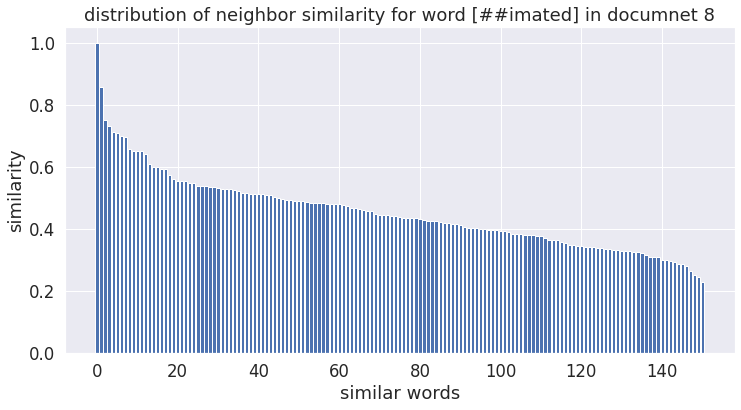

215   -->  ranks
1690
[1.0000002, 0.7666964, 0.7523756, 0.66827923, 0.65307486, 0.641168, 0.6365677, 0.6361834, 0.63070226, 0.6259, 0.62122476, 0.6143762, 0.60520035, 0.5923197, 0.58546275, 0.58306265, 0.5722272, 0.570613, 0.566825, 0.55573404, 0.5521293, 0.5458641, 0.5455275, 0.5403422, 0.53659, 0.5328959, 0.52789545, 0.52098423, 0.5183967, 0.5171254, 0.5127559, 0.5110465, 0.51001513, 0.5087826, 0.5085857, 0.50003076, 0.4963379, 0.4956051, 0.493901, 0.49300325, 0.48953304, 0.4884125, 0.48777804, 0.48766875, 0.48746026, 0.48446715, 0.48372597, 0.48266476, 0.48107558, 0.47891444, 0.4780337, 0.47730812, 0.47555465, 0.47037002, 0.46802947, 0.45419222, 0.45237845, 0.45076472, 0.44992837, 0.44967157, 0.4487536, 0.44598913, 0.44345137, 0.4419796, 0.44185388, 0.43890536, 0.4383866, 0.43685925, 0.4352163, 0.43406555, 0.43368506, 0.43128824, 0.4258377, 0.4250298, 0.42288056, 0.42065322, 0.42057312, 0.41892797, 0.41647372, 0.4108975, 0.40968758, 0.4086353, 0.40724862, 0.4068094, 0.40259594, 0.40

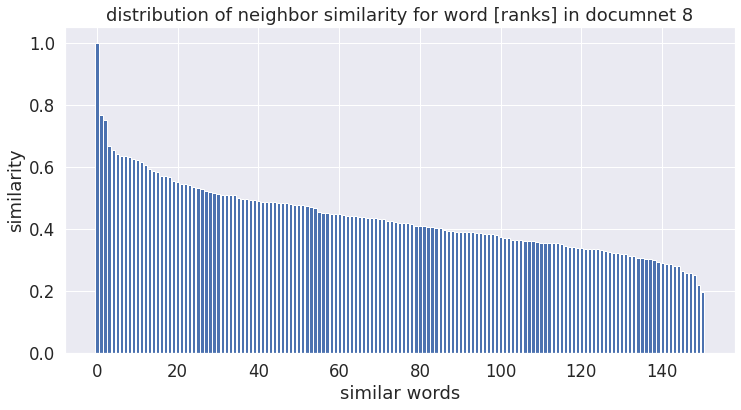

218   -->  cry
1690
[1.0000001, 0.7948681, 0.7150327, 0.7030432, 0.6859664, 0.68446386, 0.68072927, 0.6398281, 0.63597953, 0.6332946, 0.6102411, 0.602798, 0.5933696, 0.58990014, 0.5857413, 0.5827062, 0.5624568, 0.5485335, 0.54784656, 0.54585207, 0.5347648, 0.52970886, 0.52332807, 0.5206247, 0.51514584, 0.5127946, 0.5077611, 0.5076479, 0.5036607, 0.50348365, 0.4937071, 0.4904478, 0.490422, 0.48997575, 0.48934263, 0.4884125, 0.4862683, 0.4833446, 0.48293898, 0.4827914, 0.4798455, 0.47955227, 0.47891662, 0.47266212, 0.47130787, 0.47012746, 0.46921533, 0.46899375, 0.46720946, 0.46587044, 0.46279898, 0.4626625, 0.45793313, 0.4571225, 0.45544463, 0.452642, 0.45043385, 0.4492297, 0.4475458, 0.44614953, 0.44454938, 0.44271052, 0.44113958, 0.44071054, 0.44012916, 0.43683037, 0.43654257, 0.4339426, 0.43152544, 0.43116993, 0.43098292, 0.429294, 0.42749166, 0.42422482, 0.42413634, 0.42401522, 0.4210828, 0.4192556, 0.41878295, 0.41873294, 0.41872463, 0.4178361, 0.4176939, 0.4175222, 0.41738495, 0.4

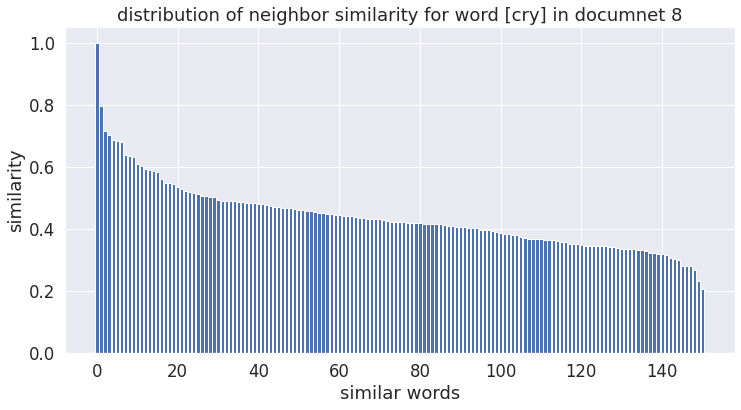

219   -->  reflects
1690
[0.9999999, 0.7150327, 0.67559606, 0.62619936, 0.5755241, 0.5734245, 0.5558202, 0.55564153, 0.545158, 0.5378857, 0.519626, 0.51860124, 0.51828516, 0.5121653, 0.511422, 0.4929985, 0.47421104, 0.47393358, 0.46691075, 0.46555322, 0.46418375, 0.45805633, 0.4577269, 0.45326072, 0.45191953, 0.44880632, 0.44747832, 0.44486815, 0.44445664, 0.44421127, 0.44183725, 0.43869382, 0.43821386, 0.4339102, 0.43355212, 0.4320075, 0.4315774, 0.43088216, 0.43023422, 0.42878836, 0.428619, 0.42590636, 0.42262402, 0.4222852, 0.4218077, 0.4215905, 0.41901192, 0.41887778, 0.4118575, 0.4108975, 0.40845835, 0.408408, 0.40715116, 0.40408778, 0.40384492, 0.4024707, 0.40144098, 0.40103635, 0.39761722, 0.3904666, 0.3891254, 0.38622695, 0.38483718, 0.384512, 0.38445318, 0.38223702, 0.38090038, 0.37910792, 0.37725422, 0.37670198, 0.3757745, 0.3745586, 0.3732715, 0.37253553, 0.3719264, 0.37103346, 0.36988118, 0.36951554, 0.3672629, 0.3654638, 0.3648114, 0.3646889, 0.36225092, 0.3606149, 0.36029

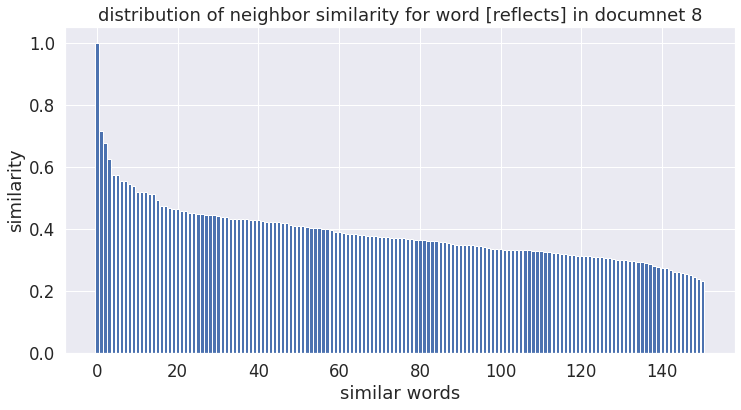

221   -->  swirl
1690
[0.99999994, 0.7948681, 0.7610024, 0.7159865, 0.71452844, 0.69212586, 0.68522996, 0.67559606, 0.6688435, 0.66766274, 0.6643591, 0.6140815, 0.59804225, 0.57994616, 0.5452393, 0.541626, 0.52783394, 0.5235555, 0.5124677, 0.51013696, 0.4934077, 0.49267346, 0.49209404, 0.49174017, 0.49125093, 0.48953304, 0.48922238, 0.4868314, 0.4857263, 0.48226193, 0.47529823, 0.47452593, 0.47097942, 0.47083816, 0.4687632, 0.46764597, 0.46630728, 0.46351165, 0.46003908, 0.4596389, 0.45947888, 0.4554803, 0.4541396, 0.45218393, 0.45133284, 0.4448805, 0.44405866, 0.44390196, 0.4411151, 0.4378506, 0.4374331, 0.43726885, 0.43539217, 0.43347198, 0.43147507, 0.43107164, 0.42895165, 0.42809483, 0.4244871, 0.4237306, 0.4206855, 0.42018417, 0.41990292, 0.41881752, 0.4173354, 0.4118809, 0.41113007, 0.409423, 0.4073363, 0.40462622, 0.40456632, 0.40406615, 0.40353823, 0.40322727, 0.40181935, 0.40106434, 0.40057826, 0.40042785, 0.4000548, 0.39975965, 0.39545333, 0.39395672, 0.391854, 0.39152783, 0.

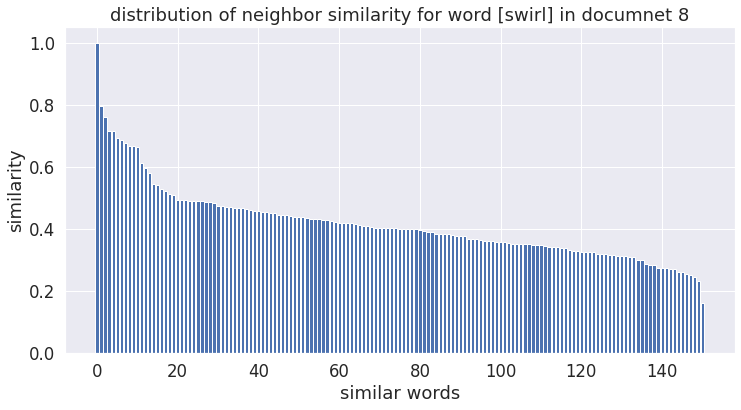

223   -->  revolutionary
1690
[1.0, 0.7651353, 0.7463889, 0.7413833, 0.71452844, 0.68446386, 0.6774609, 0.63814783, 0.6276406, 0.62679696, 0.6188673, 0.6179943, 0.6082865, 0.58079565, 0.57350504, 0.5734245, 0.56961715, 0.5606079, 0.5603459, 0.5595228, 0.55573404, 0.55567646, 0.5417398, 0.5381923, 0.53232425, 0.53143185, 0.53015876, 0.5297004, 0.5271338, 0.5258072, 0.5249265, 0.524216, 0.52226156, 0.520965, 0.5180043, 0.5166615, 0.5165427, 0.5158465, 0.5157838, 0.5149167, 0.5102066, 0.50495154, 0.5037929, 0.50128734, 0.50074494, 0.49887022, 0.49825564, 0.4918012, 0.49040264, 0.49035692, 0.48956233, 0.48951584, 0.48785934, 0.48783988, 0.48320636, 0.4812753, 0.48112422, 0.48024255, 0.47746024, 0.47607052, 0.47347683, 0.4726063, 0.4725777, 0.46996886, 0.46971205, 0.4694111, 0.46861273, 0.46860713, 0.46759564, 0.46412134, 0.4635763, 0.46157843, 0.45524502, 0.45442098, 0.45327842, 0.453171, 0.45159465, 0.44853538, 0.44582808, 0.44424438, 0.44227624, 0.44177106, 0.44065326, 0.43822736, 0.4365

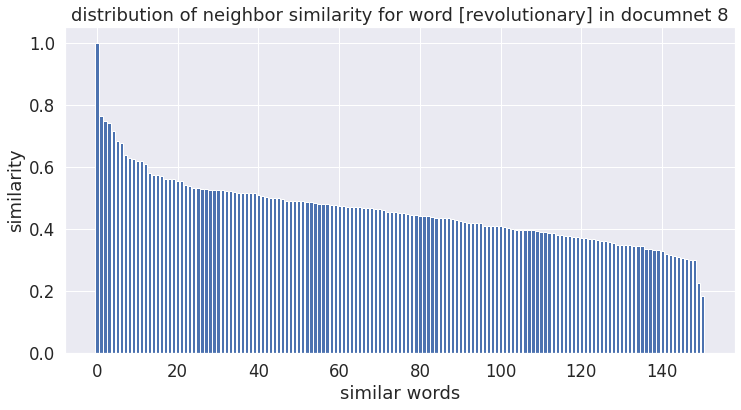

224   -->  fe
1690
[0.99999976, 0.83995533, 0.77725184, 0.7463889, 0.7187286, 0.7159865, 0.7030432, 0.6863513, 0.57064843, 0.56726545, 0.5646285, 0.56350404, 0.55564153, 0.5519061, 0.5449193, 0.53659, 0.5294946, 0.52175283, 0.5215434, 0.52142835, 0.52100074, 0.5203153, 0.5196543, 0.51872987, 0.5167153, 0.5158086, 0.5091278, 0.503561, 0.5019381, 0.49941796, 0.49862015, 0.4971295, 0.49613887, 0.49260324, 0.48608565, 0.48561558, 0.48396564, 0.48092243, 0.47969875, 0.47863048, 0.47242555, 0.46927357, 0.46663293, 0.4627775, 0.46247515, 0.46232247, 0.46174377, 0.45965856, 0.4580769, 0.45799792, 0.4521679, 0.451465, 0.4508202, 0.44923863, 0.44897628, 0.44804892, 0.4459036, 0.4432681, 0.44176078, 0.44119924, 0.4401396, 0.43958586, 0.4387464, 0.43617713, 0.43604076, 0.4349473, 0.43417096, 0.43214223, 0.43067068, 0.4277707, 0.42665422, 0.42564183, 0.42515314, 0.42466652, 0.4234283, 0.4164628, 0.4157921, 0.41525006, 0.41300267, 0.41287166, 0.41238588, 0.41019967, 0.41003138, 0.40110946, 0.4003085

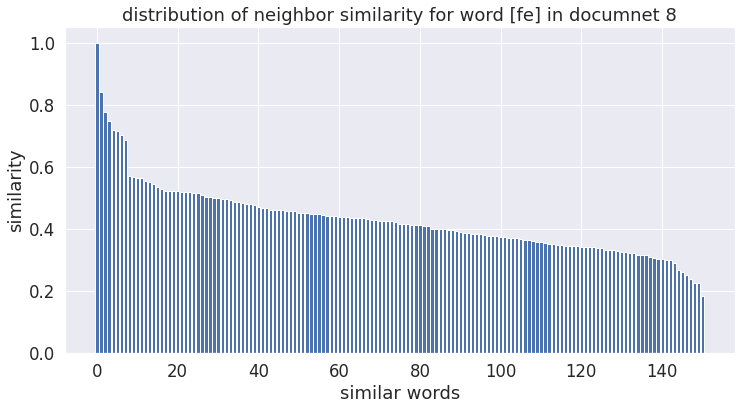

225   -->  ##r
1690
[0.99999976, 0.77725184, 0.7413833, 0.7182636, 0.69212586, 0.68067664, 0.660485, 0.6398281, 0.6258559, 0.6193972, 0.6192249, 0.60737205, 0.5758289, 0.5714091, 0.5705533, 0.5638823, 0.5634545, 0.55197954, 0.5503943, 0.54659903, 0.53244096, 0.5298894, 0.52518797, 0.5225085, 0.5158377, 0.51313865, 0.5121653, 0.5114714, 0.511469, 0.50784445, 0.50432944, 0.5029506, 0.5014633, 0.4978128, 0.497398, 0.49642128, 0.49414045, 0.4932664, 0.49196956, 0.48813647, 0.48796773, 0.48377493, 0.48245412, 0.4820298, 0.48167926, 0.48107558, 0.47486812, 0.47160605, 0.47068578, 0.4653558, 0.46411353, 0.45799282, 0.4561792, 0.454975, 0.45348522, 0.45287454, 0.452496, 0.4501019, 0.4500011, 0.44989812, 0.44982857, 0.44426072, 0.44381914, 0.4415751, 0.4414398, 0.4410984, 0.43622023, 0.43557686, 0.4321475, 0.43094456, 0.43077213, 0.42943066, 0.4267981, 0.42677206, 0.42150736, 0.42006704, 0.41796288, 0.4100759, 0.40953493, 0.40931195, 0.40888792, 0.40883967, 0.40712044, 0.40681893, 0.40678108, 0

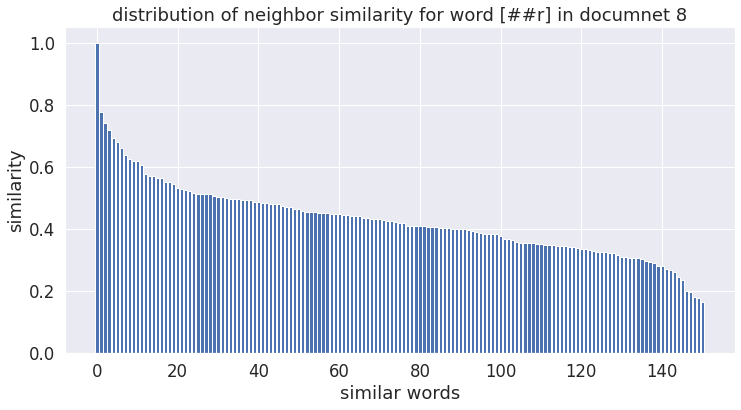

226   -->  ##vor
1690
[1.0000002, 0.83995533, 0.7651353, 0.7610024, 0.7608064, 0.7183927, 0.7182636, 0.6859664, 0.6106008, 0.5755241, 0.5706655, 0.5701325, 0.56866777, 0.55598295, 0.5534374, 0.54992247, 0.547161, 0.5436281, 0.5403422, 0.53553426, 0.53349817, 0.5259385, 0.5251738, 0.52337945, 0.5155537, 0.5154836, 0.5128848, 0.5116713, 0.5074538, 0.49811444, 0.4900627, 0.48919845, 0.48833263, 0.48649335, 0.4859565, 0.48031586, 0.47169623, 0.46863222, 0.4682867, 0.4680189, 0.46781585, 0.46211433, 0.46123523, 0.4609853, 0.4604531, 0.45924878, 0.45675045, 0.45669478, 0.4554589, 0.45536733, 0.4534546, 0.4510208, 0.44804496, 0.446958, 0.44463667, 0.44339007, 0.44300002, 0.4425711, 0.4422047, 0.44079775, 0.4383544, 0.4366625, 0.42921817, 0.42894113, 0.4246418, 0.42233026, 0.42177993, 0.42047557, 0.41981733, 0.4194023, 0.4175743, 0.41581303, 0.41149342, 0.41138494, 0.4110543, 0.40748015, 0.4034722, 0.40178257, 0.39978528, 0.39706343, 0.39644915, 0.39601415, 0.39530498, 0.39470792, 0.39423376, 

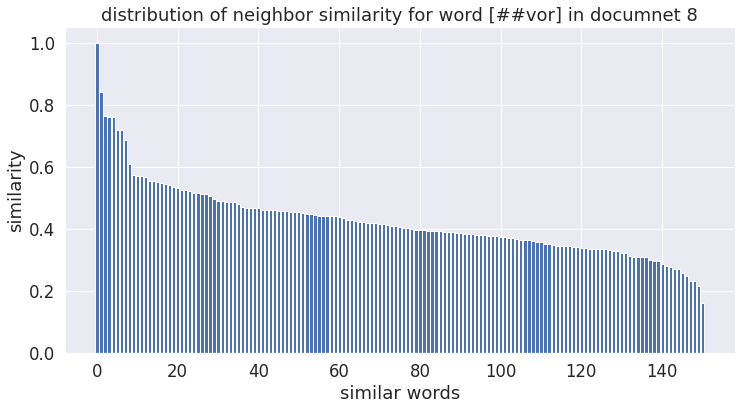

229   -->  land
1690
[1.0, 0.9102114, 0.68731153, 0.6833341, 0.66987175, 0.64376354, 0.63588995, 0.6121457, 0.5924231, 0.5869667, 0.569478, 0.5686922, 0.5611316, 0.56076944, 0.53962016, 0.5385059, 0.5299833, 0.52708554, 0.52483565, 0.5165427, 0.5101525, 0.48980823, 0.48919845, 0.4850396, 0.4814683, 0.47277734, 0.4678294, 0.46585354, 0.46564585, 0.46553764, 0.46506035, 0.4570719, 0.45334563, 0.44498467, 0.44399393, 0.44390196, 0.44374663, 0.44292164, 0.44243804, 0.44185388, 0.4402462, 0.43898383, 0.4337467, 0.43341684, 0.43249533, 0.43098292, 0.4281948, 0.42751008, 0.42515314, 0.42421967, 0.42409784, 0.42278057, 0.42266154, 0.4221771, 0.4214495, 0.4183467, 0.41760314, 0.41687918, 0.41598457, 0.41541526, 0.4124077, 0.41196215, 0.41179746, 0.4114446, 0.4103089, 0.41026974, 0.40937424, 0.40883967, 0.40687108, 0.4055804, 0.40516424, 0.40357497, 0.40162033, 0.39961496, 0.39631233, 0.39552957, 0.39515492, 0.39299035, 0.39146006, 0.39053488, 0.3891254, 0.38867024, 0.3886509, 0.38841346, 0.3879

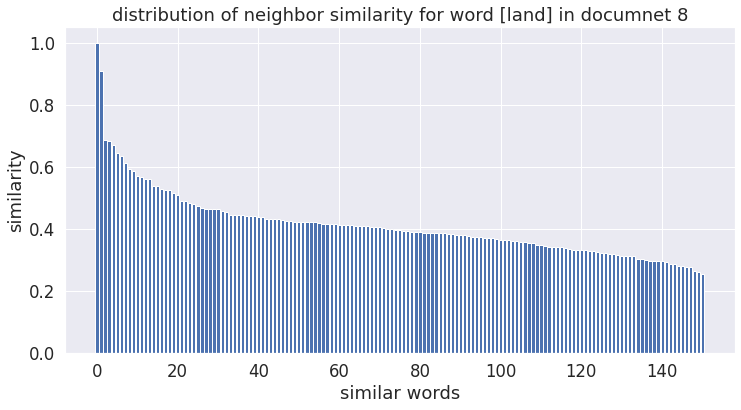

231   -->  used
1690
[0.9999999, 0.7647262, 0.7565203, 0.7088602, 0.7040906, 0.6127328, 0.59949434, 0.5924231, 0.5919845, 0.52801454, 0.4964022, 0.48890406, 0.47427353, 0.47115186, 0.46827078, 0.46370542, 0.46043998, 0.45947695, 0.45537275, 0.45524842, 0.45523953, 0.45022655, 0.44982857, 0.44702357, 0.43760562, 0.43237215, 0.43225157, 0.43098998, 0.4293171, 0.42890352, 0.42417756, 0.42278582, 0.422588, 0.42228842, 0.42169157, 0.4190294, 0.41849, 0.41815448, 0.4164628, 0.41496205, 0.41439068, 0.4125306, 0.41222817, 0.41180825, 0.40947258, 0.40673548, 0.40618378, 0.4055059, 0.40043524, 0.39791507, 0.3971948, 0.39470792, 0.3938942, 0.39041227, 0.38832906, 0.38801545, 0.38796675, 0.38138622, 0.37917006, 0.37907946, 0.37811607, 0.3772382, 0.3756361, 0.37363183, 0.37316734, 0.37110978, 0.36920398, 0.36867028, 0.36581293, 0.3642896, 0.36177748, 0.36127642, 0.36100262, 0.3597952, 0.35824162, 0.35817385, 0.3492752, 0.34782153, 0.34696, 0.34489495, 0.3432902, 0.34269583, 0.34146363, 0.33944225, 

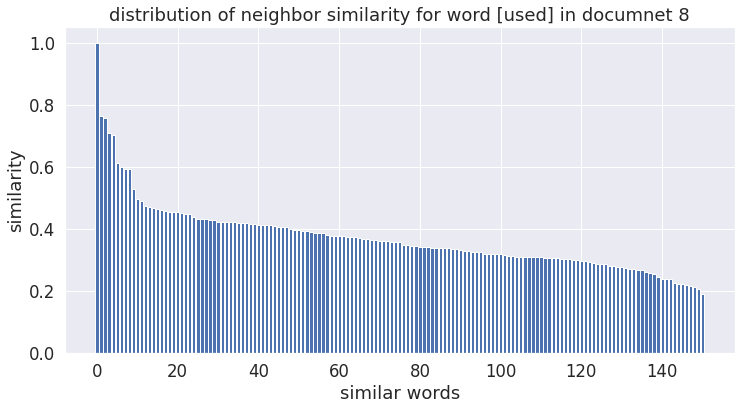

234   -->  new
1690
[0.99999994, 0.8047946, 0.7521462, 0.7290648, 0.7040906, 0.63588995, 0.63117075, 0.5968562, 0.58823866, 0.56670046, 0.5495297, 0.546154, 0.53773934, 0.5317625, 0.52382267, 0.5237482, 0.5206553, 0.5180043, 0.51221436, 0.5084834, 0.4957589, 0.49550888, 0.49533495, 0.4949022, 0.49465597, 0.49447274, 0.49236473, 0.48880577, 0.4863907, 0.48247308, 0.48090073, 0.47875187, 0.47858036, 0.47824076, 0.47448784, 0.46883547, 0.46695745, 0.4634205, 0.46136308, 0.46123523, 0.45906544, 0.45799282, 0.45706594, 0.4513149, 0.4496709, 0.44853097, 0.44706827, 0.44683495, 0.43827832, 0.437221, 0.4366953, 0.43617713, 0.43432182, 0.4340761, 0.43266678, 0.43161726, 0.42657763, 0.42591357, 0.423568, 0.42311406, 0.42123526, 0.42106235, 0.41881827, 0.41764408, 0.41469902, 0.41089892, 0.4096013, 0.40776786, 0.40555885, 0.40440026, 0.40349898, 0.4033821, 0.40237546, 0.4021222, 0.40156943, 0.40042785, 0.39884642, 0.39451057, 0.39382297, 0.39276698, 0.39173985, 0.39140284, 0.3894772, 0.38906533, 

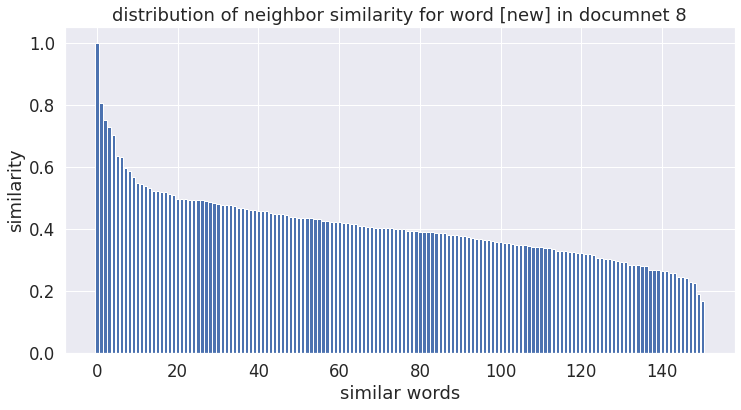

235   -->  freedoms
1690
[1.0, 0.8047946, 0.7040199, 0.68023634, 0.6643738, 0.64376354, 0.5919845, 0.59180355, 0.5791244, 0.56095445, 0.54537094, 0.5313703, 0.52315843, 0.5130199, 0.5085669, 0.50268126, 0.50221735, 0.49602267, 0.4957466, 0.48467427, 0.4780403, 0.4777819, 0.47706953, 0.47504628, 0.46543968, 0.4486602, 0.44413486, 0.44227624, 0.43930325, 0.4380872, 0.4352163, 0.43444768, 0.43341422, 0.4322977, 0.431823, 0.4266158, 0.42488483, 0.41984847, 0.41926676, 0.41581303, 0.4083321, 0.4038255, 0.40332657, 0.40196404, 0.39972264, 0.39734444, 0.39560154, 0.3918847, 0.3907619, 0.38810754, 0.38652253, 0.38524076, 0.3846003, 0.38053894, 0.3797996, 0.37254265, 0.37234825, 0.37225634, 0.372228, 0.36809492, 0.36612585, 0.36499864, 0.36347303, 0.36309138, 0.36024207, 0.35928, 0.35567486, 0.35420662, 0.35257763, 0.35091984, 0.34779444, 0.34703234, 0.34669864, 0.34491012, 0.34433115, 0.34398508, 0.34277204, 0.34232098, 0.33595455, 0.3355806, 0.33488488, 0.3339283, 0.33308554, 0.33284485, 0.32

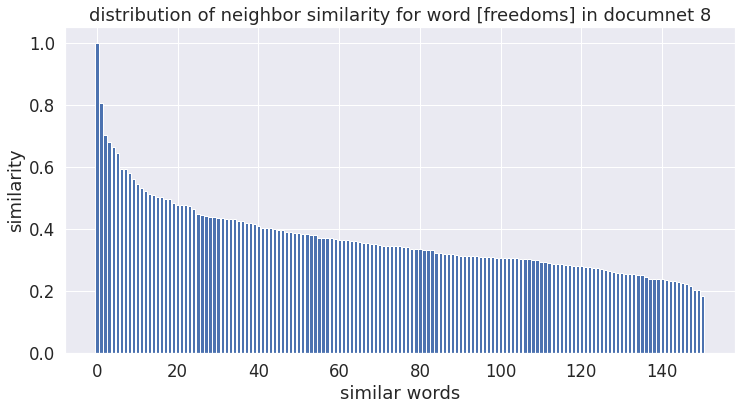

237   -->  24
1690
[1.0, 0.7253346, 0.6915191, 0.6414528, 0.6167846, 0.57683736, 0.53962016, 0.5281785, 0.5174574, 0.5113825, 0.50602156, 0.5056883, 0.4949022, 0.49068594, 0.4846992, 0.48457766, 0.47933108, 0.4743806, 0.47095042, 0.4703895, 0.46637332, 0.46622708, 0.45872998, 0.4584605, 0.4579341, 0.4496177, 0.4482453, 0.44557726, 0.441435, 0.435104, 0.43402773, 0.43368328, 0.4293171, 0.42629865, 0.4234998, 0.42280427, 0.41895396, 0.41859257, 0.41700494, 0.41663843, 0.41177326, 0.41074723, 0.40964893, 0.40680206, 0.40455684, 0.40376216, 0.4007862, 0.39825714, 0.39709827, 0.39658815, 0.39483482, 0.39234436, 0.39190197, 0.38973916, 0.3846003, 0.38398328, 0.38187116, 0.38046163, 0.3803842, 0.37989378, 0.37899262, 0.37886405, 0.3778315, 0.37730795, 0.37278128, 0.37117875, 0.36868232, 0.3681418, 0.36578128, 0.3648978, 0.3643363, 0.36250997, 0.35602424, 0.35455155, 0.35412243, 0.35394794, 0.35311964, 0.35050008, 0.3503614, 0.3502789, 0.34945384, 0.34877676, 0.34612137, 0.34502253, 0.3450009,

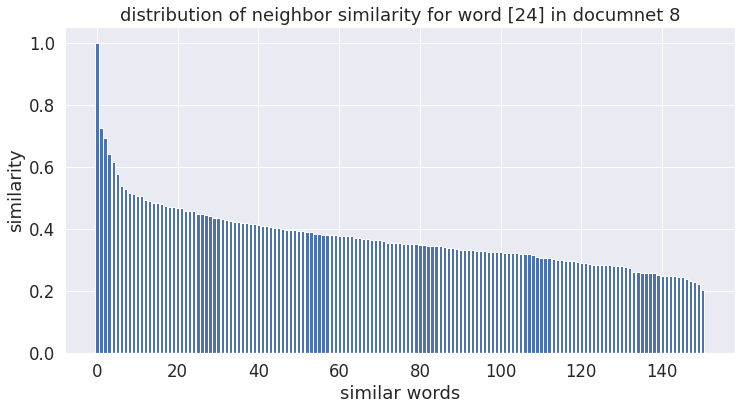

238   -->  years
1690
[1.0000002, 0.8307661, 0.78531337, 0.7253346, 0.6488644, 0.6431437, 0.6222748, 0.6209557, 0.58926654, 0.58292663, 0.5759367, 0.57380605, 0.5693069, 0.56341314, 0.56121933, 0.5512755, 0.55054474, 0.52708554, 0.52380604, 0.51221436, 0.50460505, 0.5044818, 0.504066, 0.50192183, 0.49824828, 0.49773145, 0.4956001, 0.49403775, 0.49367535, 0.49230772, 0.4920705, 0.4908314, 0.48556894, 0.4806574, 0.47828776, 0.47373968, 0.47306973, 0.47289413, 0.47115186, 0.47009397, 0.46959132, 0.46715766, 0.46528354, 0.46508425, 0.4643054, 0.45855683, 0.45786017, 0.45740128, 0.4515462, 0.44716734, 0.4421086, 0.4413912, 0.4413567, 0.44089532, 0.4408707, 0.44022888, 0.43998092, 0.4388034, 0.43710762, 0.4336277, 0.42941368, 0.4278407, 0.4275082, 0.42488483, 0.42224163, 0.42218342, 0.42198214, 0.4208321, 0.42065322, 0.42039484, 0.41963634, 0.41821757, 0.41782525, 0.41775718, 0.41472495, 0.41338718, 0.41010827, 0.40888792, 0.4078884, 0.40737244, 0.40418735, 0.40205538, 0.40200078, 0.40043083

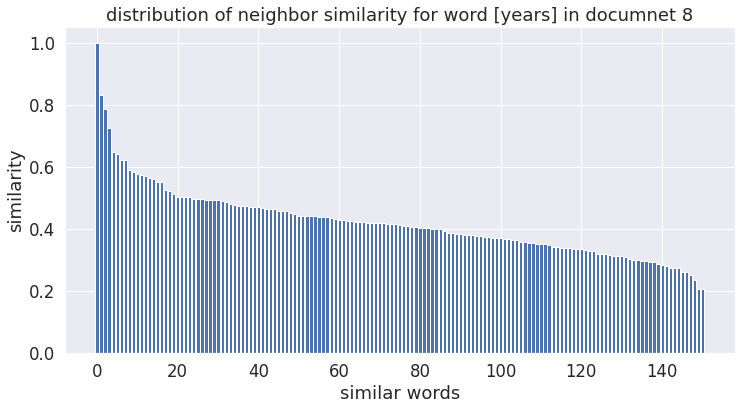

240   -->  dictatorship
1690
[1.0000001, 0.78531337, 0.73355865, 0.6915191, 0.66119146, 0.6472107, 0.63129777, 0.61952984, 0.6162081, 0.6034306, 0.59750366, 0.5869667, 0.58138216, 0.57874405, 0.5675238, 0.56222403, 0.5603607, 0.5589049, 0.5567603, 0.5553261, 0.54943585, 0.546154, 0.5452401, 0.53489566, 0.53273433, 0.5323849, 0.5311747, 0.52590764, 0.52200496, 0.51679146, 0.5113789, 0.5085669, 0.49887022, 0.49408996, 0.49357542, 0.48777804, 0.48423243, 0.4809815, 0.468576, 0.46239775, 0.46222574, 0.45884883, 0.45722443, 0.45664206, 0.4556286, 0.45444188, 0.45392555, 0.45369768, 0.44926918, 0.44790888, 0.44699514, 0.4466555, 0.44657654, 0.44581237, 0.44441402, 0.4422533, 0.4416226, 0.44126573, 0.44059843, 0.4399596, 0.43760562, 0.43693176, 0.4352842, 0.43388677, 0.43291998, 0.4318846, 0.42928103, 0.42553496, 0.42549288, 0.42410547, 0.42253512, 0.42128527, 0.42119718, 0.42096394, 0.4175743, 0.4125484, 0.41185576, 0.4114438, 0.40795004, 0.40714055, 0.4058773, 0.40584645, 0.40582916, 0.4026

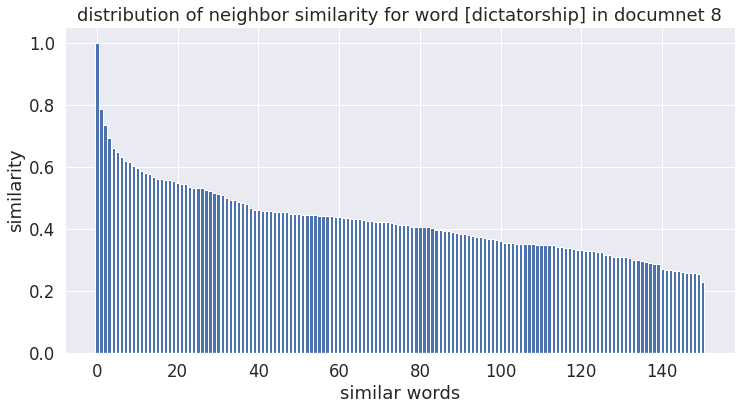

243   -->  country
1690
[1.0000001, 0.9102114, 0.68510807, 0.6252446, 0.5766902, 0.5755168, 0.5591925, 0.53273433, 0.5317625, 0.52801454, 0.52315843, 0.5174574, 0.51176655, 0.49773145, 0.48951584, 0.48041922, 0.47809875, 0.47245055, 0.47169623, 0.46083695, 0.45575574, 0.4541396, 0.45182163, 0.4516963, 0.44414395, 0.44395292, 0.44071054, 0.44035855, 0.43983582, 0.43327403, 0.43247515, 0.4305789, 0.42876595, 0.42590636, 0.4255851, 0.42200643, 0.4211883, 0.41953245, 0.41849387, 0.41843686, 0.41533, 0.41357845, 0.41260344, 0.41244316, 0.41238588, 0.4105457, 0.40963203, 0.40931195, 0.40868372, 0.40847376, 0.40596092, 0.4058307, 0.4021351, 0.401636, 0.40049475, 0.3985524, 0.39817345, 0.39694014, 0.39442435, 0.39417008, 0.39339668, 0.39297754, 0.39259443, 0.39160913, 0.39133853, 0.38725454, 0.3861745, 0.38539493, 0.38399547, 0.38076726, 0.37937504, 0.37881377, 0.377507, 0.377118, 0.37679952, 0.37609637, 0.3753972, 0.37527725, 0.3748886, 0.37411606, 0.37355214, 0.37218368, 0.37209052, 0.371774

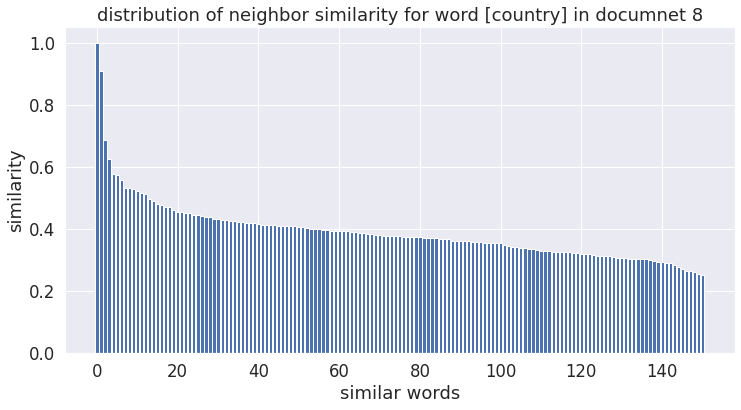

244   -->  wary
1690
[0.99999994, 0.71915543, 0.6317947, 0.6127328, 0.58160436, 0.57839996, 0.5686922, 0.5591925, 0.5441351, 0.53909516, 0.53773934, 0.4931668, 0.48467427, 0.48073643, 0.4537526, 0.4443849, 0.44183725, 0.43368328, 0.4322216, 0.42995363, 0.4235595, 0.42293125, 0.4191959, 0.41878295, 0.41754282, 0.41371173, 0.413496, 0.40791798, 0.40200078, 0.40190247, 0.39697266, 0.39526445, 0.39368224, 0.39178646, 0.38908866, 0.38733852, 0.3863717, 0.38539678, 0.38535553, 0.38392943, 0.38360536, 0.38254356, 0.38230735, 0.38054854, 0.3781188, 0.37513685, 0.37246305, 0.37208283, 0.3720647, 0.3690586, 0.36897057, 0.36346608, 0.3626454, 0.36217287, 0.36182272, 0.3616085, 0.36080527, 0.35818037, 0.35774976, 0.35544968, 0.3531714, 0.35314655, 0.35204053, 0.3517234, 0.3513733, 0.35038877, 0.34789756, 0.34768465, 0.3474862, 0.3471483, 0.3456513, 0.34267223, 0.34254688, 0.3421419, 0.34032714, 0.34028873, 0.3394977, 0.3361768, 0.33587074, 0.335577, 0.3337189, 0.3284568, 0.32600778, 0.32599095, 0.

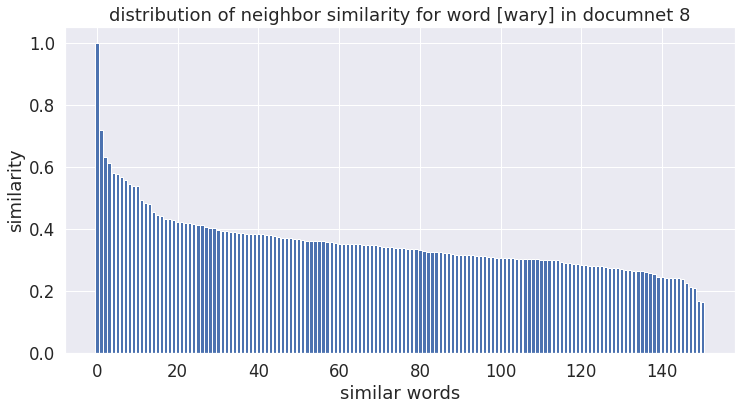

247   -->  old
1690
[1.0, 0.8376962, 0.83107686, 0.8242183, 0.7941693, 0.66119146, 0.6222748, 0.619959, 0.61947477, 0.61070836, 0.60852534, 0.60427606, 0.59739983, 0.5968562, 0.5791244, 0.56760013, 0.56570125, 0.5604287, 0.5551729, 0.5435347, 0.53862417, 0.5385059, 0.5321488, 0.5287852, 0.5274437, 0.52723247, 0.5272299, 0.5171254, 0.5167109, 0.50602156, 0.50587523, 0.50514543, 0.4964022, 0.48845476, 0.47771335, 0.47500315, 0.47458088, 0.4738326, 0.47338372, 0.47318646, 0.4699126, 0.46973073, 0.4694111, 0.46440196, 0.46137267, 0.457278, 0.45202863, 0.44035855, 0.43947113, 0.43936813, 0.43782714, 0.43782312, 0.43751544, 0.43680313, 0.43394616, 0.4298882, 0.42863035, 0.427976, 0.42640552, 0.42566907, 0.4242948, 0.42370248, 0.42141038, 0.4213759, 0.41735816, 0.41303086, 0.41149342, 0.41035616, 0.40944147, 0.4092938, 0.40859684, 0.40463087, 0.40190247, 0.4008458, 0.399458, 0.3987447, 0.39713654, 0.3928542, 0.39003518, 0.38910472, 0.38876233, 0.38778627, 0.38459837, 0.3840561, 0.38348052, 0.

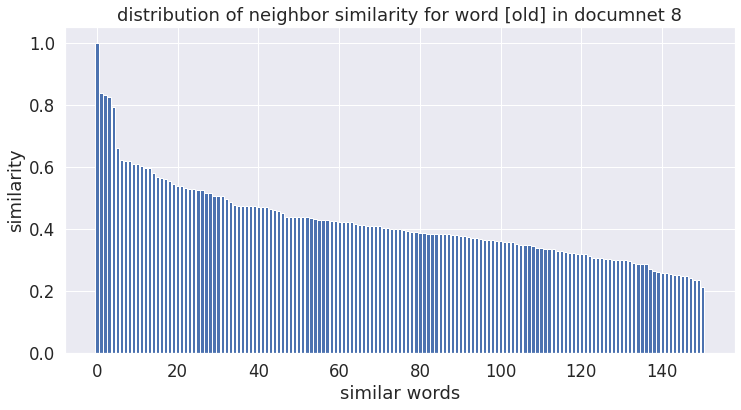

248   -->  guard
1690
[1.0000002, 0.8376962, 0.82121634, 0.8046619, 0.75076604, 0.68023634, 0.5739238, 0.572685, 0.5675238, 0.5495297, 0.53476727, 0.5299833, 0.50868, 0.5085857, 0.5059732, 0.503451, 0.5031383, 0.5011543, 0.49251235, 0.479917, 0.4764046, 0.46959132, 0.46585172, 0.46492139, 0.4640401, 0.46354708, 0.4467299, 0.44568685, 0.4322216, 0.42816186, 0.42677844, 0.42479977, 0.42327398, 0.42228842, 0.42095077, 0.4205493, 0.4160474, 0.41315728, 0.4107425, 0.410264, 0.41000724, 0.40963203, 0.4091044, 0.40874526, 0.40302855, 0.40235978, 0.40230978, 0.40193474, 0.4016779, 0.4007862, 0.3998741, 0.3967635, 0.39539513, 0.39189804, 0.38692826, 0.38622797, 0.38498497, 0.37988067, 0.37966603, 0.37438178, 0.37427345, 0.37374383, 0.37074828, 0.37026626, 0.3684275, 0.36787963, 0.3675376, 0.36414227, 0.36374047, 0.36218232, 0.3579324, 0.35702553, 0.35675988, 0.35534763, 0.3540058, 0.3539273, 0.35263392, 0.35253513, 0.34973466, 0.34412947, 0.34374624, 0.3431142, 0.34260353, 0.34092742, 0.3402779

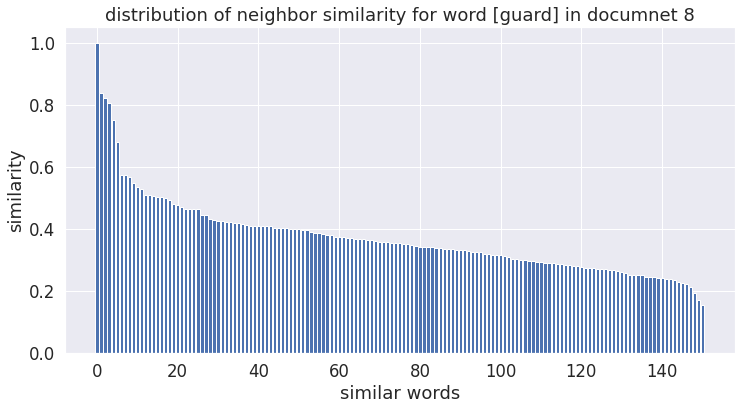

250   -->  flourished
1690
[1.0, 0.8242183, 0.82121634, 0.8080077, 0.7738196, 0.6355871, 0.63129777, 0.5964794, 0.58926654, 0.5851326, 0.5797268, 0.56991273, 0.56095445, 0.56076944, 0.55527234, 0.5494688, 0.54779786, 0.54039854, 0.5302011, 0.52789545, 0.5206553, 0.50896657, 0.5065533, 0.5058011, 0.5037899, 0.5002994, 0.4995286, 0.49682236, 0.4897548, 0.4871192, 0.48367742, 0.4743806, 0.47245055, 0.46866816, 0.46486008, 0.46031526, 0.45793322, 0.45578128, 0.455679, 0.4555497, 0.45322645, 0.45236737, 0.45106015, 0.45022655, 0.4495894, 0.4489885, 0.4471144, 0.44669887, 0.44452634, 0.4443849, 0.4436245, 0.44177106, 0.4408093, 0.43872735, 0.43701807, 0.432592, 0.43217564, 0.43092206, 0.42849004, 0.42288092, 0.42233026, 0.4201643, 0.4192003, 0.41416353, 0.41233975, 0.41061443, 0.40968227, 0.4083137, 0.40478054, 0.40346062, 0.4016351, 0.40152442, 0.40139237, 0.39913148, 0.39905378, 0.39398992, 0.38970512, 0.3890756, 0.3883155, 0.3873114, 0.3860114, 0.38312888, 0.38114595, 0.37769622, 0.377052

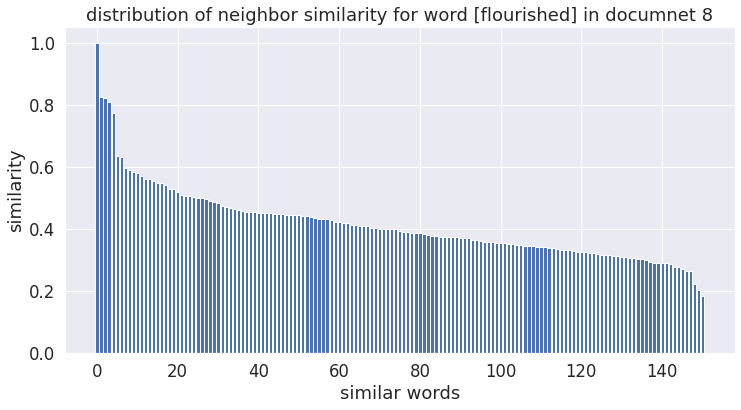

252   -->  mr
1690
[1.0, 0.72799647, 0.7262185, 0.65040594, 0.6073533, 0.59750366, 0.57683736, 0.57511413, 0.57380605, 0.5592678, 0.5367656, 0.5344268, 0.53415835, 0.52660614, 0.5236963, 0.52334154, 0.51758015, 0.51533824, 0.50600946, 0.5041466, 0.5023322, 0.49600697, 0.47449666, 0.47338372, 0.46109277, 0.45806894, 0.45617765, 0.44859898, 0.44233972, 0.4347173, 0.4344611, 0.4312899, 0.42963955, 0.4292953, 0.42708337, 0.42422378, 0.42150736, 0.4214955, 0.4204972, 0.41707307, 0.41416353, 0.4091305, 0.40857178, 0.40796766, 0.4063277, 0.40349898, 0.40001106, 0.3958648, 0.39515492, 0.39482713, 0.39462936, 0.39339668, 0.3895626, 0.38779515, 0.38419154, 0.38387766, 0.37892494, 0.37876788, 0.3766576, 0.3757646, 0.37325037, 0.37323797, 0.37232357, 0.3694743, 0.36780697, 0.36698067, 0.36600113, 0.36430308, 0.36356336, 0.36100262, 0.35896206, 0.35526228, 0.35381275, 0.35345912, 0.34966406, 0.34958747, 0.34747946, 0.34746444, 0.3445229, 0.34321797, 0.3424021, 0.34035212, 0.33991012, 0.33831728, 0.

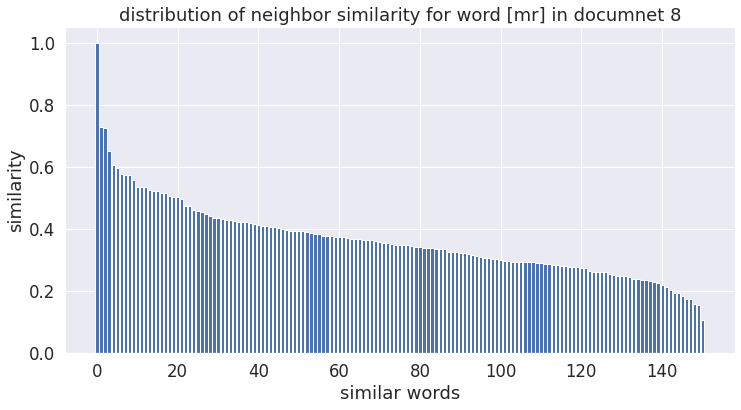

254   -->  ce
1690
[0.99999994, 0.7740076, 0.65040594, 0.63048446, 0.62786996, 0.6037352, 0.5795455, 0.5643833, 0.5596758, 0.54112417, 0.52106315, 0.5166321, 0.5123521, 0.5113789, 0.485359, 0.47861466, 0.4751745, 0.4714325, 0.4704422, 0.4703895, 0.46493155, 0.45855683, 0.45286378, 0.45074472, 0.43094456, 0.42730266, 0.42621246, 0.4258532, 0.42483765, 0.418575, 0.41735816, 0.4138431, 0.41287166, 0.41173553, 0.41117314, 0.40965682, 0.40923604, 0.40556943, 0.40438598, 0.3983075, 0.39756203, 0.39631644, 0.3946311, 0.39284086, 0.38977548, 0.38822642, 0.384628, 0.38307053, 0.37721333, 0.37679952, 0.37564614, 0.37266544, 0.37199342, 0.37084952, 0.3703236, 0.3694582, 0.36818042, 0.36731696, 0.367277, 0.36629593, 0.3635128, 0.3628732, 0.36188513, 0.36074734, 0.35861158, 0.35715556, 0.35587654, 0.3547113, 0.3541037, 0.3511725, 0.34974134, 0.34758922, 0.34530777, 0.34225494, 0.33945227, 0.33932295, 0.3384032, 0.33735722, 0.3346718, 0.33458632, 0.33171993, 0.3316123, 0.3315095, 0.32948646, 0.32337

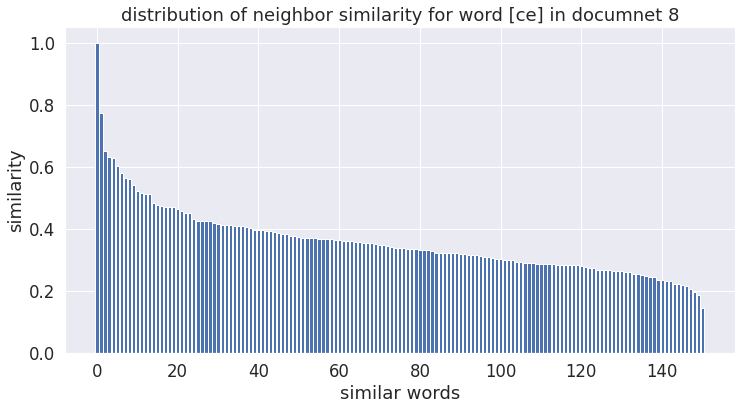

255   -->  ##aus
1690
[1.0000001, 0.7740076, 0.6397245, 0.62813115, 0.60120684, 0.57511413, 0.54655266, 0.5462256, 0.53365695, 0.51571333, 0.49713725, 0.49707517, 0.4932664, 0.4790831, 0.4710133, 0.4481346, 0.4457795, 0.4433588, 0.44245106, 0.44126573, 0.44022888, 0.43504408, 0.43402773, 0.42983848, 0.42661983, 0.42655754, 0.42404908, 0.42017564, 0.41873214, 0.41061124, 0.4051304, 0.3967747, 0.3960508, 0.39509457, 0.39382023, 0.39083815, 0.3904019, 0.38300526, 0.3829216, 0.3749444, 0.3685133, 0.3639581, 0.36350697, 0.36308077, 0.3615622, 0.3614356, 0.35912868, 0.35796654, 0.35709062, 0.35397843, 0.35335803, 0.3519562, 0.35059434, 0.3480327, 0.34340322, 0.34185117, 0.33995724, 0.33543456, 0.33511525, 0.33496094, 0.33466098, 0.3335827, 0.3325921, 0.33238006, 0.32999274, 0.3278275, 0.32761258, 0.32461175, 0.32433444, 0.32429937, 0.32188007, 0.3205346, 0.31925386, 0.31332272, 0.31311506, 0.31028077, 0.3069255, 0.30611145, 0.3056605, 0.30561996, 0.3025267, 0.30165032, 0.2993759, 0.2984021, 

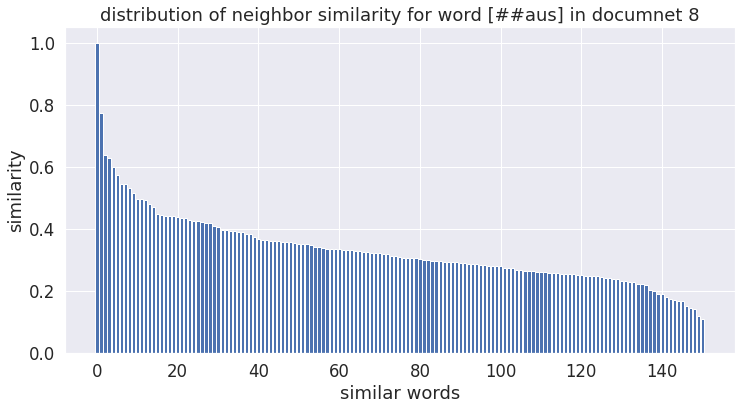

In [56]:
import string 
 
stopwords = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now']


doc = 8

print('tokens in  doc {} are {}'.format(doc, tokenizer.tokenize(sentences[doc])))
total_tokens = tokenizer.tokenize(sentences[doc])[0:min(max_length, len(sentences[doc]))]
print('size of the document before removing stopwords is ', len(total_tokens))
word_neighbor_similarity_dict = dict()
for ind, word in zip(total_tokens, range(1,len(total_tokens))):
  if ind not in stopwords and ind not in string.punctuation:
    plt.figure(word)
    print(word, '  --> ', ind)
    
    value_list = list()
    temp = sorted(find_similar(last_layer[doc], word,  tokenizer.tokenize(sentences[doc])).items(), key=lambda kv: kv[1], reverse=True)
    for d in temp:
      value_list.append(d[1])
      ## plot data
    print(value_list)
    word_neighbor_similarity_dict[ind] = value_list
    print('variance is {}'.format(np.var(value_list)))
    print('Average is {}'.format(np.average(value_list)))
    plt.bar(range(0, len(value_list)), value_list)
    plt.xlabel('similar words')
    plt.ylabel('similarity')
    plt.title('distribution of neighbor similarity for word [{}] in documnet {}'.format(ind, doc))
    plt.show()
    # plt.savefig('/content/Images/'+ind+'.png')
print()
print()


In [72]:
# print(word_neighbor_similarity_dict)
gradient_word_similarity_dict = dict()
total_size = len(word_neighbor_similarity_dict['top'])
print(total_size-total_size%10)
length =np.arange(0, total_size)
jump = 5
for word in word_neighbor_similarity_dict:
  # print(word_neighbor_similarity_dict[word])
  # print(length)
  # new_list = [word_neighbor_similarity_dict[word][x:x+jump] for x in range(0, len(word_neighbor_similarity_dict['top']), jump)]
  new_list = [word_neighbor_similarity_dict[word][x:x+jump] for x in range(0, total_size-total_size%jump, jump)]
  tm_list = list()
  for vec in new_list:
    m1, b1 = np.polyfit(np.arange(0, len(vec)), vec, 1)
    tm_list.append(m1)
  gradient_word_similarity_dict[word] = tm_list
print(gradient_word_similarity_dict)
#convert dict to a numpy array

150
{'confronted': [-0.10699765086174023, -0.004935741424560588, -0.006405687332153365, -0.0035137325525284166, -0.002786287665367172, -0.0015299201011658382, -0.001528543233871512, -0.002525672316551245, -0.0012928068637848278, -0.001909154653549221, -0.0012220889329910875, -0.0006454199552536332, -0.0007719129323959879, -0.0019202679395676277, -0.0011536180973053514, -0.0007120013236999685, -0.0020363748073578144, -0.0007822632789612035, -0.0012569844722748083, -0.001183742284774811, -0.0010078787803650248, -0.0016435831785202258, -0.0023137629032135222, -0.005630582571029672, -0.0016112923622131766, -0.0009789645671844985, -0.0016435295343399368, -0.0027443468570709614, -0.001016938686370843, -0.014425115287303968], 'growing': [-0.09347026348114015, -0.008079940080642754, -0.004313164949417111, -0.0032518863677979013, -0.001672101020813051, -0.0018862903118134148, -0.0006344020366669249, -0.0008300751447678033, -0.001154804229736381, -0.0002452850341797198, -0.0004743158817291094, -

In [73]:
#clustering by kmean
# print(gradient_word_similarity_dict.items())
X =np.array(list(gradient_word_similarity_dict.values()))
word_list = list(gradient_word_similarity_dict.keys())

print(X.shape)


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(' kmeans.labels_ is {}'.format(kmeans.labels_))
print('kmeans.cluster_centers_ is {}'.format(kmeans.cluster_centers_))

from sklearn.metrics import silhouette_samples, silhouette_score

(109, 30)
 kmeans.labels_ is [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0]
kmeans.cluster_centers_ is [[-0.08958557 -0.00955871 -0.00678479 -0.00422926 -0.00338399 -0.00283504
  -0.00252048 -0.0022235  -0.00200507 -0.00195275 -0.00150426 -0.00153069
  -0.0014482  -0.00151647 -0.00156503 -0.00142781 -0.00163691 -0.00154661
  -0.00135915 -0.00136521 -0.00141661 -0.00147716 -0.00149125 -0.00151598
  -0.00160577 -0.00179551 -0.00213305 -0.00272765 -0.0031524  -0.00812097]
 [-0.06330984 -0.02032699 -0.00754365 -0.00574786 -0.00369368 -0.00310933
  -0.0027912  -0.00254907 -0.00206841 -0.00208076 -0.00206335 -0.00170638
  -0.00168061 -0.00163487 -0.00174071 -0.00155783 -0.00138999 -0.0015174
  -0.0014779  -0.00145029 -0.00170073 -0.00133966 -0.00181282 -0.00175793
  -0.00163378 -0.00191622 -0.0021278  -0.00292481 -0.003

In [78]:
! pip install statistics

  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7452 sha256=22c04731b43f219e1cfed925d70c39b54a6f7f078f1ef5434d7b122dfd46d946
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built statistics


list of cluster words are: 
cluster 0 is ['confronted', 'growing', 'demands', 'communist', 'party', 'dissolve', 'top', 'country', 'order', 'say', 'call', 'special', 'congress', 'di', '##sman', '##tle', '##d', 'free', 'april', 'late', 'saturday', 'night', 'group', 'many', 'quickly', 'severed', 'relationship', 'ce', '##aus', 'dictatorship', 'popular', 'went', 'national', 'television', 'today', 'rum', '##anian', 'newspapers', 'like', 'controlled', 'non', 'leaders', 'leading', 'figures', 'detained', 'since', 'urging', 'dissolution', 'appear', 'ranking', 'seeking', 'political', 'profile', '##ness', 'erase', '##ige', '##s', 'communists', 'risen', 'among', 'within', 'ranks', 'reflects', 'land', 'freedoms', '24', 'years', 'wary', 'mr']
cluster 1 is ['officials', 'old', 'disgrace', 'even', 'elections', 'held', '##escu', 'uprising', 'swept', 'power', 'announce', 'message', 'repeated', 'new', 'president', 'nicola', '##e', 'overthrow', 'high', 'open', 'swirl', 'revolutionary', 'fe', '##r', '##vor'

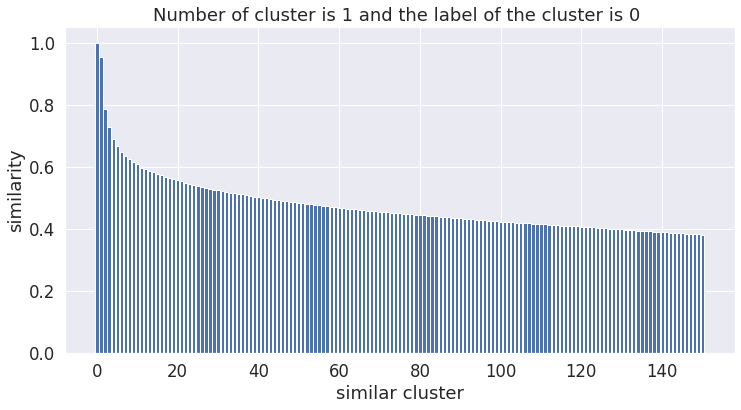

tmp_list shape is  (40, 151)  and the lenght is 151
Number of cluster is 1 and the label of the cluster is 1 


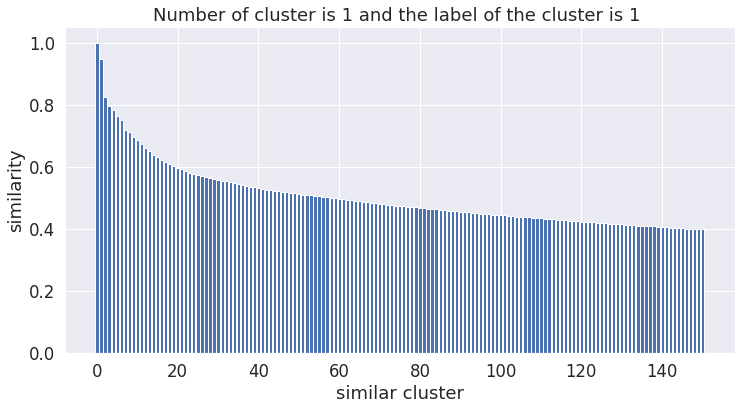

For n_clusters = 2 The average silhouette_score is : 0.37092220978545937
list of cluster words are: 
cluster 0 is ['confronted', 'growing', 'demands', 'communist', 'dissolve', 'top', 'country', 'order', 'say', 'call', 'congress', 'di', '##sman', '##d', 'april', 'late', 'saturday', 'night', 'quickly', 'relationship', 'ce', '##aus', 'popular', 'went', 'national', 'television', 'today', 'rum', '##anian', 'newspapers', 'like', 'controlled', 'non', 'leading', 'figures', 'detained', 'since', 'urging', 'political', 'profile', '##ige', 'communists', 'risen', 'within', 'reflects', 'land', '24', 'wary', 'mr']
cluster 1 is ['old', 'swept', 'power', 'repeated', 'president', 'fe', '##vor', 'vest', 'students', 'streets', 'artists', 'intellectuals', 'guard', 'flourished']
cluster 2 is ['party', 'officials', 'special', '##tle', 'disgrace', 'even', 'free', 'elections', 'held', 'group', 'many', 'severed', '##escu', 'dictatorship', 'uprising', 'announce', 'message', 'new', 'leaders', 'nicola', '##e', 'ov

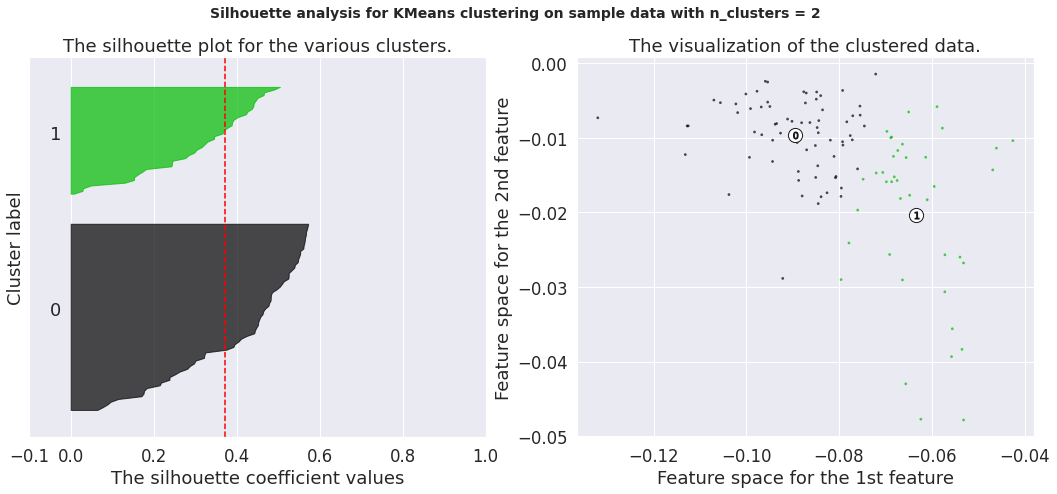

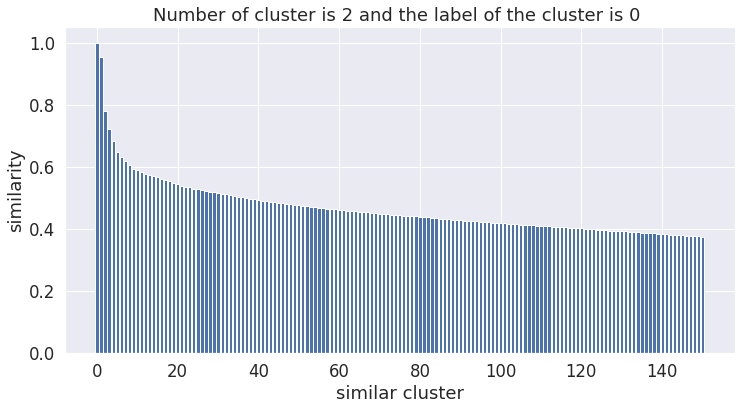

tmp_list shape is  (14, 151)  and the lenght is 151
Number of cluster is 2 and the label of the cluster is 1 


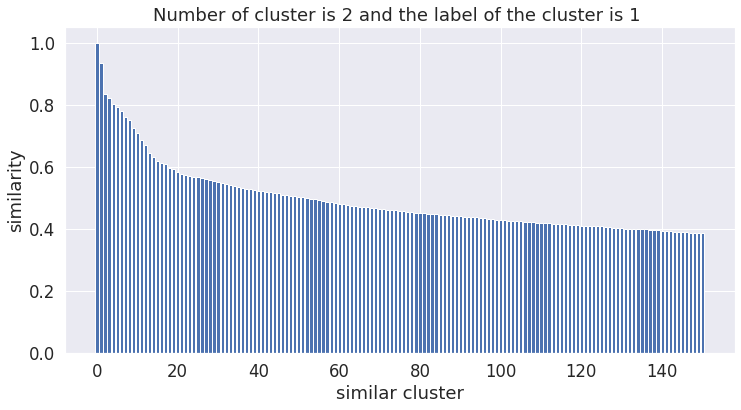

tmp_list shape is  (46, 151)  and the lenght is 151
Number of cluster is 2 and the label of the cluster is 2 


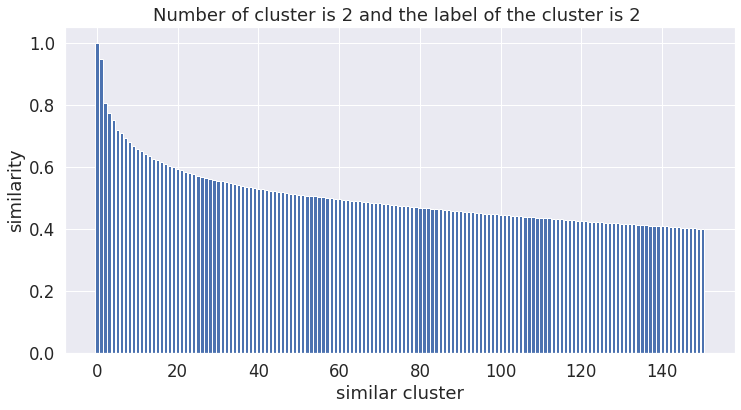

For n_clusters = 3 The average silhouette_score is : 0.3029506390233609
list of cluster words are: 
cluster 0 is ['communist', 'party', 'dissolve', 'top', 'say', 'special', 'congress', 'di', '##sman', '##tle', 'free', 'april', 'night', 'group', 'many', 'severed', 'ce', 'dictatorship', 'popular', 'uprising', 'went', 'national', 'television', 'message', 'controlled', 'non', 'leading', 'dissolution', 'appear', 'high', 'ranking', 'seeking', 'profile', 'eager', '##ness', 'erase', '##ige', '##s', 'communists', 'risen', 'among', 'ranks', 'land', 'freedoms', '24', 'years', 'mr']
cluster 1 is ['old', 'disgrace', 'even', 'elections', 'held', '##escu', 'announce', 'new', 'leaders', 'president', 'nicola', '##e', 'overthrow', 'open', 'swirl', 'revolutionary', '##r', 'mighty', 'long', 'suppressed', 'dec', '##imated', 'cry', 'used', 'flourished']
cluster 2 is ['confronted', 'growing', 'demands', 'country', 'order', 'call', '##d', 'late', 'saturday', 'quickly', 'relationship', '##aus', 'today', 'rum',

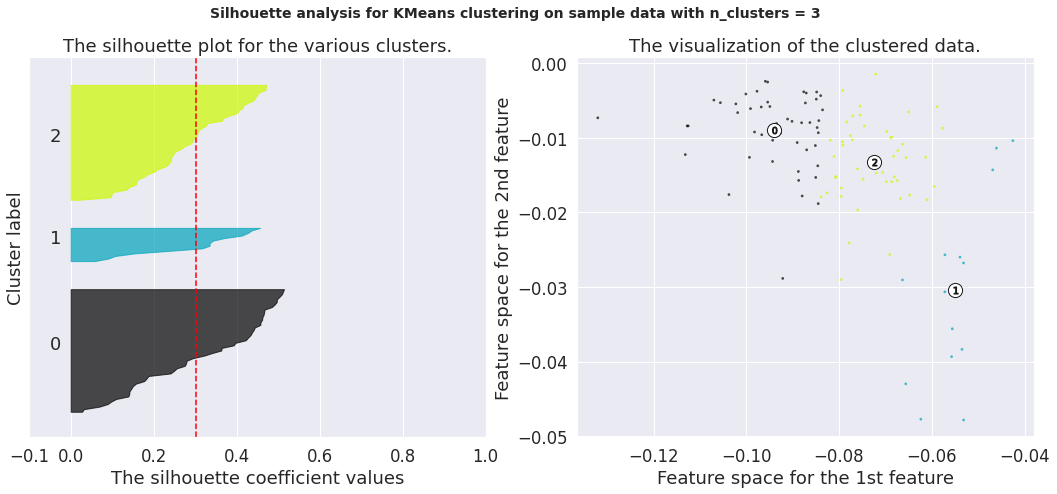

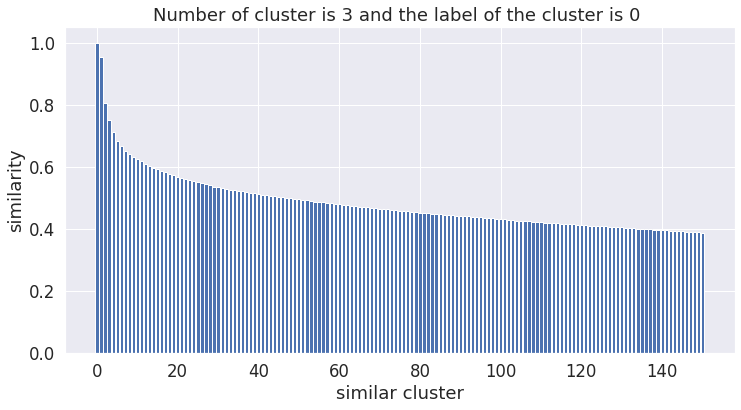

tmp_list shape is  (25, 151)  and the lenght is 151
Number of cluster is 3 and the label of the cluster is 1 


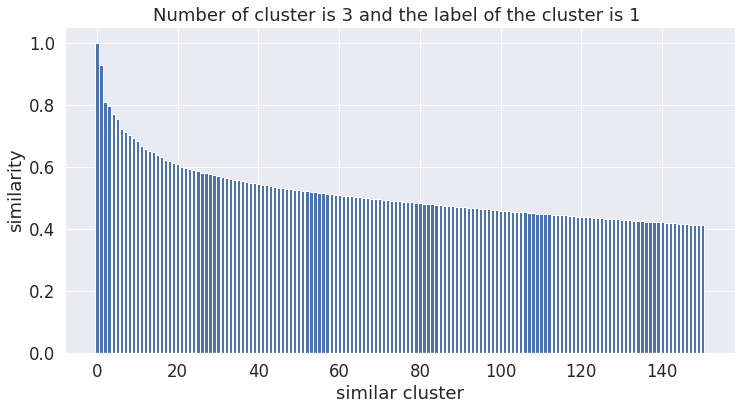

tmp_list shape is  (25, 151)  and the lenght is 151
Number of cluster is 3 and the label of the cluster is 2 


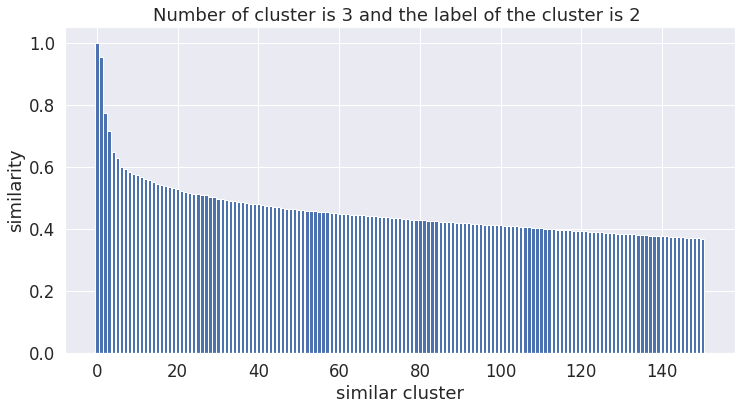

tmp_list shape is  (12, 151)  and the lenght is 151
Number of cluster is 3 and the label of the cluster is 3 


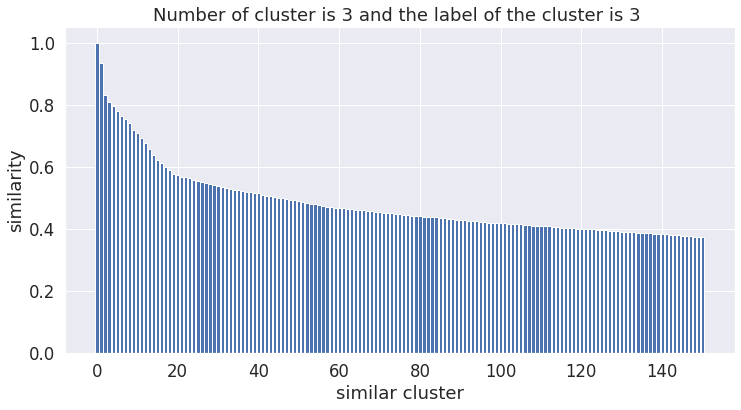

For n_clusters = 4 The average silhouette_score is : 0.2632069444701153
list of cluster words are: 
cluster 0 is ['growing', 'demands', 'order', 'say', 'call', '##d', 'saturday', 'night', 'quickly', '##aus', 'national', 'today', 'newspapers', 'like', 'figures', 'detained', 'since', 'urging', 'political', 'within', 'reflects', 'wary']
cluster 1 is ['officials', 'swept', 'power', 'repeated', 'fe', '##vor', 'vest', 'students', 'streets', 'artists', 'intellectuals', 'guard']
cluster 2 is ['communist', 'party', 'dissolve', 'top', 'special', 'congress', 'di', '##sman', '##tle', 'free', 'april', 'group', 'many', 'severed', 'ce', 'dictatorship', 'popular', 'uprising', 'went', 'television', 'message', 'controlled', 'non', 'leading', 'dissolution', 'appear', 'high', 'ranking', 'seeking', 'profile', 'eager', '##ness', 'erase', '##ige', '##s', 'communists', 'risen', 'among', 'ranks', 'land', 'freedoms', '24', 'years', 'mr']
cluster 3 is ['old', 'disgrace', 'even', 'elections', 'held', '##escu', 'a

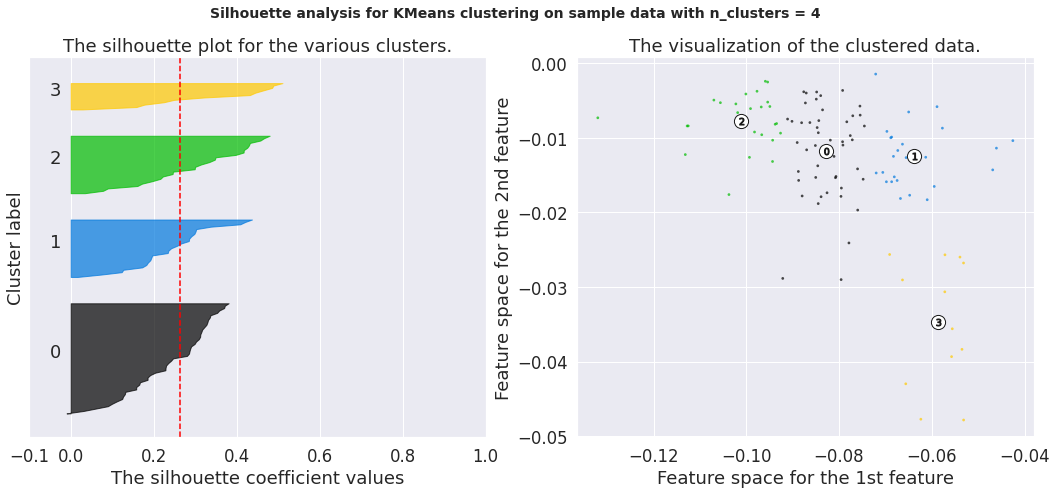

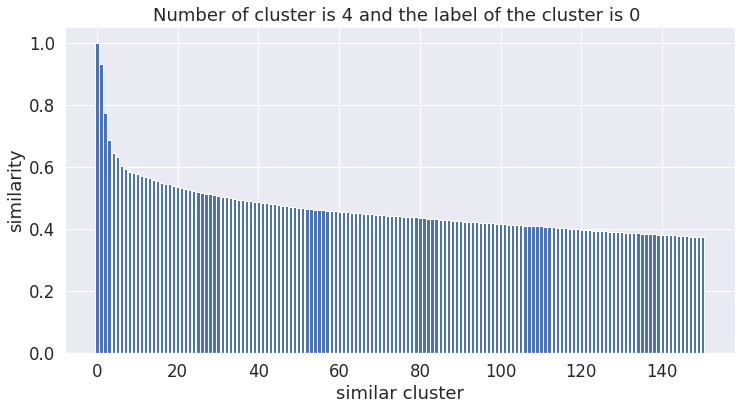

tmp_list shape is  (12, 151)  and the lenght is 151
Number of cluster is 4 and the label of the cluster is 1 


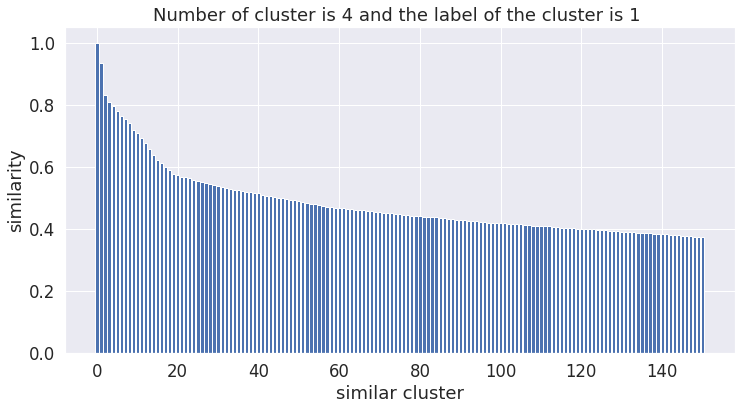

tmp_list shape is  (44, 151)  and the lenght is 151
Number of cluster is 4 and the label of the cluster is 2 


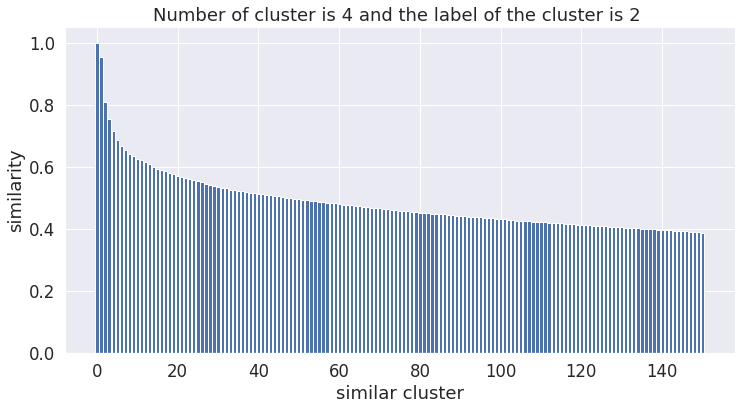

tmp_list shape is  (25, 151)  and the lenght is 151
Number of cluster is 4 and the label of the cluster is 3 


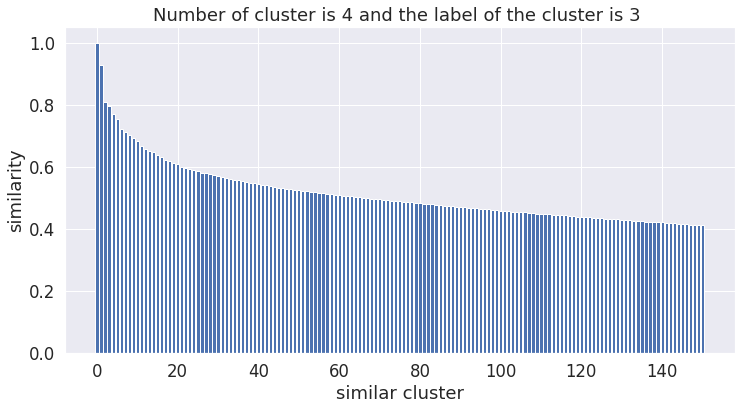

tmp_list shape is  (6, 151)  and the lenght is 151
Number of cluster is 4 and the label of the cluster is 4 


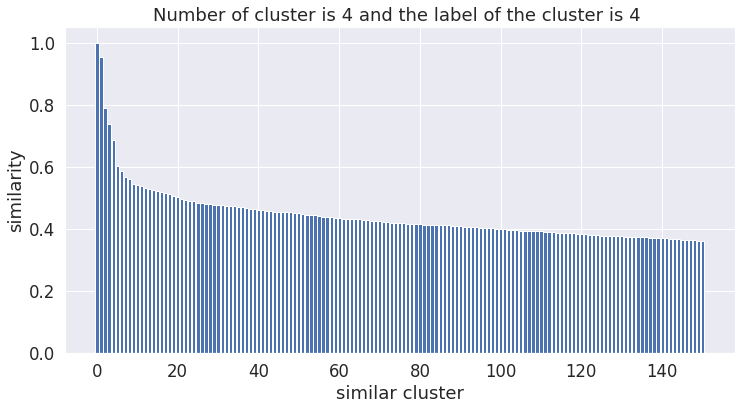

For n_clusters = 5 The average silhouette_score is : 0.22373334091286182
list of cluster words are: 
cluster 0 is ['communist', 'party', 'top', 'special', 'congress', 'di', '##sman', 'april', 'group', 'many', 'dictatorship', 'popular', 'non', 'leaders', 'dissolution', 'appear', 'ranking', 'profile', '##ness', '##ige', '##s', 'communists', 'among', 'ranks', 'mr']
cluster 1 is ['officials', 'swept', 'power', 'repeated', 'fe', '##vor', 'vest', 'students', 'streets', 'artists', 'intellectuals', 'guard']
cluster 2 is ['old', 'disgrace', 'even', 'elections', 'held', '##escu', 'announce', 'new', 'president', 'nicola', '##e', 'overthrow', 'open', 'swirl', 'revolutionary', '##r', 'mighty', 'long', 'suppressed', 'dec', '##imated', 'cry', 'used', 'flourished']
cluster 3 is ['dissolve', '##tle', 'free', 'severed', 'ce', 'uprising', 'television', 'message', 'controlled', 'leading', 'high', 'seeking', 'eager', 'erase', 'land', 'freedoms', '24', 'years']
cluster 4 is ['growing', 'demands', 'order', '

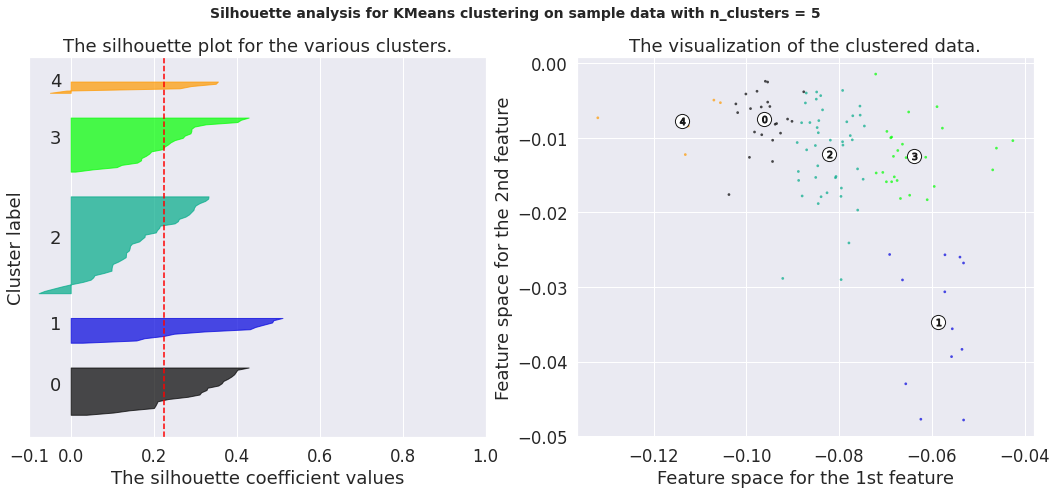

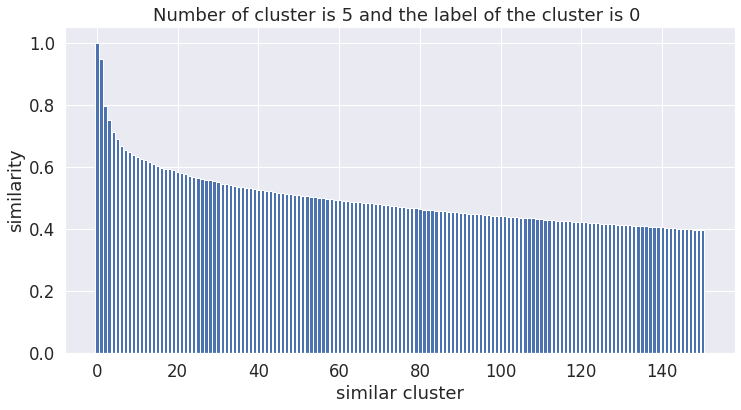

tmp_list shape is  (12, 151)  and the lenght is 151
Number of cluster is 5 and the label of the cluster is 1 


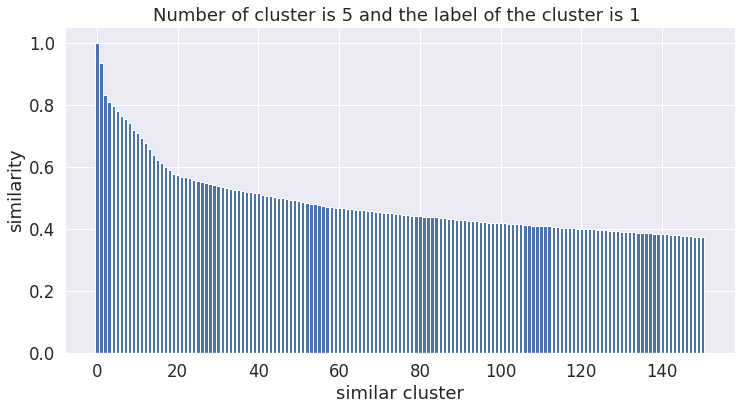

tmp_list shape is  (24, 151)  and the lenght is 151
Number of cluster is 5 and the label of the cluster is 2 


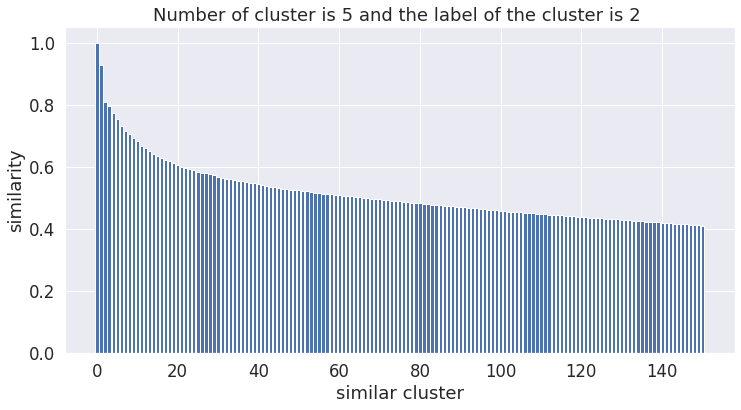

tmp_list shape is  (18, 151)  and the lenght is 151
Number of cluster is 5 and the label of the cluster is 3 


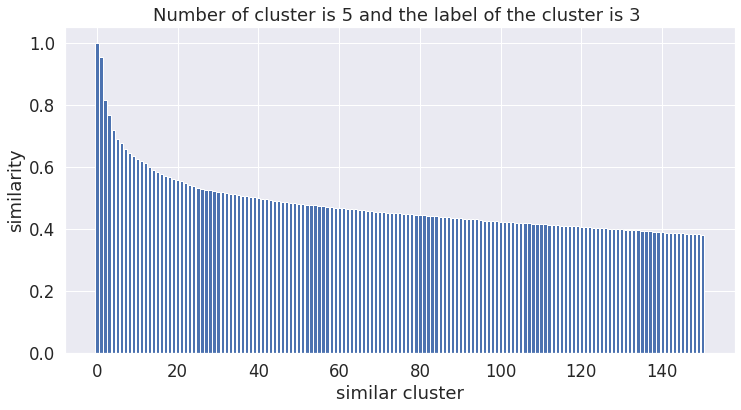

tmp_list shape is  (23, 151)  and the lenght is 151
Number of cluster is 5 and the label of the cluster is 4 


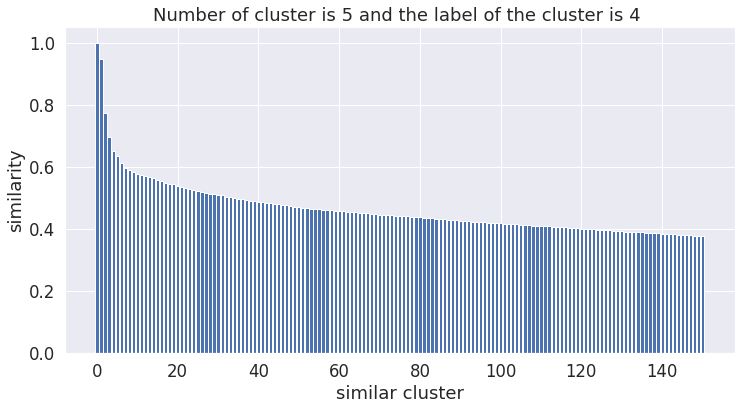

tmp_list shape is  (7, 151)  and the lenght is 151
Number of cluster is 5 and the label of the cluster is 5 


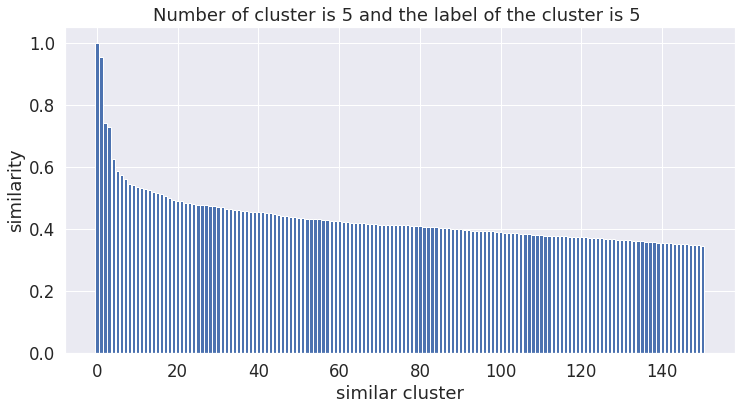

For n_clusters = 6 The average silhouette_score is : 0.205949869913635


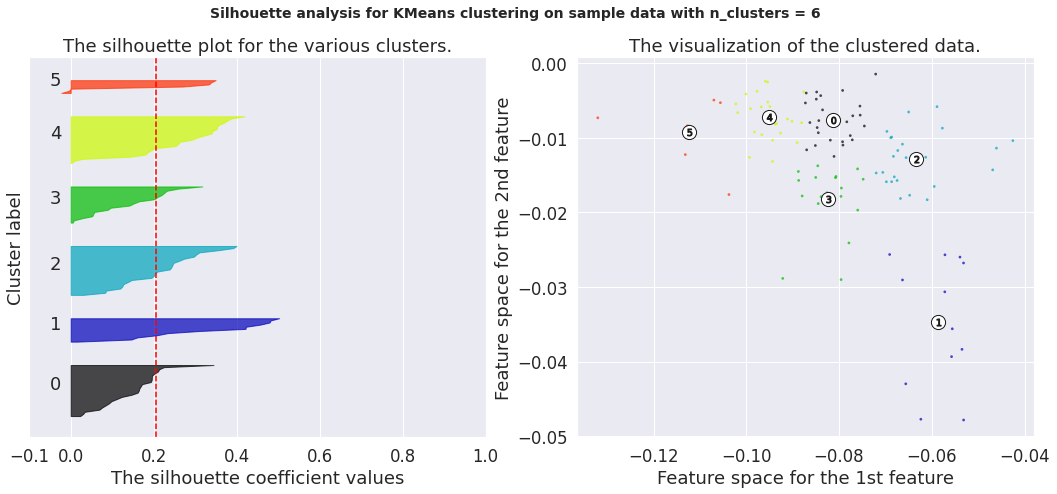

In [98]:
# display clusters and average sillohid
import matplotlib.cm as cm
from numpy import median
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # print('cluster_labels is {} '.format(cluster_labels))
    token_list = word_list
    tmp_dic = dict()
    for x in range(0, n_clusters):
      tmp_list = list()
      for i, j in zip(token_list, cluster_labels):
        if j == x:
          tmp_list.append(i)
      tmp_dic[x] = tmp_list
    print('list of cluster words are: ')
    for prt in tmp_dic:
      print('cluster {} is {}'.format(prt, tmp_dic[prt]))

    for w_list,ind in zip(tmp_dic.values(), tmp_dic.keys()):
      tmp_list = list()

      for w in w_list:
    #     # print(' cluster {} and word is {}, value is {}'.format(ind, w, gradient_word_similarity_dict[w]))
    #     tmp_list.append(gradient_word_similarity_dict[w])
    #   all_distribution.append(tmp_list)
    # # print('shape of all distribution for cluster ', x,' is ', np.shape(all_distribution))
    #   print('shape all_distribution is {}  and shape of all_distribution[0] is {} and shpe of '.format(np.shape(all_distribution), np.shape(all_distribution[0])))
        tmp_list.append(word_neighbor_similarity_dict[w])
      print('tmp_list shape is ', np.shape(tmp_list), ' and the lenght is', len(tmp_list[0]))
      tmp_word_list = list()
      all_distribution = list()
      for f in range(0,len(tmp_list[0])):
        for t in tmp_list:
          tmp_word_list.append(t[f])
        # all_distribution.append(np.average(tmp_word_list))
        all_distribution.append(median(tmp_word_list))

      print('Number of cluster is {} and the label of the cluster is {} '.format(x, ind))
      plt.figure()
      plt.bar(range(0, len(tmp_list[0])), all_distribution)
      plt.xlabel('similar cluster')
      plt.ylabel('similarity')
      plt.title('Number of cluster is {} and the label of the cluster is {} '.format(x, ind))
      plt.show()

      

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])  


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



labels [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]
X_ [[-0.15636566281318656, -0.011105030775070152, -0.0033141374588012257, -0.007338136434554986, -0.005072847008705123, -0.0046244561672210225, -0.0019021928310394168, -0.003974094986915536, -0.0022867023944854984, -0.0006290823221206396, -0.0009560585021973094, -0.0021816492080688394, -0.0032448023557662335, -0.002822875976562472, -0.0003448426723479606, -0.0007132887840270792, -0.0025332123041152672, -0.0013180822134017407, -0.0011739879846572748, -0.0010107606649398043, -0.0010027587413787478, -0.0008476525545119952, -0.002730295062065076, -0.0016038119792937953, -0.0017667412757873438, -0.0009226799011229778, -0.0009742081165313344, -0.00292664766311647

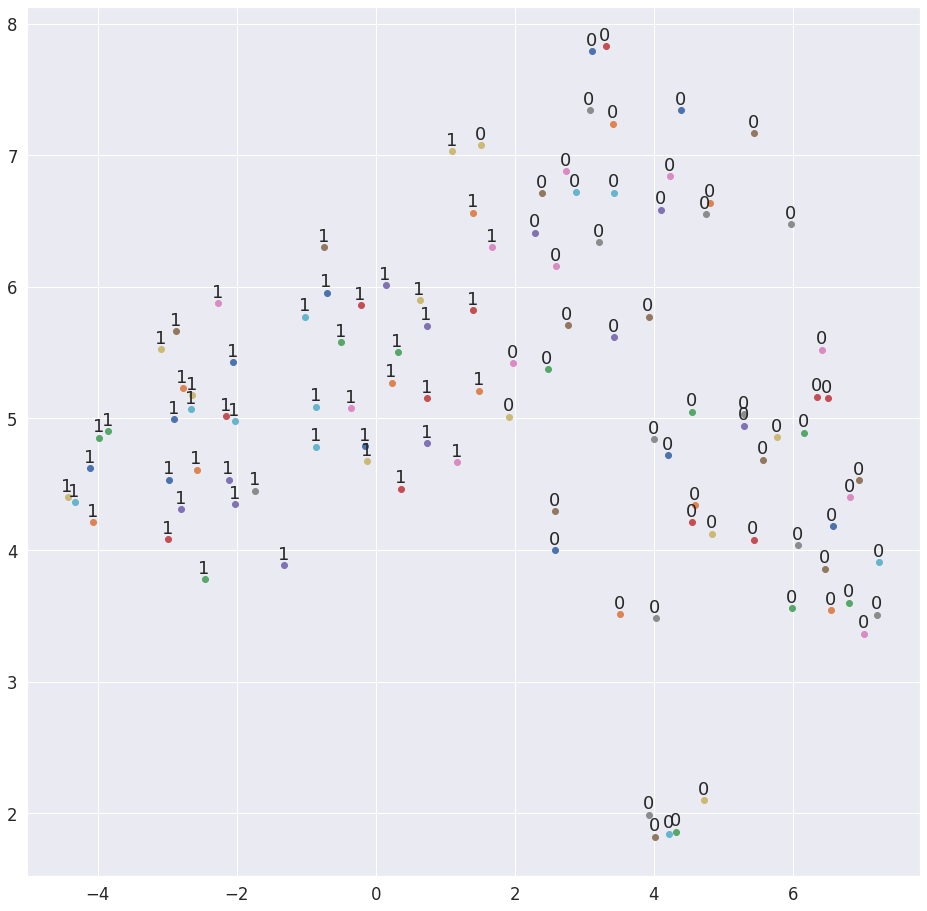

In [60]:
def tsne_plot_kmeans(labels_, X_):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    print('labels {}'.format(labels_))
    print('X_ {}'.format(X_))
    print('shape of kmeans is {}'.format(np.shape(labels_)))
    for word, embed in zip(labels_, X_):
        tokens.append(embed)
        labels.append(word)
    print('shape is {}'.format(np.shape(tokens)))
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot_kmeans(kmeans.labels_.tolist(), list(gradient_word_similarity_dict.values()))

In [61]:
print('it is still working')

it is still working
